NOTA BENE  Ho dovuto copiare un vecchio notebook da progetto DM1 cosi da avere i 25gb di ram perchè non funziona più il trucco per aumento ram

In [ ]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict
from scipy.stats.stats import pearsonr

# **PROJECT TASK 1 - Basic Classifiers and Evaluation**

## **1.1 - Prepare dataset**

**Prepare the dataset in order to build several basic classifiers able to predict room occupancy from the available variables. You are welcome in creating new variables.**

###  Load Dataset and Describe

**The dataset has not a target variable for classification. Thus, define a target variable, for instance “is weekend” and set “true” for weekend days, and “false” for the others.**

Dataset description by UCI site:

The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device.

The device was located on the field in a significantly polluted area, at road level,within an Italian city.

Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses.

Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer.

Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities.

**Missing values are tagged with -200 value.**

**CO(GT)** Concentrazione reale media oraria di monossido di carbonio in mg/m^3

**PT08.S1(CO)** (ossido di stagno) risposta media oraria del sensore (nominally monossido di carbonio targeted)

**NMHC(GT)** Concentrazione reale media oraria degli Idrocarburi non metanici microg/m^3

**C6H6(GT)** Concentrazione reale media oraria di benzene in microg/m^3

**PT08.S2** (titanio) risposta media oraria del sensore (nominally Idrocarburi non metanici targeted)

**NOx** Concentrazione reale media oraria degli ossidi di azoto in ppb

**PT08.S3** (triossido di tungsteno) risposta media oraria del sensore (nominally ossidi di azoto targeted)

**NO2** Concentrazione reale media oraria del diossido di azoto in microg/m^3

**PT08.S4** (triossido di tungsteno) risposta media oraria del sensore (nominally diossido di azoto targeted)

**PT08.S5** (ossido di indio) risposta media oraria del sensore (nominally Ozono (O3) targeted)

**T** Temperature in C°

**RH** Relative Humidity (%)

**AH** Absolute Humidity

In [ ]:
df = pd.read_csv('AirQualityUCI.csv', sep=';',decimal=",") 

In [ ]:
df.head()

Date      Time  CO(GT)  ...      AH  Unnamed: 15  Unnamed: 16
0  10/03/2004  18.00.00     2.6  ...  0.7578          NaN          NaN
1  10/03/2004  19.00.00     2.0  ...  0.7255          NaN          NaN
2  10/03/2004  20.00.00     2.2  ...  0.7502          NaN          NaN
3  10/03/2004  21.00.00     2.2  ...  0.7867          NaN          NaN
4  10/03/2004  22.00.00     1.6  ...  0.7888          NaN          NaN

[5 rows x 17 columns]

In [ ]:
df.tail()

Date Time  CO(GT)  PT08.S1(CO)  ...  RH  AH  Unnamed: 15  Unnamed: 16
9466  NaN  NaN     NaN          NaN  ... NaN NaN          NaN          NaN
9467  NaN  NaN     NaN          NaN  ... NaN NaN          NaN          NaN
9468  NaN  NaN     NaN          NaN  ... NaN NaN          NaN          NaN
9469  NaN  NaN     NaN          NaN  ... NaN NaN          NaN          NaN
9470  NaN  NaN     NaN          NaN  ... NaN NaN          NaN          NaN

[5 rows x 17 columns]

In [ ]:
df.dtypes

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
Unnamed: 15      float64
Unnamed: 16      float64
dtype: object

In [ ]:
df.describe()

CO(GT)  PT08.S1(CO)  ...  Unnamed: 15  Unnamed: 16
count  9357.000000  9357.000000  ...          0.0          0.0
mean    -34.207524  1048.990061  ...          NaN          NaN
std      77.657170   329.832710  ...          NaN          NaN
min    -200.000000  -200.000000  ...          NaN          NaN
25%       0.600000   921.000000  ...          NaN          NaN
50%       1.500000  1053.000000  ...          NaN          NaN
75%       2.600000  1221.000000  ...          NaN          NaN
max      11.900000  2040.000000  ...          NaN          NaN

[8 rows x 15 columns]

### Drop Columns Unnamed

First of all we saw that there are 2 columns that contain only NaN values, so we dropped out that columns.

The columns are labeled as Unnamed: 15 and Unnamed: 16

In [ ]:
df = df.drop(["Unnamed: 15","Unnamed: 16"], axis=1)

In [ ]:
df.head()

Date      Time  CO(GT)  PT08.S1(CO)  ...  PT08.S5(O3)     T    RH      AH
0  10/03/2004  18.00.00     2.6       1360.0  ...       1268.0  13.6  48.9  0.7578
1  10/03/2004  19.00.00     2.0       1292.0  ...        972.0  13.3  47.7  0.7255
2  10/03/2004  20.00.00     2.2       1402.0  ...       1074.0  11.9  54.0  0.7502
3  10/03/2004  21.00.00     2.2       1376.0  ...       1203.0  11.0  60.0  0.7867
4  10/03/2004  22.00.00     1.6       1272.0  ...       1110.0  11.2  59.6  0.7888

[5 rows x 15 columns]

### Drop column NMHC(GT)

In this column there are too much -200 values (missing values) so also if we replace with mean of the feature is too much dependent from this missing values.

In [ ]:
df = df.drop(["NMHC(GT)"], axis=1)

### NaN Values

Drop columns with NaN, the last 2, Unnamed:15 and Unnamed:16
Drop rows with NaN , there only 1% circa.


In [ ]:
df.isnull().any()

Date             True
Time             True
CO(GT)           True
PT08.S1(CO)      True
C6H6(GT)         True
PT08.S2(NMHC)    True
NOx(GT)          True
PT08.S3(NOx)     True
NO2(GT)          True
PT08.S4(NO2)     True
PT08.S5(O3)      True
T                True
RH               True
AH               True
dtype: bool

In [ ]:
df.isnull().sum()

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

In [ ]:
df.shape

(9471, 14)

In [ ]:
df

Date      Time  CO(GT)  ...     T    RH      AH
0     10/03/2004  18.00.00     2.6  ...  13.6  48.9  0.7578
1     10/03/2004  19.00.00     2.0  ...  13.3  47.7  0.7255
2     10/03/2004  20.00.00     2.2  ...  11.9  54.0  0.7502
3     10/03/2004  21.00.00     2.2  ...  11.0  60.0  0.7867
4     10/03/2004  22.00.00     1.6  ...  11.2  59.6  0.7888
...          ...       ...     ...  ...   ...   ...     ...
9466         NaN       NaN     NaN  ...   NaN   NaN     NaN
9467         NaN       NaN     NaN  ...   NaN   NaN     NaN
9468         NaN       NaN     NaN  ...   NaN   NaN     NaN
9469         NaN       NaN     NaN  ...   NaN   NaN     NaN
9470         NaN       NaN     NaN  ...   NaN   NaN     NaN

[9471 rows x 14 columns]

In [ ]:
df= df.dropna()

In [ ]:
df.shape

(9357, 14)

In [ ]:
df

Date      Time  CO(GT)  ...     T    RH      AH
0     10/03/2004  18.00.00     2.6  ...  13.6  48.9  0.7578
1     10/03/2004  19.00.00     2.0  ...  13.3  47.7  0.7255
2     10/03/2004  20.00.00     2.2  ...  11.9  54.0  0.7502
3     10/03/2004  21.00.00     2.2  ...  11.0  60.0  0.7867
4     10/03/2004  22.00.00     1.6  ...  11.2  59.6  0.7888
...          ...       ...     ...  ...   ...   ...     ...
9352  04/04/2005  10.00.00     3.1  ...  21.9  29.3  0.7568
9353  04/04/2005  11.00.00     2.4  ...  24.3  23.7  0.7119
9354  04/04/2005  12.00.00     2.4  ...  26.9  18.3  0.6406
9355  04/04/2005  13.00.00     2.1  ...  28.3  13.5  0.5139
9356  04/04/2005  14.00.00     2.2  ...  28.5  13.1  0.5028

[9357 rows x 14 columns]

After the drop of NaN values in rows we have passed from 9471 rows to 9357 rows.


In [ ]:
df.dtypes

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

### Missing values with "-200" value

In [ ]:
df.isin([-200.0]).any()

Date             False
Time             False
CO(GT)            True
PT08.S1(CO)       True
C6H6(GT)          True
PT08.S2(NMHC)     True
NOx(GT)           True
PT08.S3(NOx)      True
NO2(GT)           True
PT08.S4(NO2)      True
PT08.S5(O3)       True
T                 True
RH                True
AH                True
dtype: bool

We know if there is a value with -200 is a missing value by the discription of the dataset, so, we want replace this values with the mean of the each column

In [ ]:
df1=df.replace(-200.0, np.nan)

In [ ]:
df1.isin([-200]).any()

Date             False
Time             False
CO(GT)           False
PT08.S1(CO)      False
C6H6(GT)         False
PT08.S2(NMHC)    False
NOx(GT)          False
PT08.S3(NOx)     False
NO2(GT)          False
PT08.S4(NO2)     False
PT08.S5(O3)      False
T                False
RH               False
AH               False
dtype: bool

In [ ]:
df1.isnull().any()

Date             False
Time             False
CO(GT)            True
PT08.S1(CO)       True
C6H6(GT)          True
PT08.S2(NMHC)     True
NOx(GT)           True
PT08.S3(NOx)      True
NO2(GT)           True
PT08.S4(NO2)      True
PT08.S5(O3)       True
T                 True
RH                True
AH                True
dtype: bool

In [ ]:
dataframe= df1.fillna(df1.mean())

In [ ]:
dataframe.isnull().any()

Date             False
Time             False
CO(GT)           False
PT08.S1(CO)      False
C6H6(GT)         False
PT08.S2(NMHC)    False
NOx(GT)          False
PT08.S3(NOx)     False
NO2(GT)          False
PT08.S4(NO2)     False
PT08.S5(O3)      False
T                False
RH               False
AH               False
dtype: bool

In [ ]:
dataframe

Date      Time  CO(GT)  ...     T    RH      AH
0     10/03/2004  18.00.00     2.6  ...  13.6  48.9  0.7578
1     10/03/2004  19.00.00     2.0  ...  13.3  47.7  0.7255
2     10/03/2004  20.00.00     2.2  ...  11.9  54.0  0.7502
3     10/03/2004  21.00.00     2.2  ...  11.0  60.0  0.7867
4     10/03/2004  22.00.00     1.6  ...  11.2  59.6  0.7888
...          ...       ...     ...  ...   ...   ...     ...
9352  04/04/2005  10.00.00     3.1  ...  21.9  29.3  0.7568
9353  04/04/2005  11.00.00     2.4  ...  24.3  23.7  0.7119
9354  04/04/2005  12.00.00     2.4  ...  26.9  18.3  0.6406
9355  04/04/2005  13.00.00     2.1  ...  28.3  13.5  0.5139
9356  04/04/2005  14.00.00     2.2  ...  28.5  13.1  0.5028

[9357 rows x 14 columns]

Now our dataset is called dataframe, we dropped out NaN columns and NMHC(GT) column, we dropped NaN values and we replaced the -200 missing values with the mean of the column.

### Deal with Data and Time

In this section we are going to deal with Date and Time format

#### Date

The problem is that i need the format year - month - day to use datetime function, so i have to switch month with day 

In [ ]:
dataframe['Date']=pd.to_datetime(dataframe.Date, dayfirst=True)

In [ ]:
dataframe['Weekday']=dataframe.Date.dt.weekday

In [ ]:
dataframe['Month']=dataframe.Date.dt.month

In [ ]:
dataframe.dtypes


Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
Weekday                   int64
Month                     int64
dtype: object

In [ ]:
dataframe

Date      Time  CO(GT)  PT08.S1(CO)  ...    RH      AH  Weekday  Month
0    2004-03-10  18.00.00     2.6       1360.0  ...  48.9  0.7578        2      3
1    2004-03-10  19.00.00     2.0       1292.0  ...  47.7  0.7255        2      3
2    2004-03-10  20.00.00     2.2       1402.0  ...  54.0  0.7502        2      3
3    2004-03-10  21.00.00     2.2       1376.0  ...  60.0  0.7867        2      3
4    2004-03-10  22.00.00     1.6       1272.0  ...  59.6  0.7888        2      3
...         ...       ...     ...          ...  ...   ...     ...      ...    ...
9352 2005-04-04  10.00.00     3.1       1314.0  ...  29.3  0.7568        0      4
9353 2005-04-04  11.00.00     2.4       1163.0  ...  23.7  0.7119        0      4
9354 2005-04-04  12.00.00     2.4       1142.0  ...  18.3  0.6406        0      4
9355 2005-04-04  13.00.00     2.1       1003.0  ...  13.5  0.5139        0      4
9356 2005-04-04  14.00.00     2.2       1071.0  ...  13.1  0.5028        0      4

[9357 rows x 16 columns]

Now the Data Format it's ok and also i create a new feature Weekday with 0=monday and ..... and 6=Sunday.

#### Time

From Time feature i figure out only the hour and assign it to new feature Hour

In [ ]:
dataframe['Hour'] = pd.to_datetime(dataframe['Time'],format= '%H.%M.%S').dt.hour
type(dataframe['Time'][0])

str

In [ ]:
dataframe.dtypes

Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
Weekday                   int64
Month                     int64
Hour                      int64
dtype: object

In [ ]:
dataframe

Date      Time  CO(GT)  PT08.S1(CO)  ...      AH  Weekday  Month  Hour
0    2004-03-10  18.00.00     2.6       1360.0  ...  0.7578        2      3    18
1    2004-03-10  19.00.00     2.0       1292.0  ...  0.7255        2      3    19
2    2004-03-10  20.00.00     2.2       1402.0  ...  0.7502        2      3    20
3    2004-03-10  21.00.00     2.2       1376.0  ...  0.7867        2      3    21
4    2004-03-10  22.00.00     1.6       1272.0  ...  0.7888        2      3    22
...         ...       ...     ...          ...  ...     ...      ...    ...   ...
9352 2005-04-04  10.00.00     3.1       1314.0  ...  0.7568        0      4    10
9353 2005-04-04  11.00.00     2.4       1163.0  ...  0.7119        0      4    11
9354 2005-04-04  12.00.00     2.4       1142.0  ...  0.6406        0      4    12
9355 2005-04-04  13.00.00     2.1       1003.0  ...  0.5139        0      4    13
9356 2005-04-04  14.00.00     2.2       1071.0  ...  0.5028        0      4    14

[9357 rows x 17 columns]

### New features

At this point we want implement some new features, like 'is night' , 'is evening' , 'officheHour' and 'is weekend' .
Aftet that for each variable we transform from boolean to int 0 and 1 .
1 == True
0 == False

In [ ]:
# dataframe['is Evening'] = (dataframe['Hour'] >= 18) 

In [ ]:
# dataframe['is Evening'] = dataframe['is Evening'].astype(int)

In [ ]:
# dataframe['is Night'] = ( (dataframe['Hour'] >= 18) | (dataframe['Hour'] <6) )

In [ ]:
# dataframe['is Night'] = dataframe['is Night'].astype(int)

In [ ]:
# dataframe['OfficeHour'] = ( (dataframe['Hour'] >= 9) & (dataframe['Hour'] <=18 ) )

In [ ]:
# dataframe['OfficeHour'] = dataframe['OfficeHour'].astype(int)

In [ ]:
dataframe['Weekend'] = ( (dataframe['Weekday'] == 5) | (dataframe['Weekday'] == 6) )

In [ ]:
dataframe['Weekend'] = dataframe['Weekend'].astype(int)

In [ ]:
dataframe

Date      Time  CO(GT)  PT08.S1(CO)  ...  Weekday  Month  Hour  Weekend
0    2004-03-10  18.00.00     2.6       1360.0  ...        2      3    18        0
1    2004-03-10  19.00.00     2.0       1292.0  ...        2      3    19        0
2    2004-03-10  20.00.00     2.2       1402.0  ...        2      3    20        0
3    2004-03-10  21.00.00     2.2       1376.0  ...        2      3    21        0
4    2004-03-10  22.00.00     1.6       1272.0  ...        2      3    22        0
...         ...       ...     ...          ...  ...      ...    ...   ...      ...
9352 2005-04-04  10.00.00     3.1       1314.0  ...        0      4    10        0
9353 2005-04-04  11.00.00     2.4       1163.0  ...        0      4    11        0
9354 2005-04-04  12.00.00     2.4       1142.0  ...        0      4    12        0
9355 2005-04-04  13.00.00     2.1       1003.0  ...        0      4    13        0
9356 2005-04-04  14.00.00     2.2       1071.0  ...        0      4    14        0

[9357 rows x 18 columns]

In [ ]:
dataframe.dtypes

Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
Weekday                   int64
Month                     int64
Hour                      int64
Weekend                   int64
dtype: object

In [ ]:
dataframe['Weekend'].value_counts()

0    6669
1    2688
Name: Weekend, dtype: int64

### Dependent Variable

In this section we are going to decide our dependent variable.
ATTENTO CON QUESTO SCRIPT METTI IN AUTOMATICO ULTIMA FEATURE COME DEPENDENT VARIABLE.
PRENDO 'WEEKEND'

In [ ]:
x = dataframe.iloc[:, :-1].values
y = dataframe.iloc[:, -1].values

In X there are the features (include the new features), in Y our dependent variable

In [ ]:
print(x)

[[Timestamp('2004-03-10 00:00:00') '18.00.00' 2.6 ... 2 3 18]
 [Timestamp('2004-03-10 00:00:00') '19.00.00' 2.0 ... 2 3 19]
 [Timestamp('2004-03-10 00:00:00') '20.00.00' 2.2 ... 2 3 20]
 ...
 [Timestamp('2005-04-04 00:00:00') '12.00.00' 2.4 ... 0 4 12]
 [Timestamp('2005-04-04 00:00:00') '13.00.00' 2.1 ... 0 4 13]
 [Timestamp('2005-04-04 00:00:00') '14.00.00' 2.2 ... 0 4 14]]


In [ ]:
print(y)

[0 0 0 ... 0 0 0]


In this way we have defined 2 array, the array x in which are contains the values of all the features, and the array y wich contain the values of dependent variable 'Weekend'

### Features distribution and statistics on Dataframe

#### Weekend distribution

In [ ]:
dataframe['Weekend'].value_counts()/dataframe['Weekend'].count()

0    0.712728
1    0.287272
Name: Weekend, dtype: float64

The dependent variable Weekend is quite imbalanced with 71% of NoWeekend and 29% of YesWeekend.

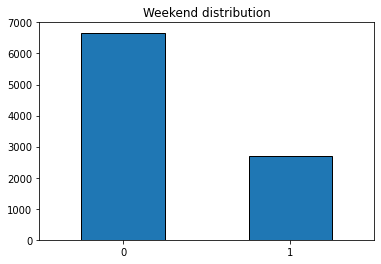

In [ ]:
dataframe['Weekend'].value_counts().plot(kind='bar', title='Weekend distribution', edgecolor='black')
plt.xticks(rotation=0)
plt.show()

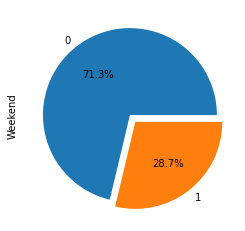

In [ ]:
dataframe['Weekend'].value_counts().plot(kind = 'pie',explode= (0,0.1),autopct='%1.1f%%')


#### Weekend distribution by other Features

Scegli le variabili principali di cui fare correlazione con is weekend

##### Weekend by CO(GT)

In [ ]:
COGTgroup=dataframe['CO(GT)'].copy()
COGTgroup.describe()

count    9357.000000
mean        2.152750
std         1.316068
min         0.100000
25%         1.200000
50%         2.152750
75%         2.600000
max        11.900000
Name: CO(GT), dtype: float64

In [ ]:
COGTgroup_unique = COGTgroup.unique()
COGTgroup_unique.sort()
COGTgroup_unique

array([ 0.1       ,  0.2       ,  0.3       ,  0.4       ,  0.5       ,
        0.6       ,  0.7       ,  0.8       ,  0.9       ,  1.        ,
        1.1       ,  1.2       ,  1.3       ,  1.4       ,  1.5       ,
        1.6       ,  1.7       ,  1.8       ,  1.9       ,  2.        ,
        2.1       ,  2.15274954,  2.2       ,  2.3       ,  2.4       ,
        2.5       ,  2.6       ,  2.7       ,  2.8       ,  2.9       ,
        3.        ,  3.1       ,  3.2       ,  3.3       ,  3.4       ,
        3.5       ,  3.6       ,  3.7       ,  3.8       ,  3.9       ,
        4.        ,  4.1       ,  4.2       ,  4.3       ,  4.4       ,
        4.5       ,  4.6       ,  4.7       ,  4.8       ,  4.9       ,
        5.        ,  5.1       ,  5.2       ,  5.3       ,  5.4       ,
        5.5       ,  5.6       ,  5.7       ,  5.8       ,  5.9       ,
        6.        ,  6.1       ,  6.2       ,  6.3       ,  6.4       ,
        6.5       ,  6.6       ,  6.7       ,  6.8       ,  6.9 

In [ ]:
COGTgroup_default = pd.crosstab(dataframe['CO(GT)']//0.5*0.5, dataframe['Weekend'])
COGTgroup_default

Weekend     0    1
CO(GT)            
0.0       221  115
0.5       745  475
1.0       771  575
1.5       829  394
2.0      1978  709
2.5       544  172
3.0       452  105
3.5       329   54
4.0       261   43
4.5       178   25
5.0       110    8
5.5        89   10
6.0        50    2
6.5        46    1
7.0        15    0
7.5        16    0
8.0        15    0
8.5         8    0
9.0         5    0
9.5         2    0
10.0        3    0
11.5        2    0

In [ ]:
COGTgroup_default_norm = COGTgroup_default.div(COGTgroup_default.sum(1).astype(float), axis=0)
COGTgroup_default_norm

Weekend         0         1
CO(GT)                     
0.0      0.657738  0.342262
0.5      0.610656  0.389344
1.0      0.572808  0.427192
1.5      0.677841  0.322159
2.0      0.736137  0.263863
2.5      0.759777  0.240223
3.0      0.811490  0.188510
3.5      0.859008  0.140992
4.0      0.858553  0.141447
4.5      0.876847  0.123153
5.0      0.932203  0.067797
5.5      0.898990  0.101010
6.0      0.961538  0.038462
6.5      0.978723  0.021277
7.0      1.000000  0.000000
7.5      1.000000  0.000000
8.0      1.000000  0.000000
8.5      1.000000  0.000000
9.0      1.000000  0.000000
9.5      1.000000  0.000000
10.0     1.000000  0.000000
11.5     1.000000  0.000000

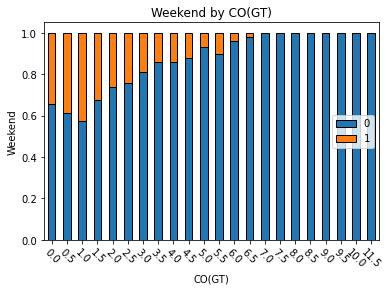

In [ ]:
COGTgroup_default_norm.plot(kind='bar', stacked=True, title='Weekend by CO(GT)', edgecolor='black')
plt.xlabel('CO(GT)')
plt.ylabel('Weekend')
plt.xticks(rotation=-45)
plt.legend(loc="right")
plt.show()

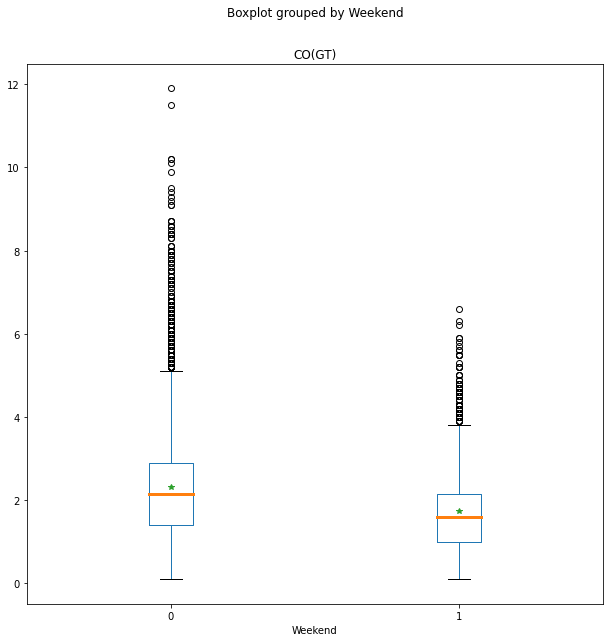

In [ ]:
dataframe.boxplot(column = 'CO(GT)', by = 'Weekend', figsize = (10,10),grid=False,medianprops=dict(linewidth=3),meanprops = dict(marker = '*'),showmeans = True)

non mi fa impazzire il boxplot qua, tengo grafico di prima

From the bivariance of 'CO(GT)' and our dependent variabile 'is Weekend' we can see that we have value over 6.5 level of CO(GT) only in "eork day". 
Instead, for low levels of CO(GT) (under 1.0) we have a distribution of work day and weekend approximately equal to 50%.

##### Weekend by PT08.S1(CO) 

In [ ]:
PT08S1group=dataframe['PT08.S1(CO)'].copy()
PT08S1group.describe()

count    9357.000000
mean     1099.833166
std       212.791672
min       647.000000
25%       941.000000
50%      1075.000000
75%      1221.000000
max      2040.000000
Name: PT08.S1(CO), dtype: float64

In [ ]:
PT08S1group_unique = PT08S1group.unique()
PT08S1group_unique.sort()

In [ ]:
PT08S1group_default = pd.crosstab(dataframe['PT08.S1(CO)']//50*50, dataframe['Weekend'])
PT08S1group_default

Weekend        0    1
PT08.S1(CO)          
600.0          0    2
650.0         13   11
700.0         61   27
750.0        165   78
800.0        330  197
850.0        479  267
900.0        530  309
950.0        607  307
1000.0       588  280
1050.0       917  283
1100.0       519  220
1150.0       414  173
1200.0       367  138
1250.0       324  102
1300.0       308   77
1350.0       239   51
1400.0       224   45
1450.0       178   48
1500.0       133   34
1550.0        89   13
1600.0        59   12
1650.0        38    3
1700.0        32    4
1750.0        19    4
1800.0        17    2
1850.0         7    1
1900.0         5    0
1950.0         5    0
2000.0         2    0

In [ ]:
PT08S1group_default_norm = PT08S1group_default.div(PT08S1group_default.sum(1).astype(float), axis=0)
PT08S1group_default_norm

Weekend             0         1
PT08.S1(CO)                    
600.0        0.000000  1.000000
650.0        0.541667  0.458333
700.0        0.693182  0.306818
750.0        0.679012  0.320988
800.0        0.626186  0.373814
850.0        0.642091  0.357909
900.0        0.631704  0.368296
950.0        0.664114  0.335886
1000.0       0.677419  0.322581
1050.0       0.764167  0.235833
1100.0       0.702300  0.297700
1150.0       0.705281  0.294719
1200.0       0.726733  0.273267
1250.0       0.760563  0.239437
1300.0       0.800000  0.200000
1350.0       0.824138  0.175862
1400.0       0.832714  0.167286
1450.0       0.787611  0.212389
1500.0       0.796407  0.203593
1550.0       0.872549  0.127451
1600.0       0.830986  0.169014
1650.0       0.926829  0.073171
1700.0       0.888889  0.111111
1750.0       0.826087  0.173913
1800.0       0.894737  0.105263
1850.0       0.875000  0.125000
1900.0       1.000000  0.000000
1950.0       1.000000  0.000000
2000.0       1.000000  0.000000

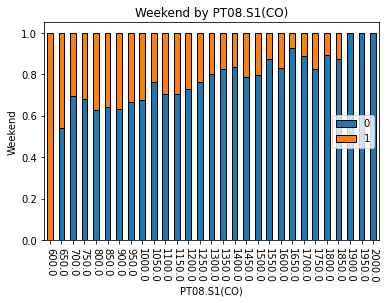

In [ ]:
PT08S1group_default_norm.plot(kind='bar', stacked=True, title='Weekend by PT08.S1(CO)', edgecolor='black')
plt.xlabel('PT08.S1(CO)')
plt.ylabel('Weekend')
plt.xticks(rotation=-90)
plt.legend(loc="right")
plt.show()

For the feauture PT08.S1(CO) we can see a linear trend.
If the value of PT08.S1(CO) grows, grows also the frequence of no-weekend day.

##### Weekend by PT08.S2(NMHC)

In [ ]:
PT08S2group=dataframe['PT08.S2(NMHC)'].copy()
PT08S2group.describe()

count    9357.000000
mean      939.153376
std       261.560236
min       383.000000
25%       743.000000
50%       923.000000
75%      1105.000000
max      2214.000000
Name: PT08.S2(NMHC), dtype: float64

In [ ]:
PT08S2group_unique = PT08S2group.unique()
PT08S2group_unique.sort()

In [ ]:
PT08S2group_default = pd.crosstab(dataframe['PT08.S2(NMHC)']//100*100, dataframe['Weekend'])
PT08S2group_default

Weekend           0    1
PT08.S2(NMHC)           
300.0             7    1
400.0           132   30
500.0           396  154
600.0           635  467
700.0           728  507
800.0           808  510
900.0          1101  491
1000.0          730  274
1100.0          711  137
1200.0          537   73
1300.0          383   34
1400.0          250    8
1500.0          124    2
1600.0           70    0
1700.0           31    0
1800.0           16    0
1900.0            8    0
2000.0            1    0
2200.0            1    0

In [ ]:
PT08S2group_default_norm = PT08S2group_default.div(PT08S2group_default.sum(1).astype(float), axis=0)
PT08S2group_default_norm

Weekend               0         1
PT08.S2(NMHC)                    
300.0          0.875000  0.125000
400.0          0.814815  0.185185
500.0          0.720000  0.280000
600.0          0.576225  0.423775
700.0          0.589474  0.410526
800.0          0.613050  0.386950
900.0          0.691583  0.308417
1000.0         0.727092  0.272908
1100.0         0.838443  0.161557
1200.0         0.880328  0.119672
1300.0         0.918465  0.081535
1400.0         0.968992  0.031008
1500.0         0.984127  0.015873
1600.0         1.000000  0.000000
1700.0         1.000000  0.000000
1800.0         1.000000  0.000000
1900.0         1.000000  0.000000
2000.0         1.000000  0.000000
2200.0         1.000000  0.000000

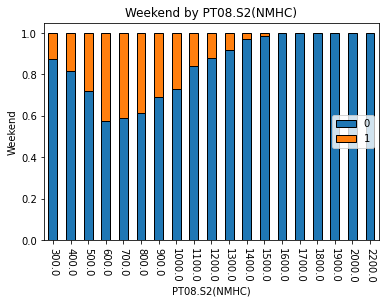

In [ ]:
PT08S2group_default_norm.plot(kind='bar', stacked=True, title='Weekend by PT08.S2(NMHC)', edgecolor='black')
plt.xlabel('PT08.S2(NMHC)')
plt.ylabel('Weekend')
plt.xticks(rotation=-90)
plt.legend(loc="right")
plt.show()

Quite different, we have a significat dominance about no-weekend day but we can see a range in with the weekend day are higher, from 500.0 to 1000.0

##### Weekend by PT08.S3(Nox)

In [ ]:
PT08S3group=dataframe['PT08.S3(NOx)'].copy()
PT08S3group.describe()

count    9357.000000
mean      835.493605
std       251.743954
min       322.000000
25%       666.000000
50%       818.000000
75%       960.000000
max      2683.000000
Name: PT08.S3(NOx), dtype: float64

In [ ]:
PT08S3group_unique = PT08S3group.unique()
PT08S3group_unique.sort()

In [ ]:
PT08S3group_default = pd.crosstab(dataframe['PT08.S3(NOx)']//150*150, dataframe['Weekend'])
PT08S3group_default

Weekend          0    1
PT08.S3(NOx)           
300.0          224   11
450.0         1072  213
600.0         1583  509
750.0         1877  796
900.0          916  596
1050.0         498  338
1200.0         239  148
1350.0         124   46
1500.0          58   14
1650.0          41   11
1800.0          21    1
1950.0           9    4
2100.0           0    1
2250.0           4    0
2400.0           1    0
2550.0           2    0

In [ ]:
PT08S3group_default_norm = PT08S3group_default.div(PT08S3group_default.sum(1).astype(float), axis=0)
PT08S3group_default_norm

Weekend              0         1
PT08.S3(NOx)                    
300.0         0.953191  0.046809
450.0         0.834241  0.165759
600.0         0.756692  0.243308
750.0         0.702207  0.297793
900.0         0.605820  0.394180
1050.0        0.595694  0.404306
1200.0        0.617571  0.382429
1350.0        0.729412  0.270588
1500.0        0.805556  0.194444
1650.0        0.788462  0.211538
1800.0        0.954545  0.045455
1950.0        0.692308  0.307692
2100.0        0.000000  1.000000
2250.0        1.000000  0.000000
2400.0        1.000000  0.000000
2550.0        1.000000  0.000000

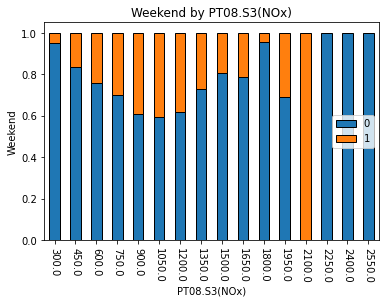

In [ ]:
PT08S3group_default_norm.plot(kind='bar', stacked=True, title='Weekend by PT08.S3(NOx)', edgecolor='black')
plt.xlabel('PT08.S3(NOx)')
plt.ylabel('Weekend')
plt.xticks(rotation=-90)
plt.legend(loc="right")
plt.show()

We have a vale, 2100, in which there are onlu weekend day, is it attendible? 

##### Weekend by PT08.S4(NO2)

In [ ]:
PT08S4group=dataframe['PT08.S4(NO2)'].copy()
PT08S4group.describe()

count    9357.000000
mean     1456.264598
std       339.367559
min       551.000000
25%      1242.000000
50%      1456.264598
75%      1662.000000
max      2775.000000
Name: PT08.S4(NO2), dtype: float64

In [ ]:
PT08S4group_unique = PT08S4group.unique()
PT08S4group_unique.sort()

In [ ]:
PT08S4group_default = pd.crosstab(dataframe['PT08.S4(NO2)']//150*150, dataframe['Weekend'])
PT08S4group_default

Weekend          0    1
PT08.S4(NO2)           
450.0            4    0
600.0           65   21
750.0          243  179
900.0          465  248
1050.0         559  278
1200.0         829  438
1350.0        1299  653
1500.0        1100  530
1650.0         869  240
1800.0         570   82
1950.0         354   14
2100.0         159    3
2250.0          80    2
2400.0          45    0
2550.0          26    0
2700.0           2    0

In [ ]:
PT08S4group_default_norm = PT08S4group_default.div(PT08S4group_default.sum(1).astype(float), axis=0)
PT08S4group_default_norm

Weekend              0         1
PT08.S4(NO2)                    
450.0         1.000000  0.000000
600.0         0.755814  0.244186
750.0         0.575829  0.424171
900.0         0.652174  0.347826
1050.0        0.667861  0.332139
1200.0        0.654301  0.345699
1350.0        0.665471  0.334529
1500.0        0.674847  0.325153
1650.0        0.783589  0.216411
1800.0        0.874233  0.125767
1950.0        0.961957  0.038043
2100.0        0.981481  0.018519
2250.0        0.975610  0.024390
2400.0        1.000000  0.000000
2550.0        1.000000  0.000000
2700.0        1.000000  0.000000

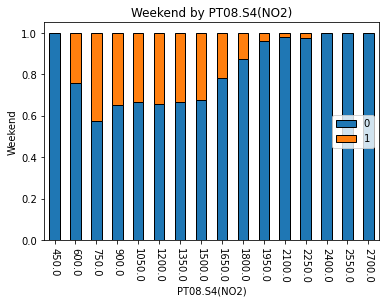

In [ ]:
PT08S4group_default_norm.plot(kind='bar', stacked=True, title='Weekend by PT08.S4(NO2)', edgecolor='black')
plt.xlabel('PT08.S4(NO2)')
plt.ylabel('Weekend')
plt.xticks(rotation=-90)
plt.legend(loc="right")
plt.show()

Similar to the previous

##### Weekend by PT08.S5(O3)

In [ ]:
PT08S5group=dataframe['PT08.S5(O3)'].copy()
PT08S5group.describe()

count    9357.000000
mean     1022.906128
std       390.612324
min       221.000000
25%       742.000000
50%       983.000000
75%      1255.000000
max      2523.000000
Name: PT08.S5(O3), dtype: float64

In [ ]:
PT08S5group_unique = PT08S5group.unique()
PT08S5group_unique.sort()

In [ ]:
PT08S5group_default = pd.crosstab(dataframe['PT08.S5(O3)']//150*150, dataframe['Weekend'])
PT08S5group_default

Weekend         0    1
PT08.S5(O3)           
150.0          28    6
300.0         216  150
450.0         417  424
600.0         765  408
750.0         989  461
900.0        1296  466
1050.0        772  274
1200.0        611  204
1350.0        538  153
1500.0        418   66
1650.0        284   31
1800.0        161   24
1950.0         98   11
2100.0         53    4
2250.0         13    3
2400.0         10    3

In [ ]:
PT08S5group_default_norm = PT08S5group_default.div(PT08S5group_default.sum(1).astype(float), axis=0)
PT08S5group_default_norm

Weekend             0         1
PT08.S5(O3)                    
150.0        0.823529  0.176471
300.0        0.590164  0.409836
450.0        0.495838  0.504162
600.0        0.652174  0.347826
750.0        0.682069  0.317931
900.0        0.735528  0.264472
1050.0       0.738050  0.261950
1200.0       0.749693  0.250307
1350.0       0.778582  0.221418
1500.0       0.863636  0.136364
1650.0       0.901587  0.098413
1800.0       0.870270  0.129730
1950.0       0.899083  0.100917
2100.0       0.929825  0.070175
2250.0       0.812500  0.187500
2400.0       0.769231  0.230769

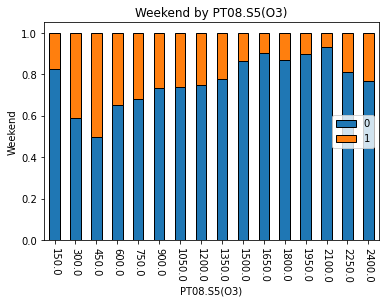

In [ ]:
PT08S5group_default_norm.plot(kind='bar', stacked=True, title='Weekend by PT08.S5(O3)', edgecolor='black')
plt.xlabel('PT08.S5(O3)')
plt.ylabel('Weekend')
plt.xticks(rotation=-90)
plt.legend(loc="right")
plt.show()

Linear trend as the previuos, but we can see an increase of weekend day for the higher level of PT08.S5(O3).
Instead for other features when the values are high the we have almost only no-weekend day.

##### Weekend by C6H6(GT)

In [ ]:
C6H6group=dataframe['C6H6(GT)'].copy()
C6H6group.describe()

count    9357.000000
mean       10.083105
std         7.302650
min         0.100000
25%         4.600000
50%         8.600000
75%        13.600000
max        63.700000
Name: C6H6(GT), dtype: float64

In [ ]:
C6H6group_unique = C6H6group.unique()
C6H6group_unique.sort()

In [ ]:
C6H6group_default = pd.crosstab(dataframe['C6H6(GT)']//5*5, dataframe['Weekend'])
C6H6group_default

Weekend      0     1
C6H6(GT)            
0.0       1589   958
5.0       1713  1071
10.0      1600   475
15.0       857   139
20.0       490    38
25.0       237     5
30.0        98     2
35.0        52     0
40.0        18     0
45.0        10     0
50.0         4     0
60.0         1     0

In [ ]:
C6H6group_default_norm = C6H6group_default.div(C6H6group_default.sum(1).astype(float), axis=0)
C6H6group_default_norm

Weekend          0         1
C6H6(GT)                    
0.0       0.623871  0.376129
5.0       0.615302  0.384698
10.0      0.771084  0.228916
15.0      0.860442  0.139558
20.0      0.928030  0.071970
25.0      0.979339  0.020661
30.0      0.980000  0.020000
35.0      1.000000  0.000000
40.0      1.000000  0.000000
45.0      1.000000  0.000000
50.0      1.000000  0.000000
60.0      1.000000  0.000000

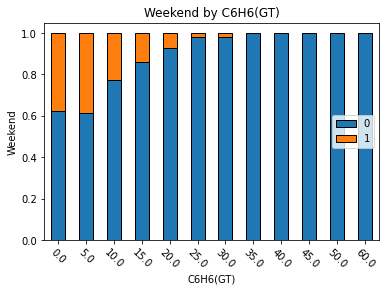

In [ ]:
C6H6group_default_norm.plot(kind='bar', stacked=True, title='Weekend by C6H6(GT)', edgecolor='black')
plt.xlabel('C6H6(GT)')
plt.ylabel('Weekend')
plt.xticks(rotation=-45)
plt.legend(loc="right")
plt.show()

As we can see for CO(GT), also in this feature C6H6(GT) we can find a treshold value.
This value is 35.0, and after it we have only no weekend day.
Also the values of 25.0 and 30.0 could be considered with no weekend day (they have around of 2% of weekend values)

##### Weekend by NOx(GT)

In [ ]:
NOxgroup=dataframe['NOx(GT)'].copy()
NOxgroup.describe()

count    9357.000000
mean      246.896735
std       193.426632
min         2.000000
25%       112.000000
50%       229.000000
75%       284.000000
max      1479.000000
Name: NOx(GT), dtype: float64

In [ ]:
NOxgroup_unique = NOxgroup.unique()
NOxgroup_unique.sort()

In [ ]:
NOxgroup_default = pd.crosstab(dataframe['NOx(GT)']//100*100, dataframe['Weekend'])
NOxgroup_default

Weekend     0    1
NOx(GT)           
0.0      1209  767
100.0    1578  664
200.0    2140  815
300.0     608  176
400.0     348  125
500.0     256   80
600.0     183   32
700.0     132   15
800.0      90   10
900.0      46    4
1000.0     39    0
1100.0     18    0
1200.0     14    0
1300.0      7    0
1400.0      1    0

In [ ]:
NOxgroup_default_norm = NOxgroup_default.div(NOxgroup_default.sum(1).astype(float), axis=0)
NOxgroup_default_norm

Weekend         0         1
NOx(GT)                    
0.0      0.611842  0.388158
100.0    0.703836  0.296164
200.0    0.724196  0.275804
300.0    0.775510  0.224490
400.0    0.735729  0.264271
500.0    0.761905  0.238095
600.0    0.851163  0.148837
700.0    0.897959  0.102041
800.0    0.900000  0.100000
900.0    0.920000  0.080000
1000.0   1.000000  0.000000
1100.0   1.000000  0.000000
1200.0   1.000000  0.000000
1300.0   1.000000  0.000000
1400.0   1.000000  0.000000

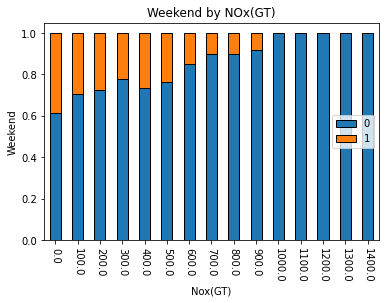

In [ ]:
NOxgroup_default_norm.plot(kind='bar', stacked=True, title='Weekend by NOx(GT)', edgecolor='black')
plt.xlabel('Nox(GT)')
plt.ylabel('Weekend')
plt.xticks(rotation=-90)
plt.legend(loc="right")
plt.show()

As we can see we can find a treshold value.
This value is 1000.0, and after it we have only no weekend day.

##### Weekend by NO2(GT)

In [ ]:
NO2group=dataframe['NO2(GT)'].copy()
NO2group.describe()

count    9357.000000
mean      113.091251
std        43.920954
min         2.000000
25%        86.000000
50%       113.091251
75%       133.000000
max       340.000000
Name: NO2(GT), dtype: float64

In [ ]:
NO2group_unique = NO2group.unique()
NO2group_unique.sort()

In [ ]:
NO2group_default = pd.crosstab(dataframe['NO2(GT)']//25*25, dataframe['Weekend'])
NO2group_default

Weekend     0    1
NO2(GT)           
0.0        42   24
25.0      319  193
50.0      732  469
75.0      945  534
100.0    2371  924
125.0     946  252
150.0     603  161
175.0     369   75
200.0     185   37
225.0      97   13
250.0      33    4
275.0      19    1
300.0       5    1
325.0       3    0

In [ ]:
NO2group_default_norm = NO2group_default.div(NO2group_default.sum(1).astype(float), axis=0)
NO2group_default_norm

Weekend         0         1
NO2(GT)                    
0.0      0.636364  0.363636
25.0     0.623047  0.376953
50.0     0.609492  0.390508
75.0     0.638945  0.361055
100.0    0.719575  0.280425
125.0    0.789649  0.210351
150.0    0.789267  0.210733
175.0    0.831081  0.168919
200.0    0.833333  0.166667
225.0    0.881818  0.118182
250.0    0.891892  0.108108
275.0    0.950000  0.050000
300.0    0.833333  0.166667
325.0    1.000000  0.000000

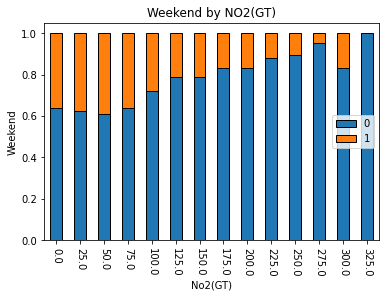

In [ ]:
NO2group_default_norm.plot(kind='bar', stacked=True, title='Weekend by NO2(GT)', edgecolor='black')
plt.xlabel('No2(GT)')
plt.ylabel('Weekend')
plt.xticks(rotation=-90)
plt.legend(loc="right")
plt.show()

For this feature we don't have a net differences.
The no-weekend day are always over 60% and grow linearly. Only for 325.0 we have a presence of only no-weekend.

##### Relazione RH e AH

Dato che RH e AH dovrebbero essere due grandezze correlate vediamo come variano assieme in funzione della data, più avanti vedi come sono correlate

Text(0.5, 0, 'date')

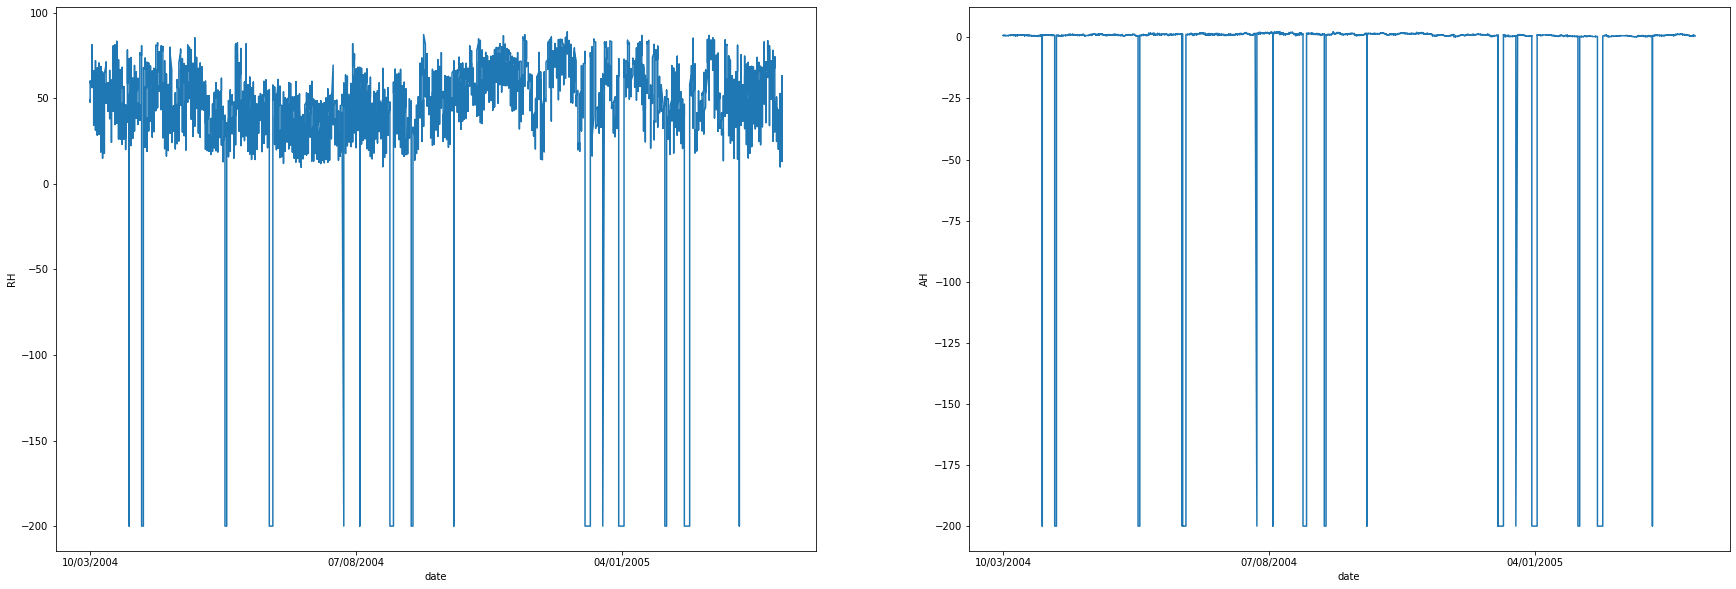

In [ ]:

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (30,10))
ax1.plot(df['Date'], df['RH'])
ax2.plot(df['Date'], df['AH'])

ax1.xaxis.set_major_locator(plt.MaxNLocator(4))
ax2.xaxis.set_major_locator(plt.MaxNLocator(4))

ax1.set_ylabel('RH')
ax1.set_xlabel('date')
ax2.set_ylabel('AH')
ax2.set_xlabel('date')

### Correlation matrix (heatmap)

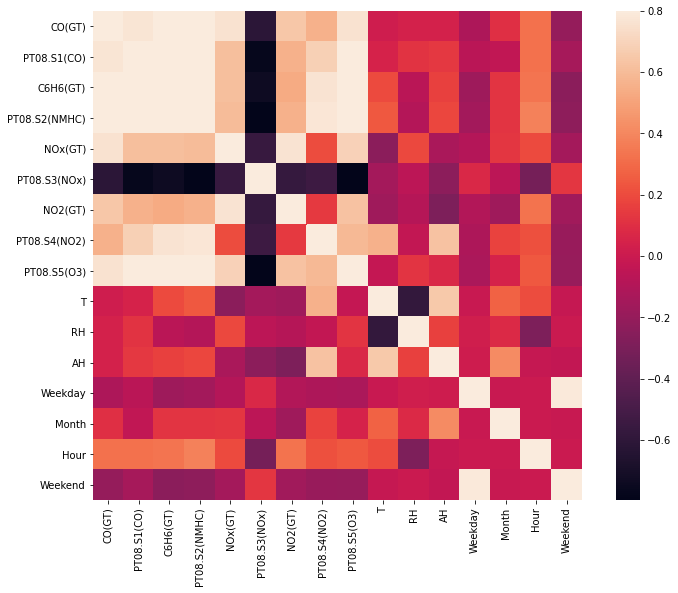

In [ ]:
corrmat = dataframe.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

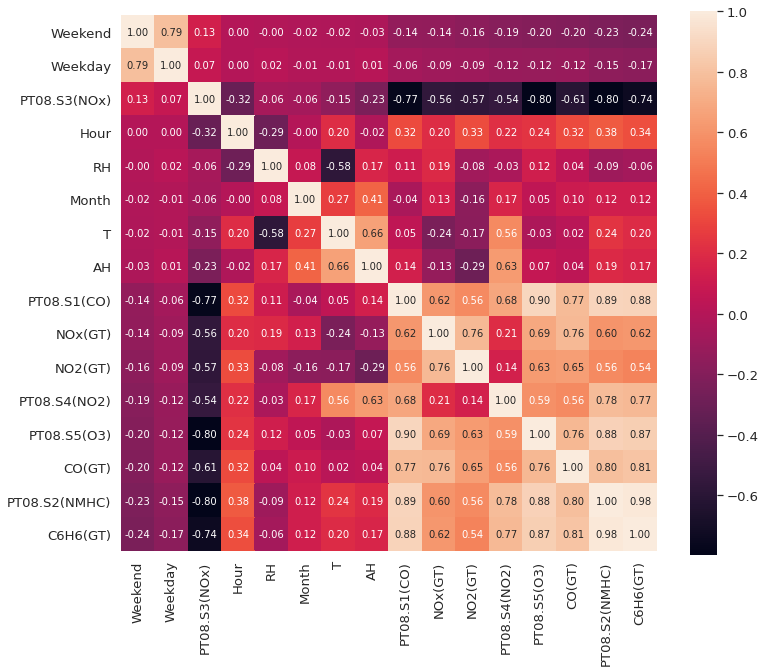

In [ ]:
# WEEKEND CORRELATION MATRIX

k = 16  # number of variables for heatmap (now are all selected)
cols = corrmat.nlargest(k, 'Weekend')['Weekend'].index
cm = np.corrcoef(dataframe[cols].values.T)
sns.set(font_scale=1.20)
plt.figure(figsize=(12, 10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

This is the total HeatMap, ok but i want an Heatmap only with the feature of gas and the dependet variable weekend, so in next cells below we extract the features and recompute the heatmap.
dfgas is a dataset with the only interesting features.

RH e AH non sono cosi correlate da giustificare la rimozione di una delle due, le tengo entrambe.



In [ ]:
dataframe.head()

Date      Time  CO(GT)  PT08.S1(CO)  ...  Weekday  Month  Hour  Weekend
0 2004-03-10  18.00.00     2.6       1360.0  ...        2      3    18        0
1 2004-03-10  19.00.00     2.0       1292.0  ...        2      3    19        0
2 2004-03-10  20.00.00     2.2       1402.0  ...        2      3    20        0
3 2004-03-10  21.00.00     2.2       1376.0  ...        2      3    21        0
4 2004-03-10  22.00.00     1.6       1272.0  ...        2      3    22        0

[5 rows x 18 columns]

In [ ]:
dfgas = dataframe[["CO(GT)", "PT08.S1(CO)", "C6H6(GT)",	"PT08.S2(NMHC)", "NOx(GT)",	"PT08.S3(NOx)",	"NO2(GT)",	"PT08.S4(NO2)",	"PT08.S5(O3)","T"	,"RH"	,"AH"	,"Month","Weekend"]]

In [ ]:
dfgas.head()

CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  ...    RH      AH  Month  Weekend
0     2.6       1360.0      11.9         1046.0  ...  48.9  0.7578      3        0
1     2.0       1292.0       9.4          955.0  ...  47.7  0.7255      3        0
2     2.2       1402.0       9.0          939.0  ...  54.0  0.7502      3        0
3     2.2       1376.0       9.2          948.0  ...  60.0  0.7867      3        0
4     1.6       1272.0       6.5          836.0  ...  59.6  0.7888      3        0

[5 rows x 14 columns]

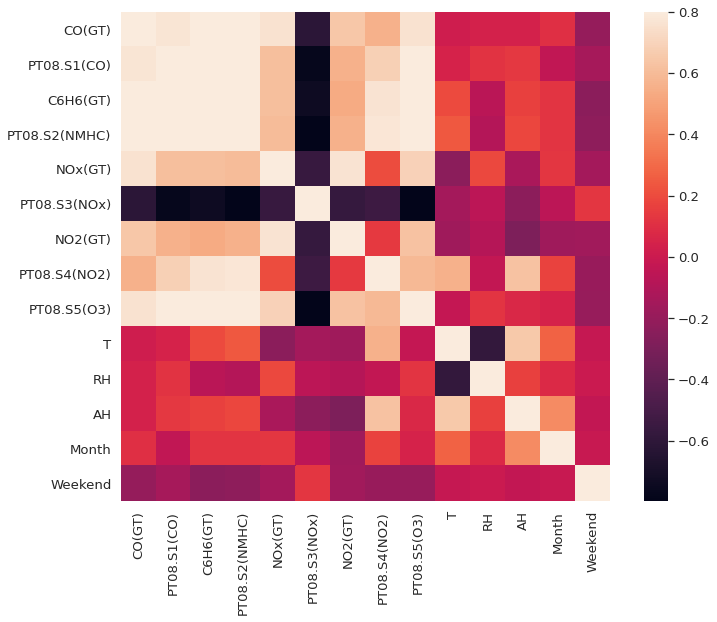

In [ ]:
corrmat = dfgas.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

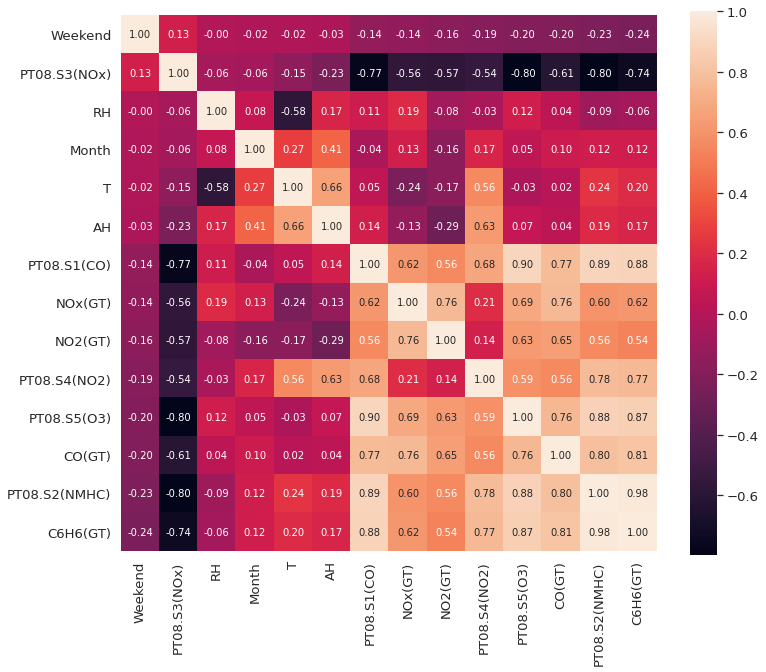

In [ ]:
k = 14  # number of variables for heatmap (now are all selected)
cols = corrmat.nlargest(k, 'Weekend')['Weekend'].index
cm = np.corrcoef(dfgas[cols].values.T)
sns.set(font_scale=1.20)
plt.figure(figsize=(12, 10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

There aren't strong correlations with weekend, the only feature is PT08.S3(NOx), but with a very low value, also RH and Month could be interesting.

possiamo pensare anche che sia il valore di umidità, magari influenzato dai gas, a darmi indicazione se sia weekend o meno.

dff è il dataset dfgas (gas + umidità, temperatura e mese) + il weekday e Hour

In [ ]:
dff = dataframe[["CO(GT)", "PT08.S1(CO)", "C6H6(GT)",	"PT08.S2(NMHC)", "NOx(GT)",	"PT08.S3(NOx)",	"NO2(GT)",	"PT08.S4(NO2)",	"PT08.S5(O3)","T"	,"RH"	,"AH"	,"Hour", "Month",	"Weekday","Weekend"]]

In [ ]:
dff.head()

CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  ...  Hour  Month  Weekday  Weekend
0     2.6       1360.0      11.9         1046.0  ...    18      3        2        0
1     2.0       1292.0       9.4          955.0  ...    19      3        2        0
2     2.2       1402.0       9.0          939.0  ...    20      3        2        0
3     2.2       1376.0       9.2          948.0  ...    21      3        2        0
4     1.6       1272.0       6.5          836.0  ...    22      3        2        0

[5 rows x 16 columns]

### Scatter Plot

NON MI PIACE, ANCHE CONFRONTANDO ALTRI REPORT NESSUNO HA MESSO SCATTER PLOT, DIREI DI NON USARLO, MA RICONTROLLA E CHIEDE A IRE E CHIARA

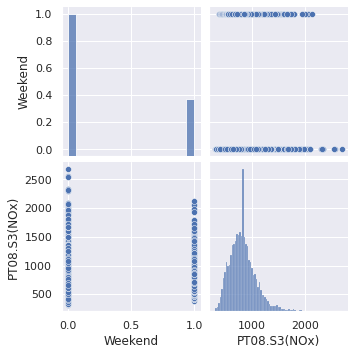

In [ ]:
#scatterplot
sns.set()
cols = ["Weekend", "PT08.S3(NOx)"]
sns.pairplot(dff[cols], height = 2.5)
plt.show()

#### Grafici alternativi

é discorso simile a quanto fatto in **Feature distribtions and statistics on Dataframe** , ma pò essere carino. Magari si tiene per quelle più correlate.

##### PT08.S3(NOx)

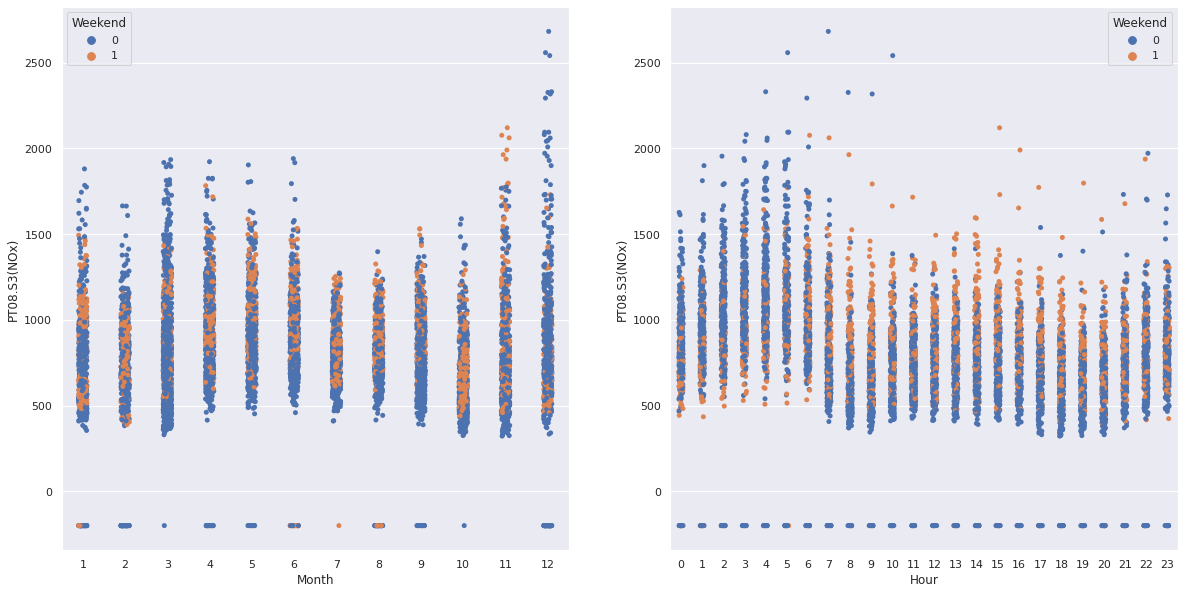

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,10))

sns.stripplot(x = dff['Month'], y = df['PT08.S3(NOx)'], hue = dff['Weekend'],ax=ax1)
sns.stripplot(x = dff['Hour'], y = df['PT08.S3(NOx)'], hue = dff['Weekend'],ax=ax2)

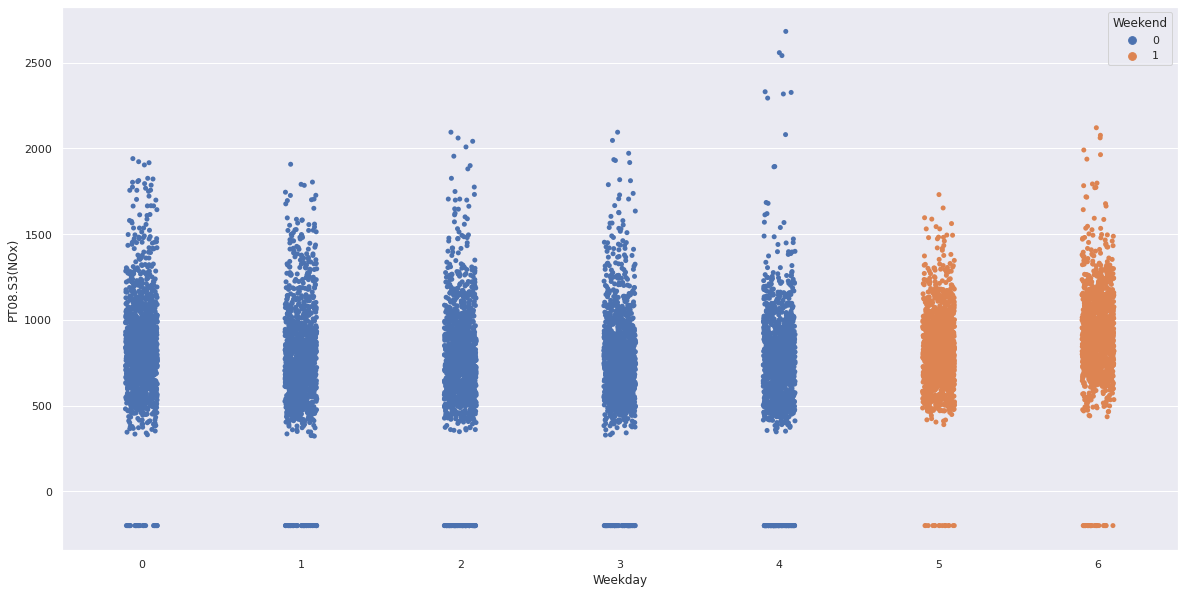

In [ ]:
fig, (ax1) = plt.subplots(1, figsize=(20,10))

sns.stripplot(x = dff['Weekday'], y = df['PT08.S3(NOx)'], hue = dff['Weekend'],ax=ax1)

Questo ultimo grafico non ha senso, è ovvio come risultato, il weekday 5 e 6 sono effettivamente il weekend, quindi uso solo mese e ora per questo tipo di grafico

##### RH

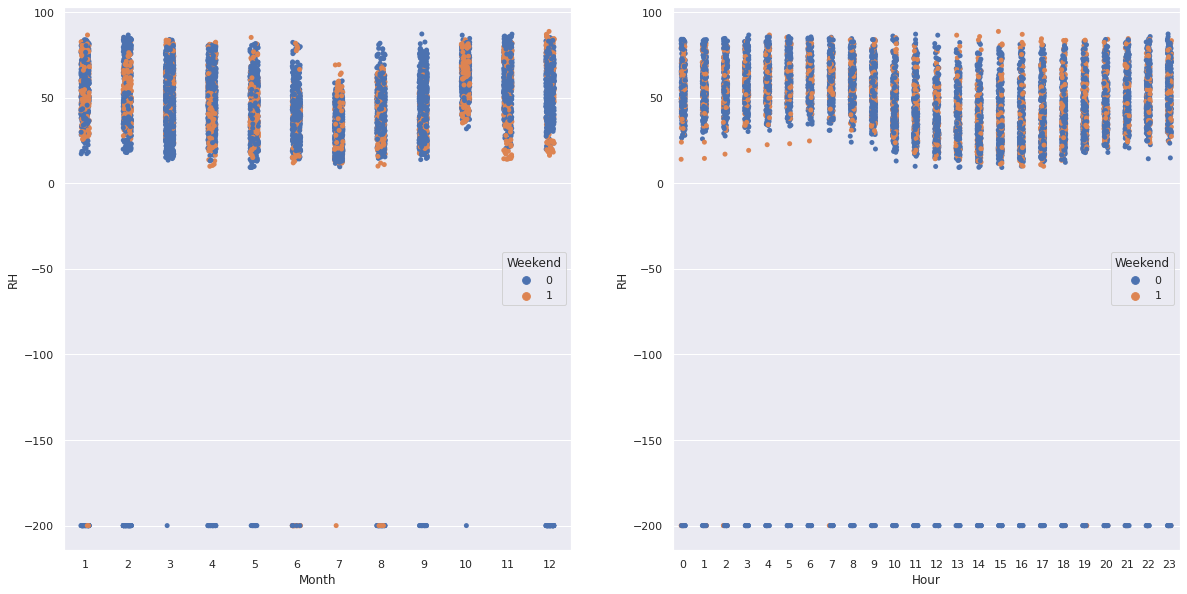

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,10))

sns.stripplot(x = dff['Month'], y = df['RH'], hue = dff['Weekend'],ax=ax1)
sns.stripplot(x = dff['Hour'], y = df['RH'], hue = dff['Weekend'],ax=ax2)

##### T

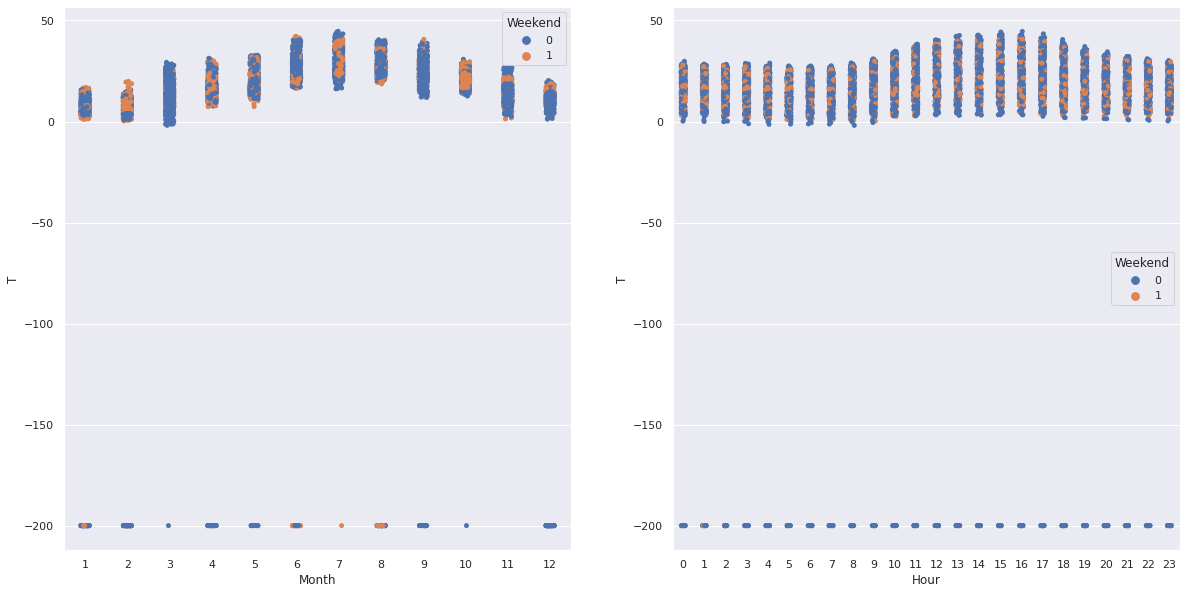

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,10))

sns.stripplot(x = dff['Month'], y = df['T'], hue = dff['Weekend'],ax=ax1)
sns.stripplot(x = dff['Hour'], y = df['T'], hue = dff['Weekend'],ax=ax2)

### Split Dataset 

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

As the previous split, in this way we created 4 array:
x_train , x_test , y_train , y_test

Now the Dataset is ready

## **1.2 and 1.3 - Basic Classifiers**

**1.2 Solve the classification task with k-NN (testing values of k), Naive Bayes, Logistic Regression, Decision Tree using cross-validation and/or random/grid search for parameter estimation.**

**1.3 Evaluate each classifier using Accuracy, Precision, Recall, F1, ROC, AUC and Lift Chart.** 

### **KNN**

We use the dataframe called dff because has only interesting features (gas) and the dependent variable.

In [ ]:
dff.head()

CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  ...  Hour  Month  Weekday  Weekend
0     2.6       1360.0      11.9         1046.0  ...    18      3        2        0
1     2.0       1292.0       9.4          955.0  ...    19      3        2        0
2     2.2       1402.0       9.0          939.0  ...    20      3        2        0
3     2.2       1376.0       9.2          948.0  ...    21      3        2        0
4     1.6       1272.0       6.5          836.0  ...    22      3        2        0

[5 rows x 16 columns]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score 

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import roc_curve, auc, roc_auc_score


In [ ]:
!pip install scikit-plot

In [ ]:
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve

#### Standardize the Variables

I need to have all the interesting feature in the same scale to use KNN.

In [ ]:
scaler = StandardScaler()

Before standardize i need to drop out the depenedet variable

In [ ]:
scaler.fit(dff.drop('Weekend',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
scaled_features = scaler.transform(dff.drop('Weekend',axis=1))

In [ ]:
dff_feat = pd.DataFrame(scaled_features,columns=dff.columns[:-1])
dff_feat.head()

CO(GT)  PT08.S1(CO)  C6H6(GT)  ...      Hour     Month   Weekday
0  0.339856     1.222702  0.248813  ...  0.939133 -0.962879 -0.504915
1 -0.116071     0.903123 -0.093547  ...  1.083583 -0.962879 -0.504915
2  0.035905     1.420088 -0.148325  ...  1.228033 -0.962879 -0.504915
3  0.035905     1.297897 -0.120936  ...  1.372483 -0.962879 -0.504915
4 -0.420023     0.809130 -0.490684  ...  1.516933 -0.962879 -0.504915

[5 rows x 15 columns]

Now i recompute the split on scaled features and without dependent variable:


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,dff['Weekend'],test_size=0.20)

In [ ]:
X_train[0]

array([-0.19205922, -0.25299883, -0.07985272,  0.07970531, -0.29933742,
       -0.65345123, -0.3891574 ,  0.53259381, -0.31722693,  0.6217005 ,
        0.36325189,  1.45919394, -1.66096635,  0.78233363, -0.50491507])

#### Apply KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
# i have defined randomnli 5 neighbors

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
pred = knn.predict(X_test)

##### Prediction 

In [ ]:
print(confusion_matrix(y_test,pred))

[[1327   29]
 [  18  498]]


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1356
           1       0.94      0.97      0.95       516

    accuracy                           0.97      1872
   macro avg       0.97      0.97      0.97      1872
weighted avg       0.98      0.97      0.97      1872



##### Choosing K value

In [ ]:
error_rate = []

for i in range(1,25):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

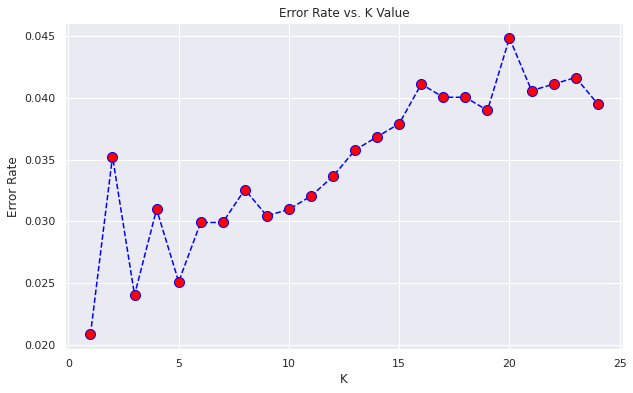

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,25),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

From this plot the minimum Error Rate is for K = 1.
I tested from 1 to 50 but i maintain this plot with K=20 beacuse we can identify with no doubts the value K=1.

Check in terms of accurancy:

In [ ]:
neighbors = list(range(1,10))
# empty list that will hold cv scores
cv_scores = [ ]
#perform 10-fold cross-validation
for K in neighbors:
    knn = KNeighborsClassifier(n_neighbors = K)
    scores = cross_val_score(knn,X_train,y_train,cv = 10,scoring ="accuracy")
    cv_scores.append(scores.mean())

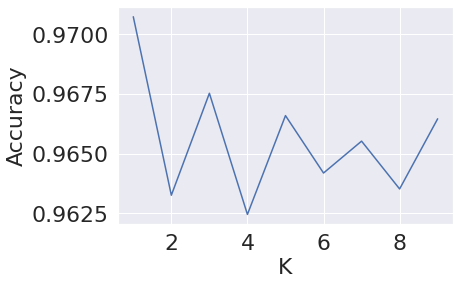

In [ ]:
plt.plot(range(1,10), cv_scores)
plt.ylabel('Accuracy', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

In terms of Accurancy the best result is also for K=1,so we select k=1.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1,  weights='uniform')

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1 and weights=uniform')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1 and weights=uniform


[[1335   21]
 [  18  498]]


              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1356
           1       0.96      0.97      0.96       516

    accuracy                           0.98      1872
   macro avg       0.97      0.97      0.97      1872
weighted avg       0.98      0.98      0.98      1872



In [ ]:
knn= KNeighborsClassifier(n_neighbors=1, weights='distance')
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print('WITH K=1 and weights=distance')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1 and weights=distance


[[1335   21]
 [  18  498]]


              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1356
           1       0.96      0.97      0.96       516

    accuracy                           0.98      1872
   macro avg       0.97      0.97      0.97      1872
weighted avg       0.98      0.98      0.98      1872



In [ ]:
knn = KNeighborsClassifier(n_neighbors=1, weights='distance', algorithm='ball_tree')
knn.fit(X_train, y_train)
print('WITH K=1 weights=distance and algorithm=ball_tree')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1 weights=distance and algorithm=ball_tree


[[1335   21]
 [  18  498]]


              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1356
           1       0.96      0.97      0.96       516

    accuracy                           0.98      1872
   macro avg       0.97      0.97      0.97      1872
weighted avg       0.98      0.98      0.98      1872



##### Cross Validation

In [ ]:
scores = cross_val_score(knn, X_train, y_train, cv=10)
print('Accuracy: %0.4f (+/- %0.3f)' % (scores.mean(), scores.std()))

scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.3f)' % (scores.mean(), scores.std()))

Accuracy: 0.9707 (+/- 0.007)
F1-score: 0.9646 (+/- 0.009)


##### Grid Search

In [ ]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {'n_neighbors': np.arange(1, 20), 'weights':['uniform', 'distance']}

knn = KNeighborsClassifier()
search = GridSearchCV(knn, parameters)
search.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
knn = search.best_estimator_

y_score=knn.predict_proba(X_test)

y_pred = knn.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9716880341880342
F1-score [0.98040665 0.94898941]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1356
           1       0.94      0.96      0.95       516

    accuracy                           0.97      1872
   macro avg       0.96      0.97      0.96      1872
weighted avg       0.97      0.97      0.97      1872



In [ ]:
search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=14, p=2,
                     weights='distance')

A regola questo ultimo codice mi dovrebbe dire quale tra tutti i KN fa il miglior lavoro, ma non mi è chiaro

##### Evaluation

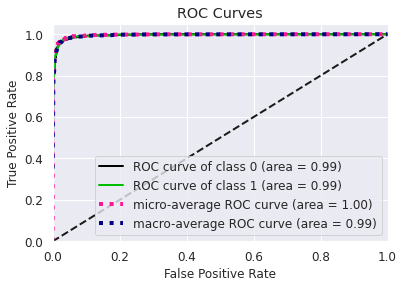

In [ ]:
plot_roc(y_test, y_score)
plt.show()

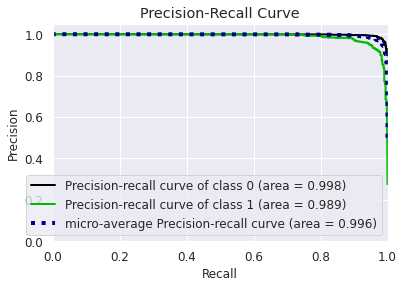

In [ ]:
plot_precision_recall(y_test, y_score)
plt.show()

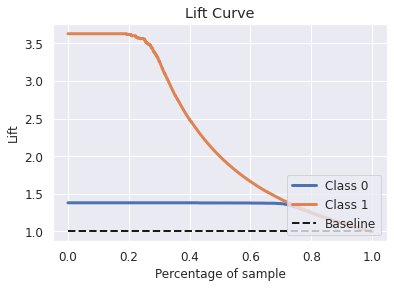

In [ ]:
plot_lift_curve(y_test, y_score)
plt.show()

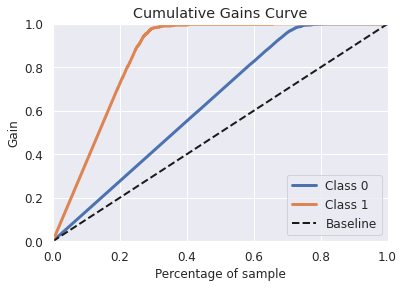

In [ ]:
plot_cumulative_gain(y_test, y_score)
plt.show()

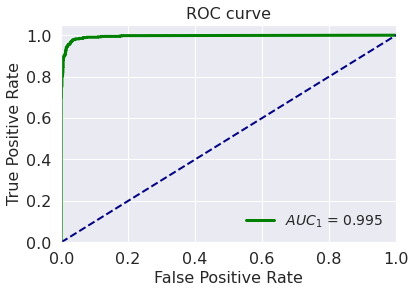

In [ ]:
fpr, tpr, thr = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

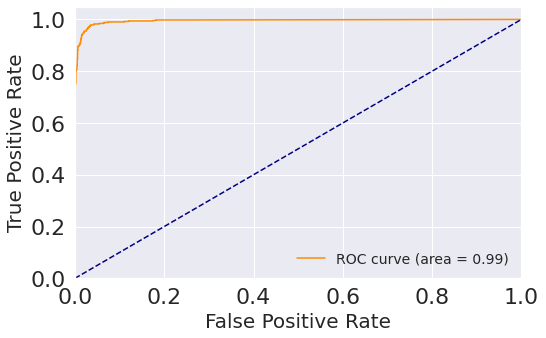

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc), color='darkorange')
    
plt.plot([0, 1], [0, 1], 'k--',color='navy')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20) 
plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()

#### KNN con altro approccio

Voglio provare altro approccio e valutare i risultati

Con questo approccio faccio direttamente grid search, poi in uno uso (weights = 'distance') e in altro (weights = 'uniform') simile a prima sempre, ma con ottica diversa di come scelgo il K .

In [ ]:
k_range = list(range(1, int(math.sqrt(len(df)) + 1)))

param_grid = dict(n_neighbors=k_range)

knn = KNeighborsClassifier(weights = 'distance')

grid_distance = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid_distance.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='distance'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
k_range = list(range(1, int(math.sqrt(len(df)) + 1)))

param_grid = dict(n_neighbors=k_range)

knn = KNeighborsClassifier(weights = 'uniform')

grid_uniform = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid_uniform.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

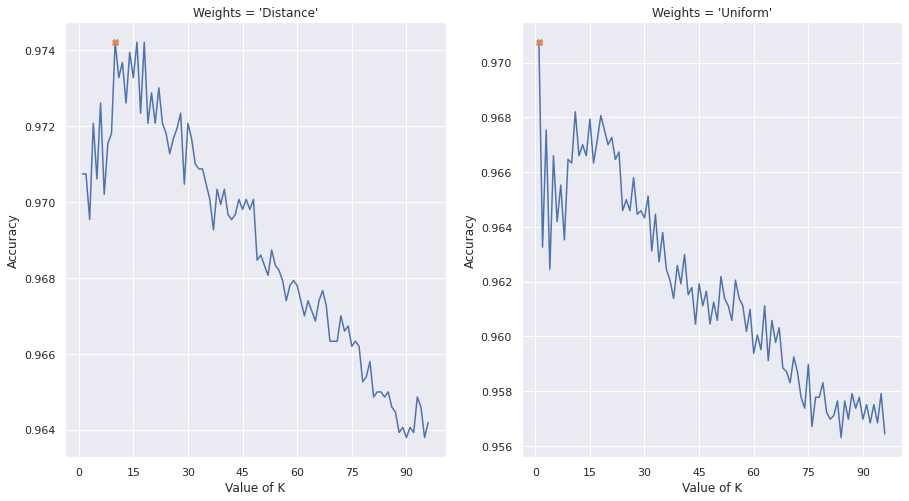

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,8))

ax1.plot(k_range, grid_distance.cv_results_['mean_test_score'])
ax1.set_title('Weights = \'Distance\'')
ax1.plot(grid_distance.best_params_['n_neighbors'], grid_distance.best_score_, marker = 'X')
ax1.xaxis.set_major_locator(plt.MaxNLocator(10))

ax2.plot(k_range, grid_uniform.cv_results_['mean_test_score'])
ax2.set_title('Weights = \'Uniform\'')
ax2.plot(grid_uniform.best_params_['n_neighbors'], grid_uniform.best_score_,  marker = 'X')
ax2.xaxis.set_major_locator(plt.MaxNLocator(10))

for ax in (ax1,ax2):
    ax.set(xlabel='Value of K', ylabel='Accuracy')

In [ ]:
print(grid_distance.best_score_), print(grid_distance.best_params_), print(grid_distance.best_estimator_)

0.9742151746000015
{'n_neighbors': 10}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='distance')


(None, None, None)

In questo caso vedo che il migliore è il KNN con neighborns = 8 weights=distance , valutato in termini di accurancy

In [ ]:
print(grid_uniform.best_score_), print(grid_uniform.best_params_)


0.9707437010488137
{'n_neighbors': 1}


(None, None)

però allora non capisco perchè qua poi mi dice che il migliore è quello con neighbors uguale a 1 , di solito ho visto alcuni online che dicevano "siccome le perfomance sono molto simili si usa quello + semplice (con k minore)" , può darsi che lo scelga cosi anche questa funzione? maybe

In [ ]:
knn = grid_uniform.best_estimator_
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
y_pred = knn.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9791666666666666
F1-score [0.98560354 0.96231884]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1356
           1       0.96      0.97      0.96       516

    accuracy                           0.98      1872
   macro avg       0.97      0.97      0.97      1872
weighted avg       0.98      0.98      0.98      1872



In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.9748147767030254


NON MALE , MA COME IL MIO, QUA FORSE + CONDENSATO, DECIDI QUALE USARE MA POI SE USI QUESTO FACCI EVALUATION CON I GRAFICI CHE HAI SOPRA

### **Naive Bayes**

In [ ]:
dff.head()

CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  ...  Hour  Month  Weekday  Weekend
0     2.6       1360.0      11.9         1046.0  ...    18      3        2        0
1     2.0       1292.0       9.4          955.0  ...    19      3        2        0
2     2.2       1402.0       9.0          939.0  ...    20      3        2        0
3     2.2       1376.0       9.2          948.0  ...    21      3        2        0
4     1.6       1272.0       6.5          836.0  ...    22      3        2        0

[5 rows x 16 columns]

nel nostro caso il dataset è costituito solo da attributi numerici, perchè io ho convertito cosi anche i valori riguardanti data e ora, però in realtà day , hour , weekday , month non lo sarebbero, quindi divido NB in due.
Un apprriocco con solo i valori numeri (i gas + T e le umidità) e un approccio che considera i valori categorici.

#### NB con attributi numerici

In [ ]:
dfnum = dataframe[["CO(GT)", "PT08.S1(CO)", "C6H6(GT)",	"PT08.S2(NMHC)", "NOx(GT)",	"PT08.S3(NOx)",	"NO2(GT)",	"PT08.S4(NO2)",	"PT08.S5(O3)","T"	,"RH"	,"AH","Weekend"	]]

In [ ]:
dfnum.head()

CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  ...     T    RH      AH  Weekend
0     2.6       1360.0      11.9         1046.0  ...  13.6  48.9  0.7578        0
1     2.0       1292.0       9.4          955.0  ...  13.3  47.7  0.7255        0
2     2.2       1402.0       9.0          939.0  ...  11.9  54.0  0.7502        0
3     2.2       1376.0       9.2          948.0  ...  11.0  60.0  0.7867        0
4     1.6       1272.0       6.5          836.0  ...  11.2  59.6  0.7888        0

[5 rows x 13 columns]

In [ ]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(dfnum.drop('Weekend',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
scaled_features = scaler.transform(dfnum.drop('Weekend',axis=1))

In [ ]:
dfnum_feat = pd.DataFrame(scaled_features,columns=dfnum.columns[:-1])
dfnum_feat.head()

CO(GT)  PT08.S1(CO)  C6H6(GT)  ...         T        RH        AH
0  0.339856     1.222702  0.248813  ... -0.544962 -0.019689 -0.676404
1 -0.116071     0.903123 -0.093547  ... -0.579615 -0.090386 -0.758008
2  0.035905     1.420088 -0.148325  ... -0.741330  0.280772 -0.695605
3  0.035905     1.297897 -0.120936  ... -0.845290  0.634256 -0.603390
4 -0.420023     0.809130 -0.490684  ... -0.822188  0.610691 -0.598084

[5 rows x 12 columns]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,dfnum['Weekend'],test_size=0.20)

In [ ]:
X_train[0]

array([ 0.11189262, -0.10260897,  0.55008924,  0.69527519, -0.50614523,
       -0.06949339,  0.13453863,  1.03060556, -0.15337286,  2.03093591,
       -1.6751725 ,  0.4668092 ])

In [ ]:
nb_num = GaussianNB()
nb_num.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
nb_num.sigma_, nb_num.theta_


(array([[1.14668498, 1.07239202, 1.17234267, 1.133252  , 1.13511998,
         1.062973  , 1.05017969, 1.11103657, 1.03722833, 1.01432042,
         0.98698033, 1.01205838],
        [0.52520242, 0.78557935, 0.37280202, 0.50464485, 0.60019005,
         0.80235173, 0.81805893, 0.65689131, 0.77129273, 0.96399953,
         0.99380199, 0.98126648]]),
 array([[ 0.12916014,  0.09211371,  0.15675273,  0.14743484,  0.0911569 ,
         -0.08249892,  0.1039851 ,  0.12601813,  0.13311264,  0.01663501,
         -0.0013498 ,  0.02300703],
        [-0.3230974 , -0.21464137, -0.3802249 , -0.35859546, -0.2244228 ,
          0.21185122, -0.25063306, -0.30209636, -0.31034761, -0.05983075,
          0.01152554, -0.06220782]]))

In [ ]:
y_pred_num = nb_num.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred_num))
print('F1-score %s' % f1_score(y_test, y_pred_num, average=None))
print(classification_report(y_test, y_pred_num))

Accuracy 0.5389957264957265
F1-score [0.5832931  0.48416019]
              precision    recall  f1-score   support

           0       0.82      0.45      0.58      1338
           1       0.36      0.76      0.48       534

    accuracy                           0.54      1872
   macro avg       0.59      0.60      0.53      1872
weighted avg       0.69      0.54      0.56      1872



In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_num)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.6049234980937506


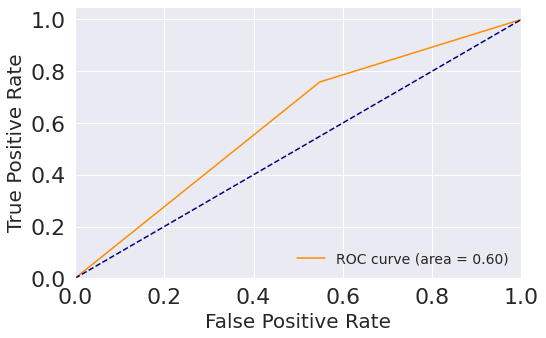

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc), color='darkorange')
    
plt.plot([0, 1], [0, 1], 'k--',color='navy')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20) 
plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()

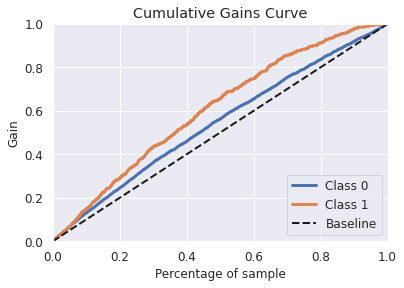

In [ ]:
import scikitplot as skplt

# Deriving Class probabilities
predicted_probabilities = nb_num.predict_proba(X_test)

# Creating the plot
skplt.metrics.plot_cumulative_gain(y_test, predicted_probabilities)

#### NB con attributi categorici

In [ ]:
dff.head()

CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  ...  Hour  Month  Weekday  Weekend
0     2.6       1360.0      11.9         1046.0  ...    18      3        2        0
1     2.0       1292.0       9.4          955.0  ...    19      3        2        0
2     2.2       1402.0       9.0          939.0  ...    20      3        2        0
3     2.2       1376.0       9.2          948.0  ...    21      3        2        0
4     1.6       1272.0       6.5          836.0  ...    22      3        2        0

[5 rows x 16 columns]

In [ ]:
dfcat = dataframe[["Hour", "Month", "Weekday","Weekend"	]]

In [ ]:
dfcat.head()

Hour  Month  Weekday  Weekend
0    18      3        2        0
1    19      3        2        0
2    20      3        2        0
3    21      3        2        0
4    22      3        2        0

In [ ]:
x = dfcat.iloc[:, :-1].values
y = dfcat.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [ ]:
x_train

array([[18, 10,  0],
       [ 6, 10,  2],
       [20, 12,  3],
       ...,
       [11,  4,  5],
       [ 2, 10,  2],
       [13,  3,  5]])

In [ ]:
y_train

array([0, 0, 0, ..., 1, 0, 1])

In [ ]:
nb_cat = CategoricalNB()
nb_cat.fit(x_train, y_train)

CategoricalNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
nb_cat.feature_log_prob_


[array([[-3.14621163, -3.15494531, -3.18161355, -3.17264488, -3.17711916,
         -3.16819053, -3.19066339, -3.17711916, -3.15494531, -3.14187322,
         -3.20439358, -3.16819053, -3.16819053, -3.22770466, -3.20901253,
         -3.22299877, -3.16819053, -3.21365291, -3.14621163, -3.24195668,
         -3.16819053, -3.20901253, -3.13755356, -3.13325248],
        [-3.15722918, -3.27098806, -3.14653389, -3.14653389, -3.2011923 ,
         -3.15722918, -3.24717741, -3.15722918, -3.24717741, -3.11511769,
         -3.21249185, -3.12548048, -3.22392055, -3.24717741, -3.15722918,
         -3.12548048, -3.17896916, -3.17896916, -3.07470815, -3.15722918,
         -3.2011923 , -3.2011923 , -3.21249185, -3.15722918]]),
 array([[-8.58223159, -2.58827016, -2.64469538, -1.99330511, -2.46413439,
         -2.54675016, -2.55395307, -2.49545686, -2.55154633, -2.54197688,
         -2.57834452, -2.54675016, -2.49092171],
        [-7.68478394, -2.40158021, -2.64783134, -2.04287687, -2.46442812,
         -2

In [ ]:

y_pred_cat = nb_cat.predict(x_train)
print('Accuracy %s' % accuracy_score(y_train, y_pred_cat))

Accuracy 1.0


In [ ]:
y_pred_cat = nb_cat.predict(x_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred_cat))
print('F1-score %s' % f1_score(y_test, y_pred_cat, average=None))
print(classification_report(y_test, y_pred_cat))


Accuracy 1.0
F1-score [1. 1.]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1346
           1       1.00      1.00      1.00       526

    accuracy                           1.00      1872
   macro avg       1.00      1.00      1.00      1872
weighted avg       1.00      1.00      1.00      1872



In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_cat)
roc_auc = auc(fpr, tpr)
print(roc_auc)

1.0


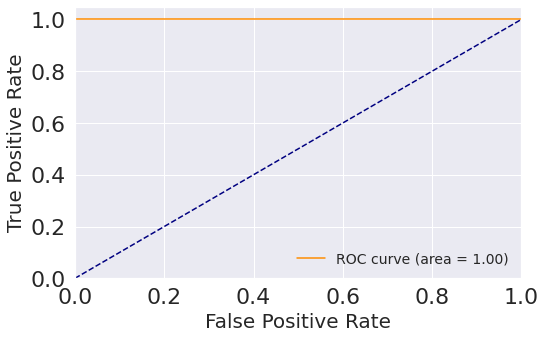

In [ ]:

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc), color='darkorange')
    
plt.plot([0, 1], [0, 1], 'k--',color='navy')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20) 
plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()

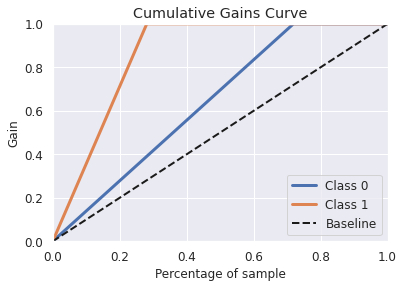

In [ ]:
import scikitplot as skplt

# Deriving Class probabilities
predicted_probabilities = nb_cat.predict_proba(x_test)

# Creating the plot
skplt.metrics.plot_cumulative_gain(y_test, predicted_probabilities)

NON HA MOLTO SENSO , PERCHè HA DENTRO WEEKDAY E MI TIRA FUORI IL MASSIMO DI ACCURANCY, NON SO SE TENERLO, DIREI DI USARE SOLO NB CON GAS E T E UMIDITà

### Decision Tree

#### Approccio con Weekday

In [ ]:
dff.head()

CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  ...  Hour  Month  Weekday  Weekend
0     2.6       1360.0      11.9         1046.0  ...    18      3        2        0
1     2.0       1292.0       9.4          955.0  ...    19      3        2        0
2     2.2       1402.0       9.0          939.0  ...    20      3        2        0
3     2.2       1376.0       9.2          948.0  ...    21      3        2        0
4     1.6       1272.0       6.5          836.0  ...    22      3        2        0

[5 rows x 16 columns]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = dff.drop('Weekend',axis=1)
y = dff['Weekend']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from IPython.display import Image

In [ ]:
param_list = {
    'max_depth': [1,2,3,4,5,6,7,8,9],
    'min_samples_split': [2,5,10,20,50,100,150,200],
    'min_samples_leaf': [10,50,100,150,200],
    'criterion': ['gini', 'entropy']
}

dec_tree = DecisionTreeClassifier(class_weight='balanced')

grid = GridSearchCV(dec_tree,param_grid=param_list, scoring = 'accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid

In [ ]:
dec_tree = grid.best_estimator_
dec_tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred = dec_tree.predict(X_train)
print('Accuracy %s' % accuracy_score(y_train, y_pred))

Accuracy 1.0


In [ ]:
attributes=["CO(GT)",	"PT08.S1(CO)",	"C6H6(GT)",	"PT08.S2(NMHC)",	"NOx(GT)",	"PT08.S3(NOx)",	"NO2(GT)",	"PT08.S4(NO2)","PT08.S5(O3)",	"T"	,"RH",	"AH",	"Hour",	"Month","Weekday"] 

In [ ]:
for col, imp in zip(attributes, dec_tree.feature_importances_):
    print(col, imp)

CO(GT) 0.0
PT08.S1(CO) 0.0
C6H6(GT) 0.0
PT08.S2(NMHC) 0.0
NOx(GT) 0.0
PT08.S3(NOx) 0.0
NO2(GT) 0.0
PT08.S4(NO2) 0.0
PT08.S5(O3) 0.0
T 0.0
RH 0.0
AH 0.0
Hour 0.0
Month 0.0
Weekday 1.0


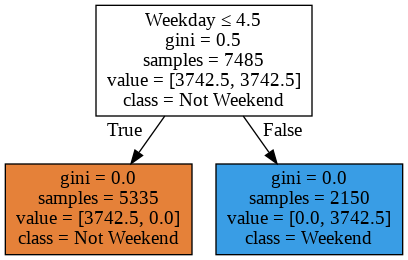

In [ ]:
dot_data = export_graphviz(dec_tree, out_file=None, 
                                feature_names=attributes,
                                class_names=['Weekend' if x == 1 else 'Not Weekend' for x in dec_tree.classes_],  
                                filled=True, rounded=False,  
                                special_characters=True,
                               max_depth=3)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [ ]:
y_pred = dec_tree.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 1.0
F1-score [1. 1.]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1334
           1       1.00      1.00      1.00       538

    accuracy                           1.00      1872
   macro avg       1.00      1.00      1.00      1872
weighted avg       1.00      1.00      1.00      1872



In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(roc_auc)

1.0


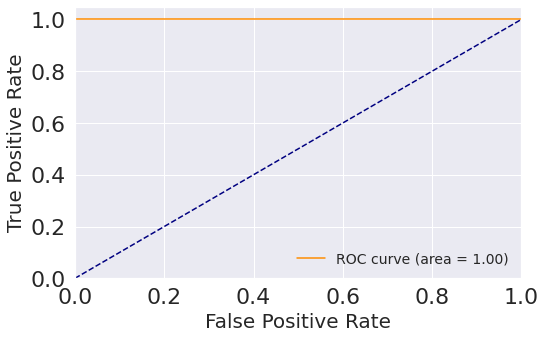

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc), color='darkorange')
    
plt.plot([0, 1], [0, 1], 'k--',color='navy')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20) 
plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()


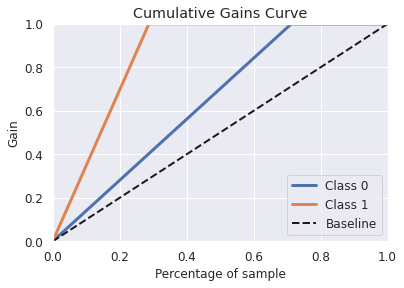

In [ ]:
import scikitplot as skplt
# Deriving Class probabilities
predicted_probabilities = dec_tree.predict_proba(X_test)
# Creating the plot
skplt.metrics.plot_cumulative_gain(y_test, predicted_probabilities)

#### Approccio senza Weekday

In [ ]:
dff.head()

CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  ...  Hour  Month  Weekday  Weekend
0     2.6       1360.0      11.9         1046.0  ...    18      3        2        0
1     2.0       1292.0       9.4          955.0  ...    19      3        2        0
2     2.2       1402.0       9.0          939.0  ...    20      3        2        0
3     2.2       1376.0       9.2          948.0  ...    21      3        2        0
4     1.6       1272.0       6.5          836.0  ...    22      3        2        0

[5 rows x 16 columns]

In [ ]:
dfdt = dataframe[["CO(GT)",	"PT08.S1(CO)",	"C6H6(GT)",	"PT08.S2(NMHC)",	"NOx(GT)",	"PT08.S3(NOx)",	"NO2(GT)",	"PT08.S4(NO2)","PT08.S5(O3)",	"T"	,"RH",	"AH",	"Hour",	"Month" , "Weekend"]]

In [ ]:
dfdt.head()

CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  ...      AH  Hour  Month  Weekend
0     2.6       1360.0      11.9         1046.0  ...  0.7578    18      3        0
1     2.0       1292.0       9.4          955.0  ...  0.7255    19      3        0
2     2.2       1402.0       9.0          939.0  ...  0.7502    20      3        0
3     2.2       1376.0       9.2          948.0  ...  0.7867    21      3        0
4     1.6       1272.0       6.5          836.0  ...  0.7888    22      3        0

[5 rows x 15 columns]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = dfdt.drop('Weekend',axis=1)
y = dfdt['Weekend']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from IPython.display import Image

In [ ]:
param_list = {
    'max_depth': [1,2,3,4,5,6,7,8,9],
    'min_samples_split': [2,5,10,20,50,100,150,200],
    'min_samples_leaf': [10,50,100,150,200],
    'criterion': ['gini', 'entropy']
}

dec_tree = DecisionTreeClassifier(class_weight='balanced')

grid = GridSearchCV(dec_tree,param_grid=param_list, scoring = 'accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid

In [ ]:
dec_tree = grid.best_estimator_
dec_tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred = dec_tree.predict(X_train)
print('Accuracy %s' % accuracy_score(y_train, y_pred))

Accuracy 0.7449565798263194


In [ ]:
attributes=["CO(GT)",	"PT08.S1(CO)",	"C6H6(GT)",	"PT08.S2(NMHC)",	"NOx(GT)",	"PT08.S3(NOx)",	"NO2(GT)",	"PT08.S4(NO2)","PT08.S5(O3)",	"T"	,"RH",	"AH",	"Hour",	"Month"] 

In [ ]:
for col, imp in zip(attributes, dec_tree.feature_importances_):
    print(col, imp)

CO(GT) 0.08763934457436295
PT08.S1(CO) 0.11263000281480796
C6H6(GT) 0.04591727713830349
PT08.S2(NMHC) 0.2686662758307064
NOx(GT) 0.02725751045224518
PT08.S3(NOx) 0.025375770546838643
NO2(GT) 0.02702873358143003
PT08.S4(NO2) 0.05226087774017135
PT08.S5(O3) 0.03578295132309529
T 0.03420433072507372
RH 0.04331151827501272
AH 0.08744674372953919
Hour 0.10179579046000475
Month 0.05068287280840837


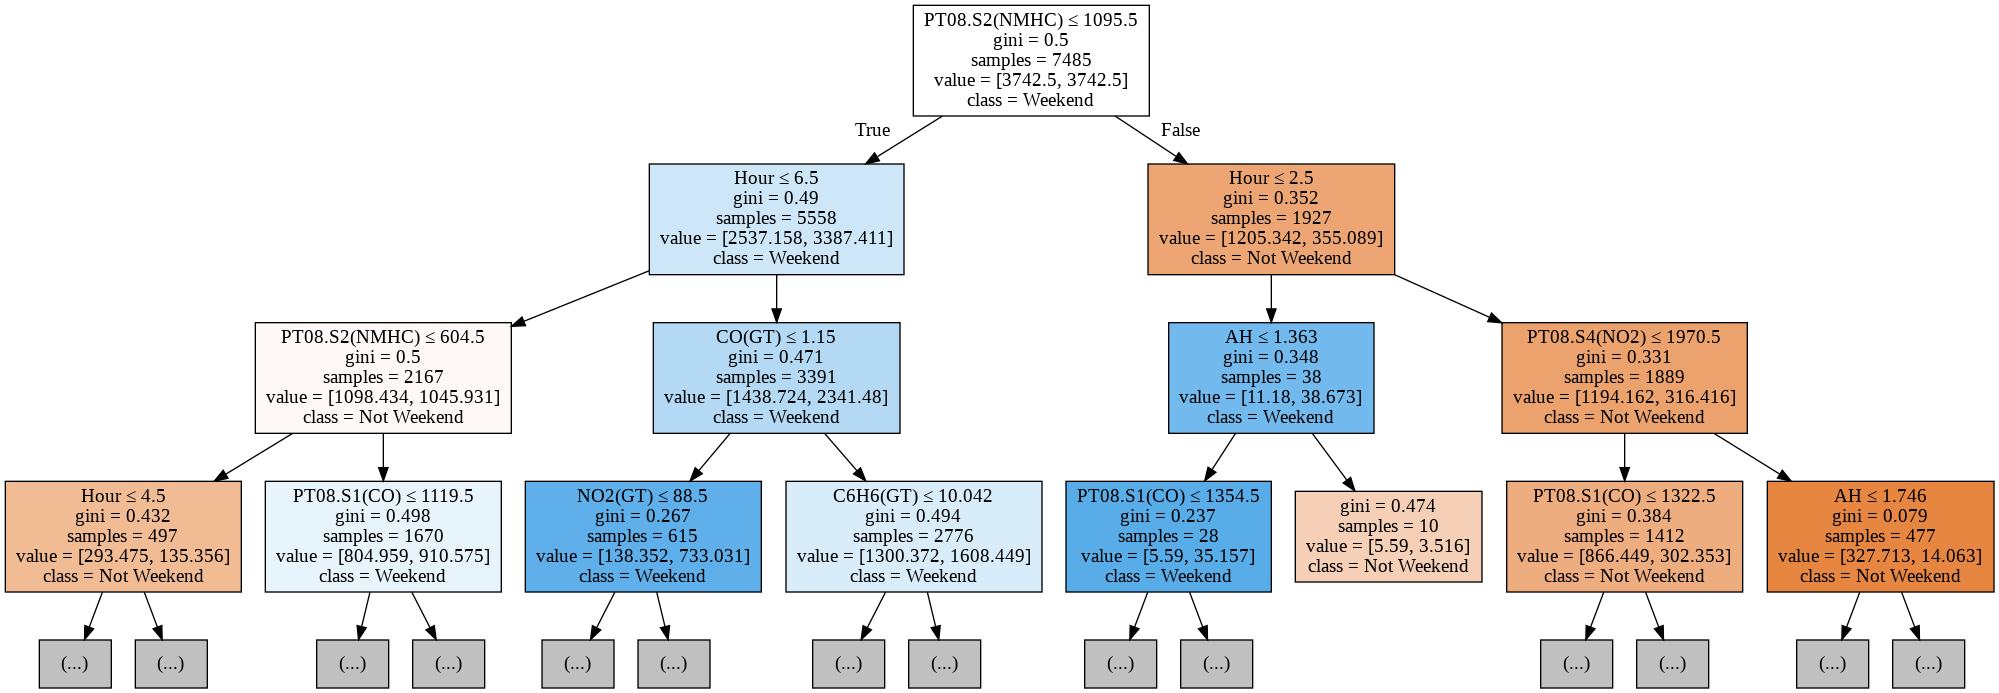

In [ ]:
dot_data = export_graphviz(dec_tree, out_file=None, 
                                feature_names=attributes,
                                class_names=['Weekend' if x == 1 else 'Not Weekend' for x in dec_tree.classes_],  
                                filled=True, rounded=False,  
                                special_characters=True,
                               max_depth=3)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [ ]:
y_pred = dec_tree.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.6826923076923077
F1-score [0.74571918 0.578125  ]
              precision    recall  f1-score   support

           0       0.85      0.66      0.75      1313
           1       0.48      0.73      0.58       559

    accuracy                           0.68      1872
   macro avg       0.67      0.70      0.66      1872
weighted avg       0.74      0.68      0.70      1872



In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.6957261021272072


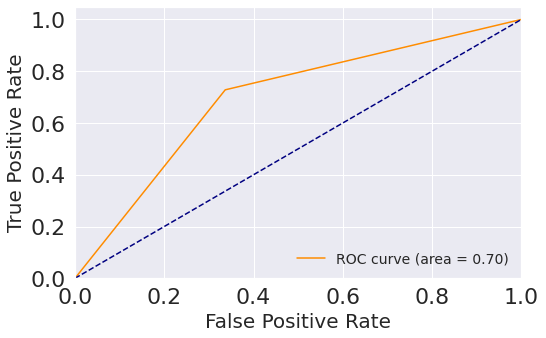

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc), color='darkorange')
    
plt.plot([0, 1], [0, 1], 'k--',color='navy')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20) 
plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()

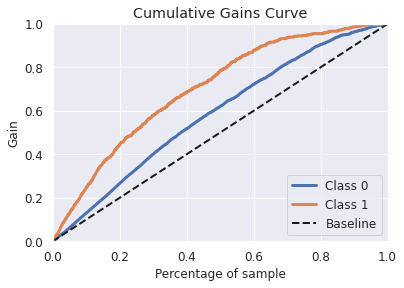

In [ ]:
import scikitplot as skplt
# Deriving Class probabilities
predicted_probabilities = dec_tree.predict_proba(X_test)
# Creating the plot
skplt.metrics.plot_cumulative_gain(y_test, predicted_probabilities)

### Logistic Regression

#### Con Weekday

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV

In [ ]:
dff.head()

CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  ...  Hour  Month  Weekday  Weekend
0     2.6       1360.0      11.9         1046.0  ...    18      3        2        0
1     2.0       1292.0       9.4          955.0  ...    19      3        2        0
2     2.2       1402.0       9.0          939.0  ...    20      3        2        0
3     2.2       1376.0       9.2          948.0  ...    21      3        2        0
4     1.6       1272.0       6.5          836.0  ...    22      3        2        0

[5 rows x 16 columns]

In [ ]:
X = dff.drop('Weekend',axis=1)
y = dff['Weekend']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

Stima dei parametri logistic regression con approccio CV con algoritmo LogisticRegressionCV,  implementa logistic regression con la Cross Validation

In [ ]:
scaler = StandardScaler()
X_train_log = scaler.fit_transform(X_train)
X_test_log = scaler.fit_transform (X_test)

In [ ]:
logistic = LogisticRegressionCV(cv=10, verbose = 0, scoring = 'accuracy')
logistic.fit(X_train_log, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=10, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True,
                     scoring='accuracy', solver='lbfgs', tol=0.0001, verbose=0)

In [ ]:
logistic.coef_, logistic.intercept_

(array([[-0.28232725,  0.48730182, -0.51477988, -0.1471753 ,  0.17750111,
         -0.10362635, -0.27538646, -0.10622263,  0.03120316,  0.01834796,
         -0.11367695, -0.07052832,  0.12806083,  0.0289835 ,  5.57995056]]),
 array([-4.23218792]))

In [ ]:
from scipy.special import expit


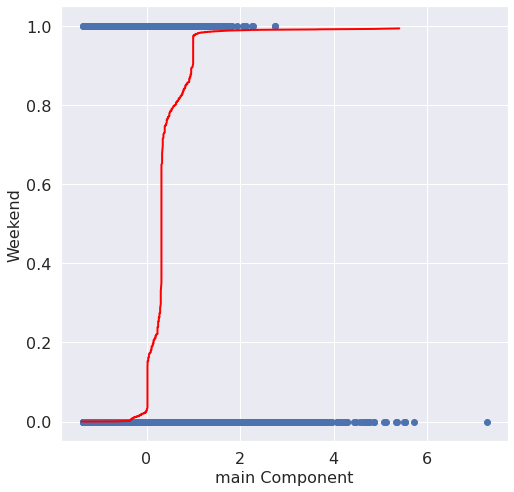

In [ ]:
loss = expit(sorted(np.dot(X_test_log, np.transpose(logistic.coef_))) + logistic.intercept_).ravel()
plt.figure(figsize=(8,8))
plt.plot(sorted(X_test_log[:,2]), loss, color='red', linewidth=2)
plt.scatter(X_train_log[:,2], y_train)
plt.xlabel('main Component', fontsize=16)
plt.ylabel('Weekend', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [ ]:
y_pred = logistic.predict(X_train_log)
print('Accuracy %s' % accuracy_score(y_train, y_pred))

Accuracy 1.0


In [ ]:
y_pred = logistic.predict(X_test_log)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 1.0
F1-score [1. 1.]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1323
           1       1.00      1.00      1.00       549

    accuracy                           1.00      1872
   macro avg       1.00      1.00      1.00      1872
weighted avg       1.00      1.00      1.00      1872



In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(roc_auc)

1.0


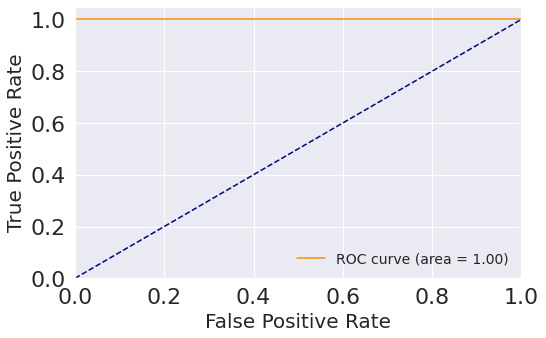

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc), color='darkorange')
    
plt.plot([0, 1], [0, 1], 'k--',color='navy')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20) 
plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()

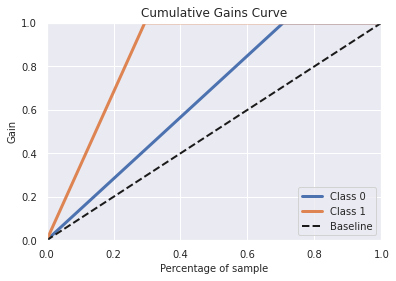

In [ ]:
import scikitplot as skplt
# Deriving Class probabilities
predicted_probabilities = logistic.predict_proba(X_test_log)
# Creating the plot
skplt.metrics.plot_cumulative_gain(y_test,predicted_probabilities)

#### Senza Weekday

In [ ]:
dfdt = dataframe[["CO(GT)",	"PT08.S1(CO)",	"C6H6(GT)",	"PT08.S2(NMHC)",	"NOx(GT)",	"PT08.S3(NOx)",	"NO2(GT)",	"PT08.S4(NO2)","PT08.S5(O3)",	"T"	,"RH",	"AH",	"Hour",	"Month" , "Weekend"]]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = dfdt.drop('Weekend',axis=1)
y = dfdt['Weekend']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

Stima dei parametri logistic regression con approccio CV con algoritmo LogisticRegressionCV,  implementa logistic regression con la Cross Validation

In [ ]:
scaler = StandardScaler()
X_train_log = scaler.fit_transform(X_train)
X_test_log = scaler.fit_transform (X_test)

In [ ]:
logistic = LogisticRegressionCV(cv=10, verbose = 0, scoring = 'accuracy')
logistic.fit(X_train_log, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=10, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True,
                     scoring='accuracy', solver='lbfgs', tol=0.0001, verbose=0)

In [ ]:
logistic.coef_, logistic.intercept_

(array([[-0.20166886,  1.89016258, -4.91398434,  2.44555122,  0.57646643,
         -0.02642012, -0.65345881, -0.14494534, -0.35811182, -0.13267549,
         -0.45243861,  0.0305668 ,  0.14463528,  0.1974265 ]]),
 array([-1.32052065]))

In [ ]:
from scipy.special import expit


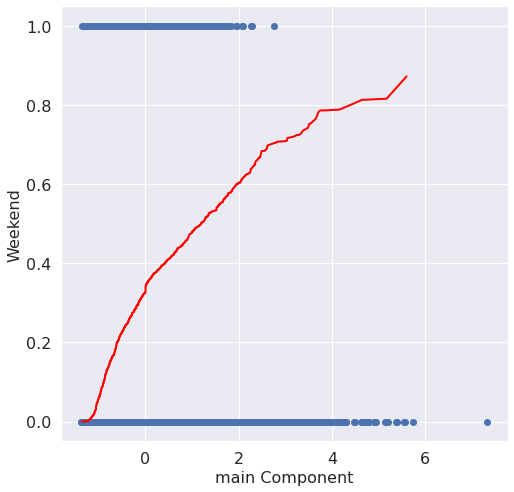

In [ ]:
loss = expit(sorted(np.dot(X_test_log, np.transpose(logistic.coef_))) + logistic.intercept_).ravel()
plt.figure(figsize=(8,8))
plt.plot(sorted(X_test_log[:,2]), loss, color='red', linewidth=2)
plt.scatter(X_train_log[:,2], y_train)
plt.xlabel('main Component', fontsize=16)
plt.ylabel('Weekend', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [ ]:
y_pred = logistic.predict(X_train_log)
print('Accuracy %s' % accuracy_score(y_train, y_pred))

Accuracy 0.7458917835671343


In [ ]:
y_pred = logistic.predict(X_test_log)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7345085470085471
F1-score [0.83203785 0.36687898]
              precision    recall  f1-score   support

           0       0.75      0.93      0.83      1325
           1       0.61      0.26      0.37       547

    accuracy                           0.73      1872
   macro avg       0.68      0.60      0.60      1872
weighted avg       0.71      0.73      0.70      1872



In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.596155358559553


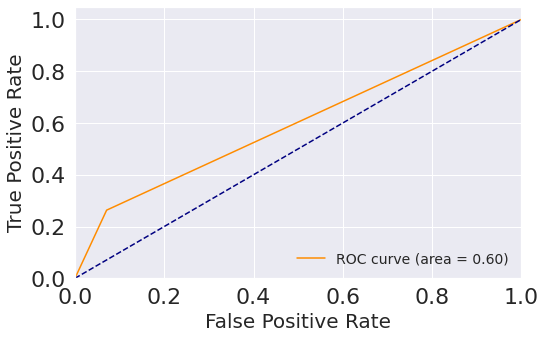

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc), color='darkorange')
    
plt.plot([0, 1], [0, 1], 'k--',color='navy')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20) 
plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()

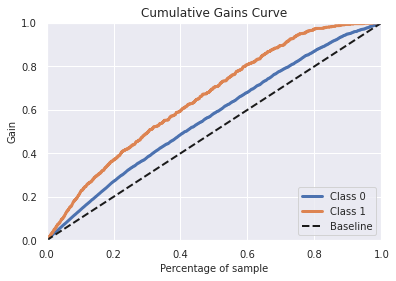

In [ ]:
import scikitplot as skplt
# Deriving Class probabilities
predicted_probabilities = logistic.predict_proba(X_test_log)
# Creating the plot
skplt.metrics.plot_cumulative_gain(y_test,predicted_probabilities)

## **1.4 Dimensionality Reduction**

**Try to reduce the dimensionality of the dataset using the methods studied (or new ones). Test PCA and try to solve the classification task in two dimensions. Plot the dataset in the two new dimensions and observe the decision boundary and the one of the trained algorithms.**

Quello che vogliamo fare è diminuire la dimensionalità del dataset e considerando i classificatori usati prima vedere se alcuni di essi migliorano.
Per ridurre dim 2 approcci:
- Feature Selection :
Variance thereshold e  univariate feature selection con SelectKBest e ANOVA test 
- Feature Projection:
PCA

### **Variance Threshold**

In [ ]:
from sklearn.feature_selection import VarianceThreshold


#### **KNN**

Settiamo la soglia per esempio a 0.5:

In [ ]:
sel = VarianceThreshold(threshold = 0.5)
X_train_sel = sel.fit_transform(X_train)

X_train.shape, X_train_sel.shape

((7485, 14), (7485, 13))

Come si può vedere la dimensione degli attributi è passata da 15 a 14, che effetto ha:

In [ ]:
X_test_sel = sel.transform(X_test)

clf = KNeighborsClassifier(leaf_size=30, n_neighbors=1)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print(classification_report(y_test, y_pred))

X_test_sel.shape

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1325
           1       0.63      0.62      0.62       547

    accuracy                           0.78      1872
   macro avg       0.74      0.73      0.74      1872
weighted avg       0.78      0.78      0.78      1872



(1872, 13)

Con un attributo in meno le perfomance sono nettamente calate

#### **Naive Bayes**

##### NB numerici

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,dfnum['Weekend'],test_size=0.20)

In [ ]:
sel = VarianceThreshold(threshold = 0.5)
X_train_sel = sel.fit_transform(X_train)

X_train.shape, X_train_sel.shape

((7485, 12), (7485, 12))

In [ ]:
X_test_sel = sel.transform(X_test)

clf = GaussianNB()
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print(classification_report(y_test, y_pred))

X_test_sel.shape

              precision    recall  f1-score   support

           0       0.86      0.44      0.58      1353
           1       0.36      0.82      0.50       519

    accuracy                           0.54      1872
   macro avg       0.61      0.63      0.54      1872
weighted avg       0.72      0.54      0.56      1872



(1872, 12)

Grosso modo fa schifo come prima, perchè con la soglia a 0.5 non ha diminuito il numero di attributi.

##### NB Categorici

In [ ]:
x = dfcat.iloc[:, :-1].values
y = dfcat.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [ ]:
sel = VarianceThreshold(threshold = 0.5)
X_train_sel = sel.fit_transform(x_train)

x_train.shape, X_train_sel.shape

((7485, 3), (7485, 3))

In [ ]:
X_test_sel = sel.transform(x_test)

clf = CategoricalNB()
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print(classification_report(y_test, y_pred))

X_test_sel.shape

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1346
           1       1.00      1.00      1.00       526

    accuracy                           1.00      1872
   macro avg       1.00      1.00      1.00      1872
weighted avg       1.00      1.00      1.00      1872



(1872, 3)

Questo sempre perfetto rimane, perchè c'è weekday

#### **Decision Tree**

##### Con Weekday

In [ ]:
X = dff.drop('Weekend',axis=1)
y = dff['Weekend']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
sel = VarianceThreshold(threshold = 0.5)
X_train_sel = sel.fit_transform(X_train)

X_train.shape, X_train_sel.shape

((7485, 15), (7485, 14))

con la soglia a 0.5 ho eliminato un attributo, vediamo che effetto ha:


In [ ]:
X_test_sel = sel.transform(X_test)

clf = DecisionTreeClassifier(class_weight='balanced',
                       criterion='entropy', max_depth=4, min_samples_leaf=50)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print(classification_report(y_test, y_pred))

X_test_sel.shape

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1336
           1       1.00      1.00      1.00       536

    accuracy                           1.00      1872
   macro avg       1.00      1.00      1.00      1872
weighted avg       1.00      1.00      1.00      1872



(1872, 14)

Come l'altro con tutti attributi va troppo bene

##### Senza Weekday

In [ ]:
X = dfdt.drop('Weekend',axis=1)
y = dfdt['Weekend']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
sel = VarianceThreshold(threshold = 0.5)
X_train_sel = sel.fit_transform(X_train)

X_train.shape, X_train_sel.shape

((7485, 14), (7485, 13))

In [ ]:
X_test_sel = sel.transform(X_test)

clf = DecisionTreeClassifier(class_weight='balanced',
                       criterion='entropy', max_depth=4, min_samples_leaf=50)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print(classification_report(y_test, y_pred))

X_test_sel.shape

              precision    recall  f1-score   support

           0       0.88      0.57      0.69      1368
           1       0.40      0.78      0.53       504

    accuracy                           0.63      1872
   macro avg       0.64      0.68      0.61      1872
weighted avg       0.75      0.63      0.65      1872



(1872, 13)

è peggiorato un poco rispetto a quello con 14 attributi 

#### **Logistic Regression**

In [ ]:
X = dff.drop('Weekend',axis=1)
y = dff['Weekend']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
sel = VarianceThreshold(threshold = 0.5)
X_train_sel = sel.fit_transform(X_train)

X_train.shape, X_train_sel.shape

((7485, 15), (7485, 14))

In [ ]:
X_test_sel = sel.transform(X_test)

clf = LogisticRegressionCV(cv=10, verbose = 0, scoring = 'accuracy')
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print(classification_report(y_test, y_pred))

X_test_sel.shape

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1317
           1       1.00      1.00      1.00       555

    accuracy                           1.00      1872
   macro avg       1.00      1.00      1.00      1872
weighted avg       1.00      1.00      1.00      1872



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


(1872, 14)

Ottimo risultato come nel caso in cui il dataset era completo di tutti attributi.

### **Univariate Feature Selection**

Qua ora , per ogni classificatore, vado a cercare quale è il miglior numero di feature da selezionare, avrò range diversi a seconda se considero Weekday o meno oppure se considero solo categorici o numerici

#### **KNN**

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(dff.drop('Weekend',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
scaled_features = scaler.transform(dff.drop('Weekend',axis=1))

In [ ]:
dff_feat = pd.DataFrame(scaled_features,columns=dff.columns[:-1])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,dff['Weekend'],test_size=0.20)

Prendiamo un range di K da testare:

In [ ]:
k = [10,9,8,7,6,5,4,3,2,1]


In [ ]:
from sklearn.feature_selection import SelectKBest


In [ ]:
for x in k:
  sel = SelectKBest(k = x)
  X_train_sel = sel.fit_transform(X_train, y_train)
  X_test_sel = sel.transform(X_test)

  clf = KNeighborsClassifier(leaf_size=30, n_neighbors=1)
  clf.fit(X_train_sel, y_train)

  y_pred = clf.predict(X_test_sel)
  print (X_train_sel.shape), print(sel.get_support(indices = True)), print(classification_report(y_test, y_pred))

(7485, 10)
[ 0  1  2  3  4  5  6  7  8 14]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1334
           1       0.99      0.99      0.99       538

    accuracy                           0.99      1872
   macro avg       0.99      0.99      0.99      1872
weighted avg       0.99      0.99      0.99      1872

(7485, 9)
[ 0  1  2  3  4  6  7  8 14]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1334
           1       0.99      0.99      0.99       538

    accuracy                           1.00      1872
   macro avg       1.00      1.00      1.00      1872
weighted avg       1.00      1.00      1.00      1872

(7485, 8)
[ 0  2  3  4  6  7  8 14]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1334
           1       1.00      0.99      0.99       538

    accuracy                           1.00      1872
   macro a

Grazie , ovviamnete mi mantiene la variabile Weekday che è fondamentale per capire se è weekend o meno

**Proviamo stessa cosa ma senza Weekday:**




In [ ]:
# faccio dataset dff1 senza weekday
dff1=dff.drop("Weekday",axis=1)

In [ ]:
dff1.head()

CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  ...      AH  Hour  Month  Weekend
0     2.6       1360.0      11.9         1046.0  ...  0.7578    18      3        0
1     2.0       1292.0       9.4          955.0  ...  0.7255    19      3        0
2     2.2       1402.0       9.0          939.0  ...  0.7502    20      3        0
3     2.2       1376.0       9.2          948.0  ...  0.7867    21      3        0
4     1.6       1272.0       6.5          836.0  ...  0.7888    22      3        0

[5 rows x 15 columns]

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(dff1.drop('Weekend',axis=1))


StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
scaled_features = scaler.transform(dff1.drop('Weekend',axis=1))


In [ ]:
dff1_feat = pd.DataFrame(scaled_features,columns=dff1.columns[:-1])
dff1_feat.head()

CO(GT)  PT08.S1(CO)  C6H6(GT)  ...        AH      Hour     Month
0  0.339856     1.222702  0.248813  ... -0.676404  0.939133 -0.962879
1 -0.116071     0.903123 -0.093547  ... -0.758008  1.083583 -0.962879
2  0.035905     1.420088 -0.148325  ... -0.695605  1.228033 -0.962879
3  0.035905     1.297897 -0.120936  ... -0.603390  1.372483 -0.962879
4 -0.420023     0.809130 -0.490684  ... -0.598084  1.516933 -0.962879

[5 rows x 14 columns]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,dff1['Weekend'],test_size=0.20)

In [ ]:
k = [10,9,8,7,6,5,4,3,2,1]


In [ ]:
from sklearn.feature_selection import SelectKBest


In [ ]:
for x in k:
  sel = SelectKBest(k = x)
  X_train_sel = sel.fit_transform(X_train, y_train)
  X_test_sel = sel.transform(X_test)

  clf = KNeighborsClassifier(leaf_size=30, n_neighbors=1)
  clf.fit(X_train_sel, y_train)

  y_pred = clf.predict(X_test_sel)
  print (X_train_sel.shape), print(sel.get_support(indices = True)), print(classification_report(y_test, y_pred))

(7485, 10)
[ 0  1  2  3  4  5  6  7  8 11]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1337
           1       0.64      0.68      0.66       535

    accuracy                           0.80      1872
   macro avg       0.76      0.76      0.76      1872
weighted avg       0.80      0.80      0.80      1872

(7485, 9)
[0 1 2 3 4 5 6 7 8]
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1337
           1       0.62      0.64      0.63       535

    accuracy                           0.78      1872
   macro avg       0.74      0.74      0.74      1872
weighted avg       0.79      0.78      0.78      1872

(7485, 8)
[0 1 2 3 4 6 7 8]
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1337
           1       0.59      0.61      0.60       535

    accuracy                           0.77      1872
   macro avg       0.72    

Infatti senza weekday il discorso ora è diverso

#### **Naive Bayes**

Lo faccio solo per caso numerici, tanto lo so che con categorici mi tiene Weekday e va dritto come un treno

In [ ]:
dfnum = dataframe[["CO(GT)", "PT08.S1(CO)", "C6H6(GT)",	"PT08.S2(NMHC)", "NOx(GT)",	"PT08.S3(NOx)",	"NO2(GT)",	"PT08.S4(NO2)",	"PT08.S5(O3)","T"	,"RH"	,"AH","Weekend"	]]

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(dfnum.drop('Weekend',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
scaled_features = scaler.transform(dfnum.drop('Weekend',axis=1))

In [ ]:
dfnum_feat = pd.DataFrame(scaled_features,columns=dfnum.columns[:-1])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,dfnum['Weekend'],test_size=0.20)

In [ ]:
k = [10,9,8,7,6,5,4,3,2,1]


In [ ]:
for x in k:
  sel = SelectKBest(k = x)
  X_train_sel = sel.fit_transform(X_train, y_train)
  X_test_sel = sel.transform(X_test)

  clf = GaussianNB()
  clf.fit(X_train_sel, y_train)

  y_pred = clf.predict(X_test_sel)
  print (X_train_sel.shape), print(sel.get_support(indices = True)), print(classification_report(y_test, y_pred))

(7485, 10)
[ 0  1  2  3  4  5  6  7  8 11]
              precision    recall  f1-score   support

           0       0.84      0.44      0.58      1326
           1       0.37      0.79      0.50       546

    accuracy                           0.54      1872
   macro avg       0.60      0.62      0.54      1872
weighted avg       0.70      0.54      0.56      1872

(7485, 9)
[0 1 2 3 4 5 6 7 8]
              precision    recall  f1-score   support

           0       0.84      0.44      0.57      1326
           1       0.37      0.79      0.50       546

    accuracy                           0.54      1872
   macro avg       0.60      0.61      0.54      1872
weighted avg       0.70      0.54      0.55      1872

(7485, 8)
[0 1 2 3 4 6 7 8]
              precision    recall  f1-score   support

           0       0.84      0.44      0.58      1326
           1       0.37      0.80      0.50       546

    accuracy                           0.54      1872
   macro avg       0.60    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Quando deve selezionarne solo una sceglie la feature 2, se non sbaglio, in dfnum è "C6H6(GT)"

#### **Decision Tree**

Faccio direttamente approccio senza Week day

In [ ]:
dfdt = dataframe[["CO(GT)",	"PT08.S1(CO)",	"C6H6(GT)",	"PT08.S2(NMHC)",	"NOx(GT)",	"PT08.S3(NOx)",	"NO2(GT)",	"PT08.S4(NO2)","PT08.S5(O3)",	"T"	,"RH",	"AH",	"Hour",	"Month" , "Weekend"]]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = dfdt.drop('Weekend',axis=1)
y = dfdt['Weekend']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
k = [10,9,8,7,6,5,4,3,2,1]

In [ ]:
for x in k:
  sel = SelectKBest(k = x)
  X_train_sel = sel.fit_transform(X_train, y_train)
  X_test_sel = sel.transform(X_test)

  clf = DecisionTreeClassifier(class_weight='balanced',
                       criterion='entropy', max_depth=4, min_samples_leaf=50)
  clf.fit(X_train_sel, y_train)

  y_pred = clf.predict(X_test_sel)
  print (X_train_sel.shape), print(sel.get_support(indices = True)), print(classification_report(y_test, y_pred))

(7485, 10)
[ 0  1  2  3  4  5  6  7  8 11]
              precision    recall  f1-score   support

           0       0.88      0.52      0.65      1349
           1       0.40      0.81      0.53       523

    accuracy                           0.60      1872
   macro avg       0.64      0.67      0.59      1872
weighted avg       0.74      0.60      0.62      1872

(7485, 9)
[0 1 2 3 4 5 6 7 8]
              precision    recall  f1-score   support

           0       0.91      0.41      0.56      1349
           1       0.37      0.89      0.52       523

    accuracy                           0.54      1872
   macro avg       0.64      0.65      0.54      1872
weighted avg       0.76      0.54      0.55      1872

(7485, 8)
[0 1 2 3 4 6 7 8]
              precision    recall  f1-score   support

           0       0.91      0.41      0.56      1349
           1       0.37      0.89      0.52       523

    accuracy                           0.54      1872
   macro avg       0.64    

Peggiorato in ogni caso

#### Logistic Regression

Faccio direttamente approccio senza Weekday e provo un approccio senza mese e ora

In [ ]:
dfnotempo = dataframe[["CO(GT)",	"PT08.S1(CO)",	"C6H6(GT)",	"PT08.S2(NMHC)",	"NOx(GT)",	"PT08.S3(NOx)",	"NO2(GT)",	"PT08.S4(NO2)","PT08.S5(O3)",	"T"	,"RH",	"AH", "Weekend"]]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = dfnotempo.drop('Weekend',axis=1)
y = dfnotempo['Weekend']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
k = [10,9,8,7,6,5,4,3,2,1]


In [ ]:
for x in k:
  sel = SelectKBest(k = x)
  X_train_sel = sel.fit_transform(X_train, y_train)
  X_test_sel = sel.transform(X_test)

  clf = LogisticRegressionCV(cv=10, verbose = 0, scoring = 'accuracy')
  clf.fit(X_train_sel, y_train)

  y_pred = clf.predict(X_test_sel)
  print (X_train_sel.shape), print(sel.get_support(indices = True)), print(classification_report(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


(7485, 10)
[ 0  1  2  3  4  5  6  7  8 11]
              precision    recall  f1-score   support

           0       0.73      0.95      0.83      1333
           1       0.54      0.15      0.24       539

    accuracy                           0.72      1872
   macro avg       0.64      0.55      0.53      1872
weighted avg       0.68      0.72      0.66      1872



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


(7485, 9)
[0 1 2 3 4 5 6 7 8]
              precision    recall  f1-score   support

           0       0.74      0.95      0.83      1333
           1       0.56      0.15      0.24       539

    accuracy                           0.72      1872
   macro avg       0.65      0.55      0.53      1872
weighted avg       0.68      0.72      0.66      1872



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


(7485, 8)
[0 1 2 3 4 6 7 8]
              precision    recall  f1-score   support

           0       0.73      0.95      0.82      1333
           1       0.50      0.13      0.21       539

    accuracy                           0.71      1872
   macro avg       0.62      0.54      0.52      1872
weighted avg       0.66      0.71      0.65      1872



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


(7485, 7)
[0 2 3 4 6 7 8]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83      1333
           1       0.00      0.00      0.00       539

    accuracy                           0.71      1872
   macro avg       0.36      0.50      0.42      1872
weighted avg       0.51      0.71      0.59      1872



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIO

(7485, 6)
[0 2 3 6 7 8]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83      1333
           1       1.00      0.01      0.01       539

    accuracy                           0.71      1872
   macro avg       0.86      0.50      0.42      1872
weighted avg       0.80      0.71      0.60      1872

(7485, 5)
[0 2 3 7 8]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83      1333
           1       0.00      0.00      0.00       539

    accuracy                           0.71      1872
   macro avg       0.36      0.50      0.42      1872
weighted avg       0.51      0.71      0.59      1872



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(7485, 4)
[0 2 3 8]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83      1333
           1       0.00      0.00      0.00       539

    accuracy                           0.71      1872
   macro avg       0.36      0.50      0.42      1872
weighted avg       0.51      0.71      0.59      1872



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(7485, 3)
[0 2 3]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83      1333
           1       0.00      0.00      0.00       539

    accuracy                           0.71      1872
   macro avg       0.36      0.50      0.42      1872
weighted avg       0.51      0.71      0.59      1872



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(7485, 2)
[2 3]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83      1333
           1       0.00      0.00      0.00       539

    accuracy                           0.71      1872
   macro avg       0.36      0.50      0.42      1872
weighted avg       0.51      0.71      0.59      1872



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(7485, 1)
[2]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83      1333
           1       0.00      0.00      0.00       539

    accuracy                           0.71      1872
   macro avg       0.36      0.50      0.42      1872
weighted avg       0.51      0.71      0.59      1872



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Performa comunque peggio del caso in cui tenevo tempo, e eliminando features peggiora pure

### **ANOVA Test**

L’ANOVA test è stato effettuato sul training set con i soli atrributi numerici non considerando ora e giorno/mese e utilizzo di f_classif con K=12

In [ ]:
dfnotempo.head()

CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  ...     T    RH      AH  Weekend
0     2.6       1360.0      11.9         1046.0  ...  13.6  48.9  0.7578        0
1     2.0       1292.0       9.4          955.0  ...  13.3  47.7  0.7255        0
2     2.2       1402.0       9.0          939.0  ...  11.9  54.0  0.7502        0
3     2.2       1376.0       9.2          948.0  ...  11.0  60.0  0.7867        0
4     1.6       1272.0       6.5          836.0  ...  11.2  59.6  0.7888        0

[5 rows x 13 columns]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = dfnotempo.drop('Weekend',axis=1)
y = dfnotempo['Weekend']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
from sklearn.feature_selection import f_classif


In [ ]:
sel = SelectKBest(f_classif,k = 12)
X_train_sel = sel.fit_transform(X_train,y_train)

print(sel.scores_), print(sel.pvalues_)

[3.21420424e+02 1.48130961e+02 4.61923555e+02 4.08240937e+02
 1.60505444e+02 1.31236404e+02 1.99061245e+02 2.65610618e+02
 3.02811462e+02 4.30732179e+00 3.93475329e-06 4.99636943e+00]
[2.07976482e-70 9.24660551e-34 1.77998093e-99 1.95971295e-88
 2.07176484e-36 3.91574067e-30 1.24543467e-44 1.04513073e-58
 1.61977440e-66 3.79827411e-02 9.98417353e-01 2.54299324e-02]


(None, None)

Text(0, 0.5, 'ANOVA Score')

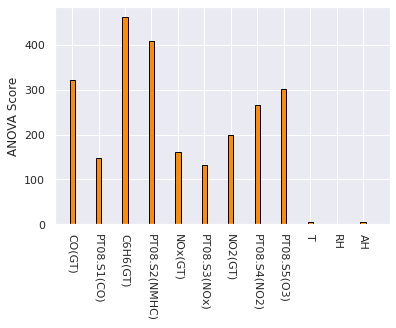

In [ ]:
sel = SelectKBest(f_classif,k = 12)
X_train_sel = sel.fit_transform(X_train,y_train)

scores = sel.scores_
plt.bar(sel.get_support(indices = True), scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)', color='darkorange',
        edgecolor='black')
plt.xticks(range(0,13),labels = ["CO(GT)",	"PT08.S1(CO)",	"C6H6(GT)",	"PT08.S2(NMHC)",	"NOx(GT)",	"PT08.S3(NOx)",	"NO2(GT)",	"PT08.S4(NO2)","PT08.S5(O3)",	"T"	,"RH",	"AH"])
plt.xticks(rotation=-90)
plt.ylabel('ANOVA Score')

L’attributo C6H6(GT) risulta essere il più significativo e il più
importante all’interno del dataset, ovvero quello che spiega
la maggior parte della variabilità dei dati, seguito in ordine
da PT08.S2(MNHC) e CO(GT) e PT08.S5(O3).
Capire se un valore di 400/450 di ANOVA Test è buono o meno però.

Controllare se quando riducevo dimensionalità questi attributi rimanevano da K=4 in giu, controllare che non li scartasse, se non li scartava ok

### **PCA** - Recursive Feature Selection

Fino a ora abbiamo visto quello che riguarda la scelta delle variabili, ora vediamo un metodo di feature projection.

Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.


In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [ ]:
dfnotempo.head()

CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  ...     T    RH      AH  Weekend
0     2.6       1360.0      11.9         1046.0  ...  13.6  48.9  0.7578        0
1     2.0       1292.0       9.4          955.0  ...  13.3  47.7  0.7255        0
2     2.2       1402.0       9.0          939.0  ...  11.9  54.0  0.7502        0
3     2.2       1376.0       9.2          948.0  ...  11.0  60.0  0.7867        0
4     1.6       1272.0       6.5          836.0  ...  11.2  59.6  0.7888        0

[5 rows x 13 columns]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = dfnotempo.drop('Weekend',axis=1)
y = dfnotempo['Weekend']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
from sklearn.feature_selection import SelectFromModel


In [ ]:
X_train


CO(GT)  PT08.S1(CO)  C6H6(GT)  ...     T    RH      AH
7975  1.40000        962.0       4.9  ...   3.7  40.1  0.3230
3841  2.15275        957.0       5.0  ...  32.8  24.3  1.1894
3041  1.60000       1027.0       8.0  ...  31.1  29.6  1.3180
6183  5.70000       1578.0      27.6  ...   9.9  77.6  0.9488
1639  0.40000        839.0       2.4  ...  20.8  32.3  0.7813
...       ...          ...       ...  ...   ...   ...     ...
5615  3.70000       1385.0      18.7  ...  22.3  64.3  1.7055
4120  2.15275       1028.0       6.9  ...  29.5  39.0  1.5868
7938  1.50000       1056.0       7.0  ...  15.0  28.5  0.4821
3430  1.10000        976.0       6.9  ...  40.4  19.8  1.4724
595   2.15275       1160.0       7.1  ...  25.6  32.1  1.0393

[7485 rows x 12 columns]

In [ ]:
sel = SelectKBest(k=2)
X_train_sel = sel.fit_transform(X_train, y_train)
for i in sel.scores_:
    print(i)
    
X_train_sel[0]

318.4309421000501
143.00265121920052
468.27869323171376
415.5890788503882
169.6122466815237
133.89555428170186
205.82408167112092
246.0505835225496
306.2906485157106
2.3865671763153395
0.2428361884769869
1.7052430517989097


array([  4.9, 756. ])

Ok stesso risultato di ANOVA se gli dico di selezionarmi le migliori 2

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoCV

sel = SelectFromModel(LassoCV()) # lo uso qua prima di fare regressione per bene perchè mi serve per capire feature principali insieme a altri classificatori
X_train_sel = sel.fit_transform(X_train, y_train)
X_train_sel[0]

array([962. ,   4.9, 756. , 255. , 902. , 176. , 843. , 908. ,   3.7,
        40.1])

Mi ha scartato CO(GT) e AH , quindi AH è ridondante rispetto a RH

Così non mi convince, proviamo questo approccio:
usato il costructor make_pipeline sia per dati originari che sui dati
standardizzati, utilizzando anche in questo caso una cross-validation

Standardization refers to shifting the distribution of each attribute to have a mean of zero and a standard deviation of one (unit variance). It is useful to standardize attributes for a model. Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data

Ovvero vado a vedere la PCA per ogni classifcatore che ho utilizzato e guardo se ottengo risultati diversi, utilizzerò per tutti il df senza tempo e senza AH , denominato df2:

In [ ]:
df2 = dataframe[["CO(GT)",	"PT08.S1(CO)",	"C6H6(GT)",	"PT08.S2(NMHC)",	"NOx(GT)",	"PT08.S3(NOx)",	"NO2(GT)",	"PT08.S4(NO2)","PT08.S5(O3)",	"T"	,"RH", "Weekend"]]

In [ ]:
df2.head()

CO(GT)  PT08.S1(CO)  C6H6(GT)  ...     T    RH  Weekend
0     2.6       1360.0      11.9  ...  13.6  48.9        0
1     2.0       1292.0       9.4  ...  13.3  47.7        0
2     2.2       1402.0       9.0  ...  11.9  54.0        0
3     2.2       1376.0       9.2  ...  11.0  60.0        0
4     1.6       1272.0       6.5  ...  11.2  59.6        0

[5 rows x 12 columns]

In [ ]:
attributes =  ["CO(GT)",	"PT08.S1(CO)",	"C6H6(GT)",	"PT08.S2(NMHC)",	"NOx(GT)",	"PT08.S3(NOx)",	"NO2(GT)",	"PT08.S4(NO2)","PT08.S5(O3)",	"T"	,"RH"]

#### Notebook prof PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)

In [ ]:
X_train_pca.shape

(7485, 2)

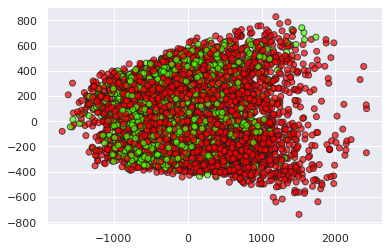

In [ ]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [ ]:
X_test_pca = pca.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.6356837606837606
F1-score [0.74908021 0.33528265]
              precision    recall  f1-score   support

           0       0.74      0.76      0.75      1345
           1       0.34      0.33      0.34       527

    accuracy                           0.64      1872
   macro avg       0.54      0.54      0.54      1872
weighted avg       0.63      0.64      0.63      1872



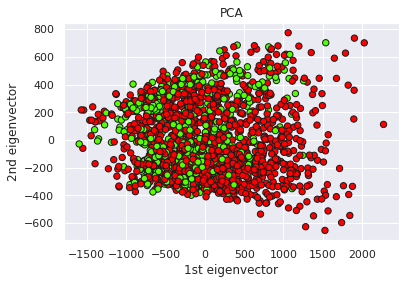

In [ ]:
from sklearn import datasets

plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap=plt.cm.prism, edgecolor='k', s=40)
plt.title("PCA")
plt.xlabel("1st eigenvector")
plt.ylabel("2nd eigenvector")
plt.show()

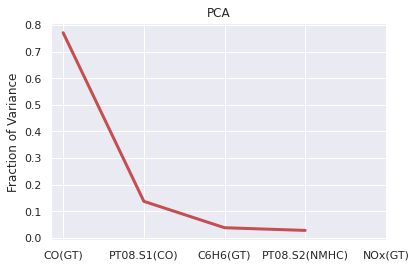

In [ ]:
plt.plot(PCA(n_components=4).fit(X_train).explained_variance_ratio_, lw=3, color='r', ms=2)
plt.title("PCA")
plt.ylabel("Fraction of Variance")
plt.xticks(range(5), attributes)
plt.show()

## **1.5 Imbalanced Data**

Analyze the value distribution of the class to predict and turn the dataset into an imbalanced version reaching a strong majority-minority distribution (e.g. 96%-4%). Then solve again the classification task adopting the various techniques studied (or new ones).

In [ ]:
dfdt = dataframe[["CO(GT)",	"PT08.S1(CO)",	"C6H6(GT)",	"PT08.S2(NMHC)",	"NOx(GT)",	"PT08.S3(NOx)",	"NO2(GT)",	"PT08.S4(NO2)","PT08.S5(O3)",	"T"	,"RH",	"AH",	"Hour",	"Month" , "Weekend"]]

In [ ]:
dfdt.head()

CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  ...      AH  Hour  Month  Weekend
0     2.6       1360.0      11.9         1046.0  ...  0.7578    18      3        0
1     2.0       1292.0       9.4          955.0  ...  0.7255    19      3        0
2     2.2       1402.0       9.0          939.0  ...  0.7502    20      3        0
3     2.2       1376.0       9.2          948.0  ...  0.7867    21      3        0
4     1.6       1272.0       6.5          836.0  ...  0.7888    22      3        0

[5 rows x 15 columns]

useremo il dataset dfdt, che riporta i gas, ora e mese ma non il weekday, per non condizionare i risultati da weekday:

In [ ]:
dfdt['Weekend'].value_counts()

0    6669
1    2688
Name: Weekend, dtype: int64

In [ ]:
dfdt['Weekend'].value_counts()/dfdt['Weekend'].count()


0    0.712728
1    0.287272
Name: Weekend, dtype: float64

to obtain a strong imbalanced dataset , as 96/98 % , the records of Weekend=1 has to be 200 more or less, to do that we choose randomnly some records to eliminate them in order to have the right % of imbalanced data.
In order to have the same randomn choose we selected np.random.seed(10)

In [ ]:
size_class1 = dfdt['Weekend'][dfdt['Weekend']==1].count()
pct_class1 = dfdt['Weekend'][dfdt['Weekend']==1].count()/dfdt['Weekend'].count()
size_class1, pct_class1

(2688, 0.28727156139788396)

Set the records of Weekend=1 to 200 more or less:

In [ ]:
new_size_class1 = int(size_class1 * 0.022 / pct_class1)
new_size_class1

205

In [ ]:
np.random.seed(10)
rows2remove = np.random.choice(dfdt[dfdt['Weekend'] == 1].index, size_class1 - new_size_class1 , replace=False)
dfdt_imb = dfdt.drop(index=rows2remove, axis=0)

len(rows2remove), len(dfdt_imb)

(2483, 6874)

In [ ]:
from collections import defaultdict, Counter

In [ ]:
print('Dataset shape %s' % Counter(dfdt_imb['Weekend']))

Dataset shape Counter({0: 6669, 1: 205})


In [ ]:
dfdt_imb['Weekend'].value_counts()/dfdt_imb['Weekend'].count()


0    0.970177
1    0.029823
Name: Weekend, dtype: float64

Now we have a dataset strongly imbalanced, now we want to use the classifing model used previusley on the imbalanced dataset.
Farò uno per uno tutti i classificatori esplorando tutte le modalitò di imbalnaced data per ognuno.

### KNN Imbalanced

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y_name = 'Weekend'

attributes = [col for col in dfdt.columns if col != y_name]

In [ ]:
attributes

['CO(GT)',
 'PT08.S1(CO)',
 'C6H6(GT)',
 'PT08.S2(NMHC)',
 'NOx(GT)',
 'PT08.S3(NOx)',
 'NO2(GT)',
 'PT08.S4(NO2)',
 'PT08.S5(O3)',
 'T',
 'RH',
 'AH',
 'Hour',
 'Month']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = dfdt_imb.drop('Weekend',axis=1)
y = dfdt_imb['Weekend']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

y_pred0 = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred0))
print('F1-score %s' % f1_score(y_test, y_pred0, average=None))
print(classification_report(y_test, y_pred0))

Accuracy 0.976
F1-score [0.98785425 0.        ]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1343
           1       0.00      0.00      0.00        32

    accuracy                           0.98      1375
   macro avg       0.49      0.50      0.49      1375
weighted avg       0.95      0.98      0.96      1375



In [ ]:
y_score = clf.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)

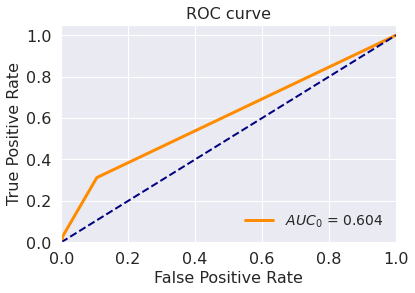

In [ ]:
plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

For KNN in imbalanced dataset we have and accurancy= 0.98 and AUC=0.604.

At this point implement the studied methods to work on KNN with imbalanced data.


#### **Adjust the decision threshold**

In [ ]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Come soglia mettiamo 0.50, come indicato dal prof in notebook:

Accuracy 0.9767272727272728
F1-score [0.98822664 0.        ]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1343
           1       0.00      0.00      0.00        32

    accuracy                           0.98      1375
   macro avg       0.49      0.50      0.49      1375
weighted avg       0.95      0.98      0.97      1375



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


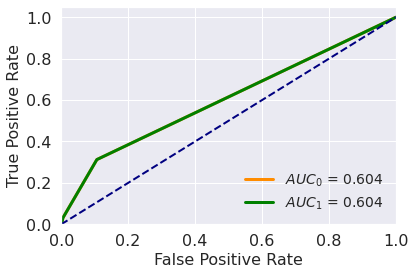

In [ ]:
def adjusted_predict(X, thr=0.50):
    y_score = clf.predict_proba(X_test)[:, 1]
    return np.array([1 if y > thr else 0 for y in y_score])

y_pred = adjusted_predict(X_test, thr=0.8)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, thr = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

Praticamente su algoritmo KNN non abbiamo avuto differenze con adjust decision threshold, accurancy e AUC sono rimaste invariate.

#### **Random Undersampling**

In pratica vogliamo estrarre dalla classe 0=NoWeekend tanti record quanti ne serve per ottenere un dataset con ugual numero di 0 e 1 , in teoria volevo averne 205, come 205 sono gli 1, ma in realtà me ne ha messi 173 e 173, capire perchè.

Ovviamente lo facciamo in modo casuale tenendo come seed ancora 10

In [ ]:
from imblearn.under_sampling import RandomUnderSampler


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
rus = RandomUnderSampler(random_state=10)
X_res, y_res = rus.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 173, 1: 173})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Accuracy 0.5825454545454546
F1-score [0.73127341 0.06514658]
              precision    recall  f1-score   support

           0       0.98      0.58      0.73      1343
           1       0.03      0.62      0.07        32

    accuracy                           0.58      1375
   macro avg       0.51      0.60      0.40      1375
weighted avg       0.96      0.58      0.72      1375



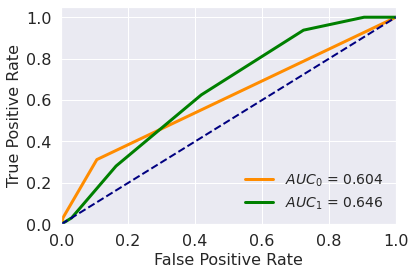

In [ ]:
clf = KNeighborsClassifier()

clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

Utilizzando questa tecnica è stato un disastro in termini di accurancy crollata a 0.58 da 0.98 di partenza, mentre AUC è aumentata da 0.604 a 0.646

#### **Condensed Nearest Neighbor**

In [ ]:
from imblearn.under_sampling import CondensedNearestNeighbour

In [ ]:
import warnings
warnings.simplefilter("ignore")

Questo richiede un po di tempo di esecuzione:

In [ ]:
cnn = CondensedNearestNeighbour(random_state=10, n_jobs=10)
X_res, y_res = cnn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 696, 1: 173})


Accuracy 0.9672727272727273
F1-score [0.98335183 0.04255319]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1343
           1       0.07      0.03      0.04        32

    accuracy                           0.97      1375
   macro avg       0.52      0.51      0.51      1375
weighted avg       0.96      0.97      0.96      1375



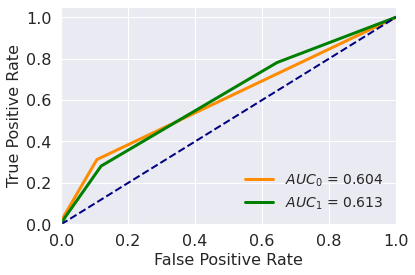

In [ ]:
clf = KNeighborsClassifier()

clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

Accurancy scesa di un punto, mentre AUC è aumentata di poco

#### **Random oversampling**

Fino a ora su KNN le tecniche di undersampling non sono andate benissimo, vediamo con oversampling cosa succede

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
ros = RandomOverSampler(random_state=10)
X_res, y_res = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 5326, 1: 5326})


Accuracy 0.9301818181818182
F1-score [0.96366389 0.11111111]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1343
           1       0.08      0.19      0.11        32

    accuracy                           0.93      1375
   macro avg       0.53      0.57      0.54      1375
weighted avg       0.96      0.93      0.94      1375



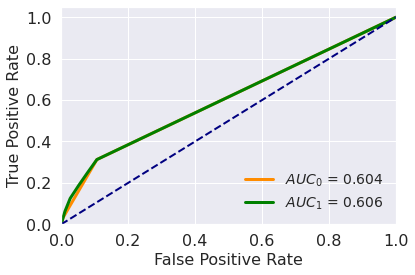

In [ ]:
clf = KNeighborsClassifier()

clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

Calo di poco in accurancy mentre AUC è aumentata in modo quasi irrilevante.

#### **SMOTE**

A problem with imbalanced classification is that there are too few examples of the minority class for a model to effectively learn the decision boundary.

One way to solve this problem is to oversample the examples in the minority class. This can be achieved by simply duplicating examples from the minority class in the training dataset prior to fitting a model. This can balance the class distribution but does not provide any additional information to the model.

An improvement on duplicating examples from the minority class is to synthesize new examples from the minority class. This is a type of data augmentation for tabular data and can be very effective.

Perhaps the most widely used approach to synthesizing new examples is called the Synthetic Minority Oversampling TEchnique

 To illustrate how this technique works consider some training data which has s samples, and f features in the feature space of the data. Note that these features, for simplicity, are continuous. As an example, consider a dataset of birds for classification. The feature space for the minority class for which we want to oversample could be beak length, wingspan, and weight (all continuous). To then oversample, take a sample from the dataset, and consider its k nearest neighbors (in feature space). To create a synthetic data point, take the vector between one of those k neighbors, and the current data point. Multiply this vector by a random number x which lies between 0, and 1. Add this to the current data point to create the new, synthetic data point.

In [ ]:
from imblearn.over_sampling import SMOTE


In [ ]:
sm = SMOTE(random_state=10)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 5326, 1: 5326})


Accuracy 0.8436363636363636
F1-score [0.91437674 0.10041841]
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      1343
           1       0.06      0.38      0.10        32

    accuracy                           0.84      1375
   macro avg       0.52      0.61      0.51      1375
weighted avg       0.96      0.84      0.90      1375



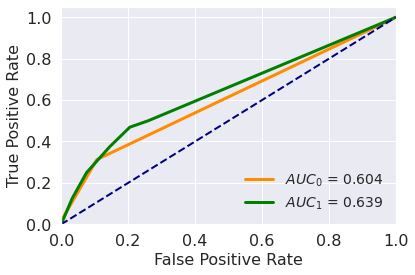

In [ ]:
clf = KNeighborsClassifier()

clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

Scesa accurancy ma AUC aumentata

#### **Meta-Cost Sensitive classifier** 

Con questo si vuole stimare quanto "costa" un modello, vediamo per KNN

Per fare questo importare modulo costcla

In [ ]:
!pip install costcla

     |████████████████████████████████| 4.0MB 3.3MB/s 
  Created wheel for pyea: filename=pyea-0.2-cp36-none-any.whl size=6017 sha256=1c8274e3454718c4f901db0c6d516e0d967aad5d836421b3d7c9eb09fa6e28dd
  Stored in directory: /root/.cache/pip/wheels/3c/bf/6e/06f8b0ed23cbc1fe956f8b6756535cb36f0b68c2f0f2342178
Successfully built pyea


Per il KNN da modulo costcla usiamo il BayesMinimumRiskClassifier, per valutare il "risparmio" nell'utilizzo di Y usiamo savings_score (1 è max risparmio)

In [ ]:
from costcla.models import BayesMinimumRiskClassifier
from costcla.metrics import savings_score

In [ ]:
y_test_knn = y_test.values
y_test_knn.shape

(1375,)

Cost matrix of the classification problem Where the columns represents the costs of: false positives, false negatives, true positives and true negatives, for each example.

In [ ]:
cost = [1, 5, 0, 0]
cost_mat_test = np.array([cost] * len(X_test))
cost_mat_test.shape

(1375, 4)

In [ ]:
clf = KNeighborsClassifier().fit(X_train,y_train)
y_prob_test = clf.predict_proba(X_test)
y_pred_test_knn = clf.predict(X_test)
clf_bmr = BayesMinimumRiskClassifier()
clf_bmr.fit(y_test_knn, y_prob_test)
y_pred_test_bmr = clf_bmr.predict(y_prob_test, cost_mat_test)

print(savings_score(y_test_knn, y_pred_test_knn, cost_mat_test))
print(savings_score(y_test_knn, y_pred_test_bmr, cost_mat_test))

-0.006250000000000089
0.0


Il risparmio con il Bayes Minimum Risk aumenta in modo infinitesimale su dataset sbilanciato.

In [ ]:
print(accuracy_score(y_test_knn, y_pred_test_bmr))
print(accuracy_score(y_test_knn, y_pred_test_knn))

0.9767272727272728
0.976


Accurancy per KNN su dataset sbilanciato e Accurancy KNN su dataset sbilanciato con unso del Bayes Minimum risk rimane pressochè invariata, anche AUC rimane invariata, vedi sotto:

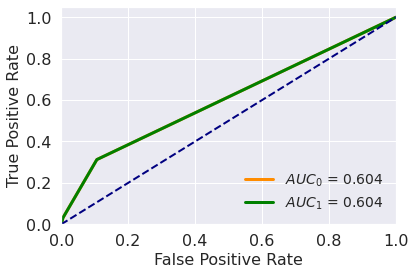

In [ ]:
fpr, tpr, _ = roc_curve(y_test_knn, y_prob_test[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

### **Naive Bayes Imbalanced**

We have choose to do Naive Bayes only with numerical values, categorical values are corrupted by "Weekday"

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
dfdt_imb.head()

CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  ...      AH  Hour  Month  Weekend
0     2.6       1360.0      11.9         1046.0  ...  0.7578    18      3        0
1     2.0       1292.0       9.4          955.0  ...  0.7255    19      3        0
2     2.2       1402.0       9.0          939.0  ...  0.7502    20      3        0
3     2.2       1376.0       9.2          948.0  ...  0.7867    21      3        0
4     1.6       1272.0       6.5          836.0  ...  0.7888    22      3        0

[5 rows x 15 columns]

In [ ]:
dfdtnum_imb = dfdt_imb[["CO(GT)", "PT08.S1(CO)", "C6H6(GT)",	"PT08.S2(NMHC)", "NOx(GT)",	"PT08.S3(NOx)",	"NO2(GT)",	"PT08.S4(NO2)",	"PT08.S5(O3)","T"	,"RH"	,"AH"	,"Weekend"]]

In [ ]:
dfdtnum_imb.head()

CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  ...     T    RH      AH  Weekend
0     2.6       1360.0      11.9         1046.0  ...  13.6  48.9  0.7578        0
1     2.0       1292.0       9.4          955.0  ...  13.3  47.7  0.7255        0
2     2.2       1402.0       9.0          939.0  ...  11.9  54.0  0.7502        0
3     2.2       1376.0       9.2          948.0  ...  11.0  60.0  0.7867        0
4     1.6       1272.0       6.5          836.0  ...  11.2  59.6  0.7888        0

[5 rows x 13 columns]

In [ ]:
X = dfdtnum_imb.drop('Weekend',axis=1)
y = dfdtnum_imb['Weekend']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
X_train.shape

(5499, 12)

In [ ]:
print('Dataset shape %s' % Counter(dfdtnum_imb['Weekend']))

Dataset shape Counter({0: 6669, 1: 205})


Vediamo ora come si compra Naive Bayes con valori numerici su dataset sbilanciato:

In [ ]:
clf = GaussianNB()
clf.fit(X_train, y_train)

y_pred0 = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred0))
print('F1-score %s' % f1_score(y_test, y_pred0, average=None))
print(classification_report(y_test, y_pred0))

Accuracy 0.9658181818181818
F1-score [0.98261191 0.        ]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1332
           1       0.00      0.00      0.00        43

    accuracy                           0.97      1375
   macro avg       0.48      0.50      0.49      1375
weighted avg       0.94      0.97      0.95      1375



Si comporta molto meglio del Naive Bayes su dataset non sbilanciato

In [ ]:
y_score = clf.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)

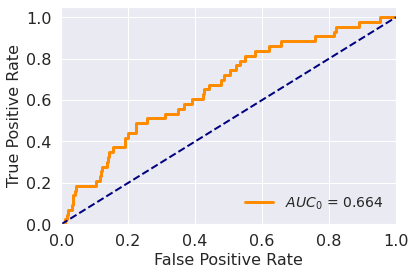

In [ ]:
plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

Quindi valori da tenere a mente sono accurancy=0.96 e AUC=0.609

#### **Adjust the decision threshold**

In [ ]:
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

Accuracy 0.9687272727272728
F1-score [0.98411526 0.        ]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1332
           1       0.00      0.00      0.00        43

    accuracy                           0.97      1375
   macro avg       0.48      0.50      0.49      1375
weighted avg       0.94      0.97      0.95      1375



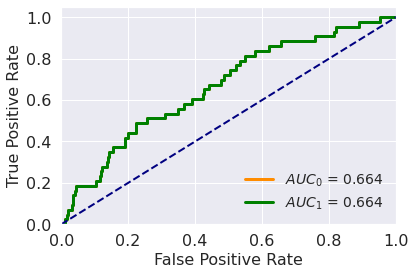

In [ ]:
def adjusted_predict(X, thr=0.5):
    y_score = clf.predict_proba(X_test)[:, 1]
    return np.array([1 if y > thr else 0 for y in y_score])

y_pred = adjusted_predict(X_test, thr=0.8)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, thr = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

Aumento da 0.96 a 0.97 in accurancy, AUC invariata

#### **Random Undersampling**

Stessa logica del KNN

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
rus = RandomUnderSampler(random_state=10)
X_res, y_res = rus.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 162, 1: 162})


Accuracy 0.3389090909090909
F1-score [0.48556876 0.07527976]
              precision    recall  f1-score   support

           0       0.99      0.32      0.49      1332
           1       0.04      0.86      0.08        43

    accuracy                           0.34      1375
   macro avg       0.51      0.59      0.28      1375
weighted avg       0.96      0.34      0.47      1375



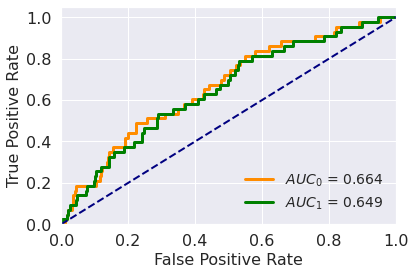

In [ ]:
clf = GaussianNB()

clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

Con random undersampling accurancy è precipitata a 0.42 e AUC scesa a 0.593, no bene.

#### **Condensed Nearest Neigbor**

In [ ]:
from imblearn.under_sampling import CondensedNearestNeighbour


In [ ]:
import warnings
warnings.simplefilter("ignore")

In [ ]:
# vuole il suo tempo lui
cnn = CondensedNearestNeighbour(random_state=10, n_jobs=10)
X_res, y_res = cnn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 677, 1: 162})


Accuracy 0.9687272727272728
F1-score [0.98411526 0.        ]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1332
           1       0.00      0.00      0.00        43

    accuracy                           0.97      1375
   macro avg       0.48      0.50      0.49      1375
weighted avg       0.94      0.97      0.95      1375



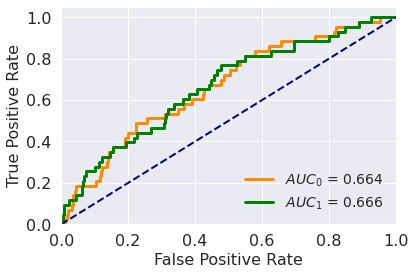

In [ ]:
clf = GaussianNB()

clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()


Accurancy invariata rispetto a partenza mentre AUC aumentata un poco

#### **Random Oversampling**

In [ ]:
from imblearn.over_sampling import RandomOverSampler


In [ ]:
ros = RandomOverSampler(random_state=10)
X_res, y_res = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 5337, 1: 5337})


Accuracy 0.3549090909090909
F1-score [0.50419229 0.07700312]
              precision    recall  f1-score   support

           0       0.99      0.34      0.50      1332
           1       0.04      0.86      0.08        43

    accuracy                           0.35      1375
   macro avg       0.51      0.60      0.29      1375
weighted avg       0.96      0.35      0.49      1375



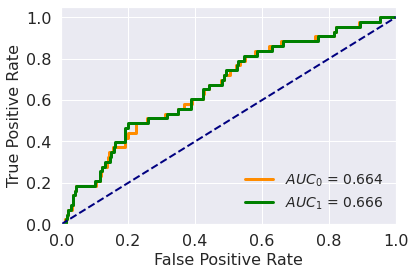

In [ ]:
clf = GaussianNB()

clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

Crolla Accurancy e cala persino AUC, molto male

#### **SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE


In [ ]:
sm = SMOTE(random_state=10)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 5337, 1: 5337})


Accuracy 0.37454545454545457
F1-score [0.52590959 0.08119658]
              precision    recall  f1-score   support

           0       0.99      0.36      0.53      1332
           1       0.04      0.88      0.08        43

    accuracy                           0.37      1375
   macro avg       0.52      0.62      0.30      1375
weighted avg       0.96      0.37      0.51      1375



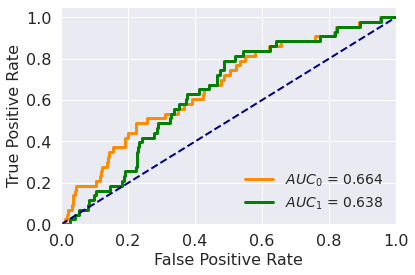

In [ ]:
clf = GaussianNB()

clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

Crolla Accurancy e mi cala anche AUC, male

#### **Meta-Cost Sensitive classifier**

Uso come per il KNN il Bayes Minimum Risk Classifier

In [ ]:
from costcla.models import BayesMinimumRiskClassifier
from costcla.metrics import savings_score

In [ ]:
y_test_gnb = y_test.values
y_test_gnb.shape

(1375,)

In [ ]:
cost = [1, 5, 0, 0]
cost_mat_test = np.array([cost] * len(X_test))
cost_mat_test.shape

(1375, 4)

In [ ]:
clf = GaussianNB().fit(X_train,y_train)
y_prob_test = clf.predict_proba(X_test)
y_pred_test_gnb = clf.predict(X_test)
clf_bmr = BayesMinimumRiskClassifier()
clf_bmr.fit(y_test_gnb, y_prob_test)
y_pred_test_bmr = clf_bmr.predict(y_prob_test, cost_mat_test)

print(savings_score(y_test_gnb, y_pred_test_gnb, cost_mat_test))
print(savings_score(y_test_gnb, y_pred_test_bmr, cost_mat_test))

-0.018604651162790642
0.0


Anche qua cambiamento infinitesiamle, non si risparmia, non capisco perchè

In [ ]:
print(accuracy_score(y_test_gnb, y_pred_test_bmr))
print(accuracy_score(y_test_gnb, y_pred_test_gnb))

0.9687272727272728
0.9658181818181818


Abbiamo perso qualcosa in termini di accurancy in dataset sbilanciato con uso del Bayes minimum risk rispetto a dataset sbilanciato

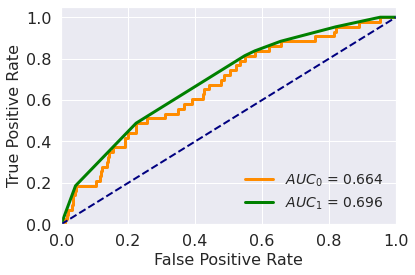

In [ ]:
fpr, tpr, _ = roc_curve(y_test_gnb, y_prob_test[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

AUC però è migliorata

### **Decision Tree Imbalanced**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
dfdt.head()

CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  ...      AH  Hour  Month  Weekend
0     2.6       1360.0      11.9         1046.0  ...  0.7578    18      3        0
1     2.0       1292.0       9.4          955.0  ...  0.7255    19      3        0
2     2.2       1402.0       9.0          939.0  ...  0.7502    20      3        0
3     2.2       1376.0       9.2          948.0  ...  0.7867    21      3        0
4     1.6       1272.0       6.5          836.0  ...  0.7888    22      3        0

[5 rows x 15 columns]

In [ ]:
y_name = 'Weekend'

attributes = [col for col in dfdt.columns if col != y_name]
X_train = dfdt_imb[attributes].values
y_train = dfdt_imb[y_name]

In [ ]:
# uso quello sopra passando i .values perchè sennò ho problemi con il calss weight
# X = dfdt_imb.drop('Weekend',axis=1)
# y = dfdt_imb['Weekend']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred0 = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred0))
print('F1-score %s' % f1_score(y_test, y_pred0, average=None))
print(classification_report(y_test, y_pred0))

Accuracy 0.9512727272727273
F1-score [0.97495327 0.10666667]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1340
           1       0.10      0.11      0.11        35

    accuracy                           0.95      1375
   macro avg       0.54      0.54      0.54      1375
weighted avg       0.95      0.95      0.95      1375



Ho performance migliori su dataset sbilanciato

In [ ]:
y_score = clf.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)

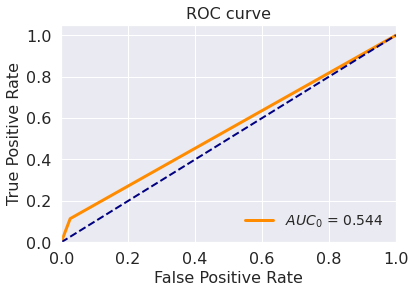

In [ ]:
plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

Valori di riferimento decision tree su dataset sbilanciato sono Accurancy=0.94 e AUC=0.583

#### **Adjust decision Threshold**

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Accuracy 0.9476363636363636
F1-score [0.97303371 0.1       ]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1340
           1       0.09      0.11      0.10        35

    accuracy                           0.95      1375
   macro avg       0.53      0.54      0.54      1375
weighted avg       0.95      0.95      0.95      1375



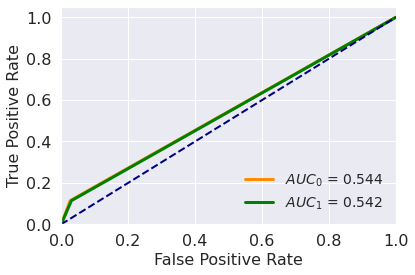

In [ ]:
def adjusted_predict(X, thr=0.5):
    y_score = clf.predict_proba(X_test)[:, 1]
    return np.array([1 if y > thr else 0 for y in y_score])

y_pred = adjusted_predict(X_test, thr=0.8)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, thr = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

Accurancy aumentata da 0.94 a 0.95 mentre AUC rimasta uguale, non male

#### **Random Undersmapling**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=10)
X_res, y_res = rus.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))


Resampled dataset shape Counter({0: 170, 1: 170})


Accuracy 0.5738181818181818
F1-score [0.72488263 0.05483871]
              precision    recall  f1-score   support

           0       0.98      0.58      0.72      1340
           1       0.03      0.49      0.05        35

    accuracy                           0.57      1375
   macro avg       0.50      0.53      0.39      1375
weighted avg       0.95      0.57      0.71      1375



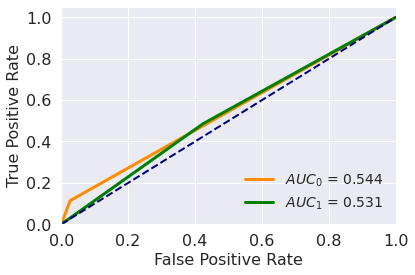

In [ ]:
clf = DecisionTreeClassifier()

clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

Accurancy scesa tanto mentre AUC aumentata, non benissimo.

#### **Condensed Nearest Neighbor**

In [ ]:
from imblearn.under_sampling import CondensedNearestNeighbour

In [ ]:
import warnings
warnings.simplefilter("ignore")

In [ ]:
# dagli tempo
cnn = CondensedNearestNeighbour(random_state=10, n_jobs=10)
X_res, y_res = cnn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 678, 1: 170})


Accuracy 0.7970909090909091
F1-score [0.88644689 0.04778157]
              precision    recall  f1-score   support

           0       0.97      0.81      0.89      1340
           1       0.03      0.20      0.05        35

    accuracy                           0.80      1375
   macro avg       0.50      0.51      0.47      1375
weighted avg       0.95      0.80      0.87      1375



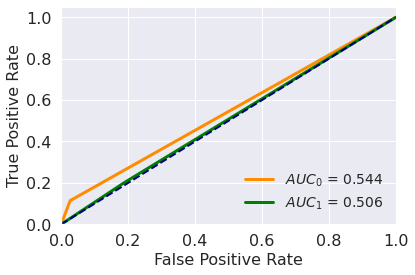

In [ ]:
clf = DecisionTreeClassifier()

clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

Accurancy e AUC aumentata, quindi no bene per performance

#### **Random Oversampling**

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
ros = RandomOverSampler(random_state=10)
X_res, y_res = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 5329, 1: 5329})


Accuracy 0.9541818181818181
F1-score [0.97653631 0.03076923]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1340
           1       0.03      0.03      0.03        35

    accuracy                           0.95      1375
   macro avg       0.50      0.50      0.50      1375
weighted avg       0.95      0.95      0.95      1375



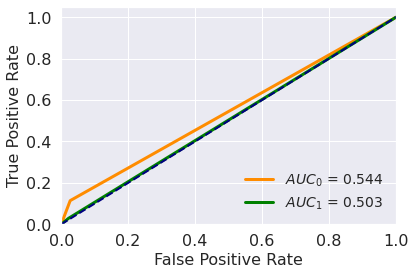

In [ ]:
clf = DecisionTreeClassifier()

clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

Accurancy da 0.94 scesa a 0.93, non male, AUC aumentata un poco

#### **SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state=10)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 5329, 1: 5329})


Accuracy 0.9003636363636364
F1-score [0.94724682 0.10457516]
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1340
           1       0.07      0.23      0.10        35

    accuracy                           0.90      1375
   macro avg       0.52      0.57      0.53      1375
weighted avg       0.96      0.90      0.93      1375



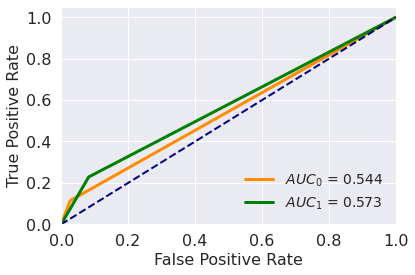

In [ ]:
clf = DecisionTreeClassifier()

clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

Accurancy scesa da 0.94 a 0.92 quindi non male, e AUC aumentata, in generale non male anche questo

#### **Class Weight**

La tecninca Class weight verrà usata solo su decision tree e su logistic regression in quanto questi due algoritmi danno opportunità di modificare il peso delle classi

Al fine di dare + importanza alla classe minore (1=Weekend) diamo un peso + alto a quest'ultima, proviamo con :
- classe Weekend = 0 -> peso 1
- classe Weekend = 1 -> peso 15

Accuracy 0.9483636363636364
F1-score [0.97343808 0.07792208]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1340
           1       0.07      0.09      0.08        35

    accuracy                           0.95      1375
   macro avg       0.52      0.53      0.53      1375
weighted avg       0.95      0.95      0.95      1375



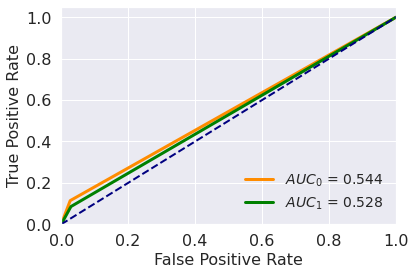

In [ ]:
clf = DecisionTreeClassifier(class_weight={0:1, 1: 15})
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

ho aumentato peso fino a 15 per capire quando avrei ottenuto un miglioramento  per la classe Weekend=1 in termini di Accurancy da 0.94 a 0.96, non male, AUC aumentata 

#### **Meta-Cost sensitive classifier**

In [ ]:
from costcla.models import CostSensitiveDecisionTreeClassifier
from costcla.metrics import savings_score

Per la "misurazione" del costo qua dal modulo costlca prendiamo il relativo per il decision tree

cost_mat : array-like of shape = [n_samples, 4]

Cost matrix of the classification problem Where the columns represents the costs of: false positives, false negatives, true positives and true negatives, for each example.

In [ ]:
from costcla.models import CostSensitiveDecisionTreeClassifier
from costcla.metrics import savings_score

cost = [1, 10, 0, 0]
cost_mat = np.array([cost] * len(X_train))
cost_mat.shape

(5499, 4)

In [ ]:
# NON FUNZIONA NON CAPISCO PERCHè
clf = CostSensitiveDecisionTreeClassifier()
clf.fit(X_train, y_train, cost_mat)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

TypeError: ignored

### **Logistic Regression imbalanced**

Anche qua  farò riferimnto solo a valori numeri

In [ ]:
dfdtnum_imb.head()

CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  ...     T    RH      AH  Weekend
0     2.6       1360.0      11.9         1046.0  ...  13.6  48.9  0.7578        0
1     2.0       1292.0       9.4          955.0  ...  13.3  47.7  0.7255        0
2     2.2       1402.0       9.0          939.0  ...  11.9  54.0  0.7502        0
3     2.2       1376.0       9.2          948.0  ...  11.0  60.0  0.7867        0
4     1.6       1272.0       6.5          836.0  ...  11.2  59.6  0.7888        0

[5 rows x 13 columns]

In [ ]:
X = dfdtnum_imb.drop('Weekend',axis=1)
y = dfdtnum_imb['Weekend']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV

scaler = StandardScaler()
X_train_log = scaler.fit_transform(X_train)
X_test_log = scaler.fit_transform (X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train_log, y_train)

y_pred0 = clf.predict(X_test_log)

print('Accuracy %s' % accuracy_score(y_test, y_pred0))
print('F1-score %s' % f1_score(y_test, y_pred0, average=None))
print(classification_report(y_test, y_pred0))

Accuracy 0.9701818181818181
F1-score [0.98486526 0.        ]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1334
           1       0.00      0.00      0.00        41

    accuracy                           0.97      1375
   macro avg       0.49      0.50      0.49      1375
weighted avg       0.94      0.97      0.96      1375



In [ ]:
y_score = clf.predict_proba(X_test_log)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)


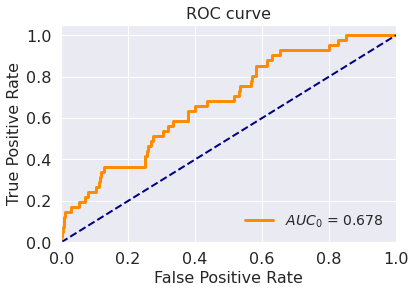

In [ ]:
plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

Valore riferimento Logistic Regression su dataset sbilanciato sono Accurancy=0.96 e AUC=0.679 , che sono anche meglio del dataset non sbilanciato

#### **Adjust the decision threshold**

In [ ]:
clf = LogisticRegression()
clf.fit(X_train_log, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Come al solito settimao la soglia a 0.5

Accuracy 0.9701818181818181
F1-score [0.98486526 0.        ]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1334
           1       0.00      0.00      0.00        41

    accuracy                           0.97      1375
   macro avg       0.49      0.50      0.49      1375
weighted avg       0.94      0.97      0.96      1375



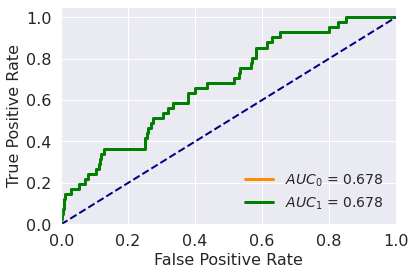

In [ ]:
def adjusted_predict(X, thr=0.5):
    y_score = clf.predict_proba(X_test_log)[:, 1]
    return np.array([1 if y > thr else 0 for y in y_score])

y_pred = adjusted_predict(X_test_log, thr=0.8)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test_log)
fpr, tpr, thr = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

Con questa soglia no variazione in temrini accurancy o AUC

#### **Random undersampling**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train_log, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 164, 1: 164})


Accuracy 0.5556363636363636
F1-score [0.70807453 0.07001522]
              precision    recall  f1-score   support

           0       0.98      0.56      0.71      1334
           1       0.04      0.56      0.07        41

    accuracy                           0.56      1375
   macro avg       0.51      0.56      0.39      1375
weighted avg       0.95      0.56      0.69      1375



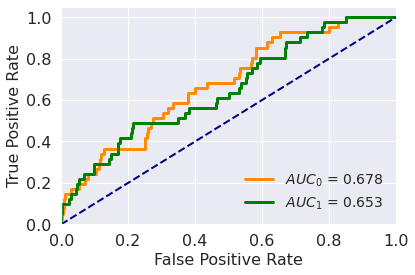

In [ ]:
clf = LogisticRegression()

clf.fit(X_res, y_res)

y_pred = clf.predict(X_test_log)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test_log)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

Accurancy crollata e AUC scesa un poco, non bene 

#### **Condensed Nearest neighbor**

In [ ]:
from imblearn.under_sampling import CondensedNearestNeighbour

In [ ]:
import warnings
warnings.simplefilter("ignore")

In [ ]:
# dagli tempo
cnn = CondensedNearestNeighbour(random_state=42, n_jobs=10)
X_res, y_res = cnn.fit_resample(X_train_log, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 651, 1: 164})


Accuracy 0.9701818181818181
F1-score [0.98486526 0.        ]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1334
           1       0.00      0.00      0.00        41

    accuracy                           0.97      1375
   macro avg       0.49      0.50      0.49      1375
weighted avg       0.94      0.97      0.96      1375



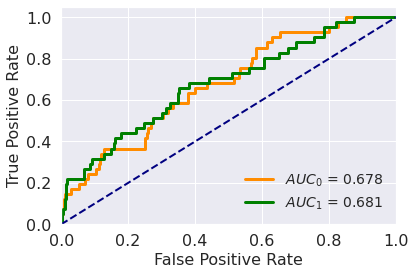

In [ ]:
clf = LogisticRegression()

clf.fit(X_res, y_res)

y_pred = clf.predict(X_test_log)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test_log)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

Accurancy aumentata e AUC diminuita di poco, non male

#### **Random Oversampling**

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=10)
X_res, y_res = ros.fit_resample(X_train_log, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 5335, 0: 5335})


Accuracy 0.5483636363636364
F1-score [0.70014486 0.08541973]
              precision    recall  f1-score   support

           0       0.98      0.54      0.70      1334
           1       0.05      0.71      0.09        41

    accuracy                           0.55      1375
   macro avg       0.51      0.63      0.39      1375
weighted avg       0.96      0.55      0.68      1375



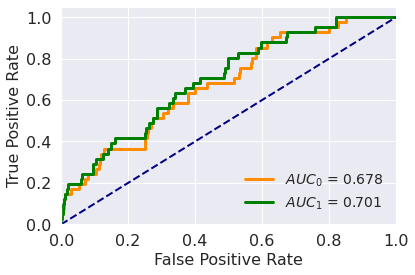

In [ ]:
clf = LogisticRegression()

clf.fit(X_res, y_res)

y_pred = clf.predict(X_test_log)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test_log)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

Questo molto male in termini di accurancy

#### **SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=10)
X_res, y_res = sm.fit_resample(X_train_log, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 5335, 0: 5335})


Accuracy 0.5658181818181818
F1-score [0.71449067 0.09408194]
              precision    recall  f1-score   support

           0       0.99      0.56      0.71      1334
           1       0.05      0.76      0.09        41

    accuracy                           0.57      1375
   macro avg       0.52      0.66      0.40      1375
weighted avg       0.96      0.57      0.70      1375



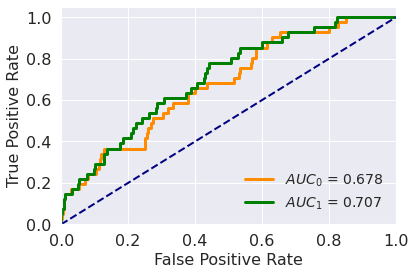

In [ ]:
clf = LogisticRegression()

clf.fit(X_res, y_res)

y_pred = clf.predict(X_test_log)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test_log)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

Anche questo molto male

#### **Class Weight**

Accuracy 0.9701818181818181
F1-score [0.98486526 0.        ]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1334
           1       0.00      0.00      0.00        41

    accuracy                           0.97      1375
   macro avg       0.49      0.50      0.49      1375
weighted avg       0.94      0.97      0.96      1375



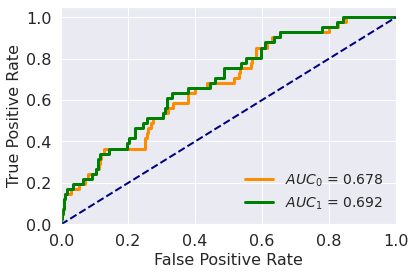

In [ ]:
clf = LogisticRegression(class_weight={0:1, 1: 5})
clf.fit(X_train_log, y_train)

y_pred = clf.predict(X_test_log)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test_log)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

Qua ho scelto un peso della classe uguale a 5 perchè per un peso della classe Weekend=1 superiore a 10 le performance in termini di accurancy diminuivano

#### **Meta-Cost Sensitive Classifier**

In [ ]:
from costcla.models import CostSensitiveLogisticRegression
from costcla.metrics import savings_score

cost = [8, 10, 0, 0]
cost_mat = np.array([cost] * len(X_train))
cost_mat.shape

(5499, 4)

Accuracy 0.9701818181818181
F1-score [0.98486526 0.        ]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1334
           1       0.00      0.00      0.00        41

    accuracy                           0.97      1375
   macro avg       0.49      0.50      0.49      1375
weighted avg       0.94      0.97      0.96      1375



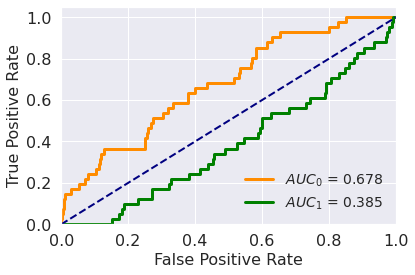

In [ ]:
clf = CostSensitiveLogisticRegression()
clf.fit(X_train_log, y_train, cost_mat)

y_pred = clf.predict(X_test_log)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test_log)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

Con il modello costsensitiveLogisticRegression le perfomance sono notevomente peggiorate sia in termini di accurancy che in termini di AUC

## **1.6 - Linear Regression**

Select two continuous attributes, define a regression problem and try to solve it using different techniques reporting various evaluation measures. Plot the two-dimensional dataset. Then generalize to multiple linear regression and observe how the performance varies.

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

Per valutare tutte le regressioni mi baserò su 3 parametri:
- coefficiente di determinazione R^2 , mi dice quanto il modello può spiegare la variabilità di Y
- Mean Squared Error MSE , mi calcola errore quadratico medio tra i valori di Y osservati e quelli stimati da modello di regressione.
- Mean Absolute Error MAE , per valutare errore assoluto tra i valori di Y osservati e quelli stimati/previsti.

Cerchiamo di tirare fuori i due attraibuti per la Linear Regression

Secondo la PCA i gas che contribuivano di più sono:
"CO(GT)",	"PT08.S1(CO)",	"C6H6(GT)",	"PT08.S2(NMHC)",	"NOx(GT)"

prendo i primi due per fare regressione

In [ ]:
dfdt.head()

CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  ...      AH  Hour  Month  Weekend
0     2.6       1360.0      11.9         1046.0  ...  0.7578    18      3        0
1     2.0       1292.0       9.4          955.0  ...  0.7255    19      3        0
2     2.2       1402.0       9.0          939.0  ...  0.7502    20      3        0
3     2.2       1376.0       9.2          948.0  ...  0.7867    21      3        0
4     1.6       1272.0       6.5          836.0  ...  0.7888    22      3        0

[5 rows x 15 columns]

In [ ]:
attributes = [col for col in dfdt.columns if col != y_name]
X = dfdt[attributes].values
y = dfdt[y_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

#### **Two-Dimensional Linear Regression**

In [ ]:
dfdt.corr()

CO(GT)  PT08.S1(CO)  C6H6(GT)  ...      Hour     Month   Weekend
CO(GT)         1.000000     0.773394  0.812361  ...  0.323944  0.103124 -0.201088
PT08.S1(CO)    0.773394     1.000000  0.883795  ...  0.321097 -0.039199 -0.135768
C6H6(GT)       0.812361     0.883795  1.000000  ...  0.336890  0.124887 -0.239455
PT08.S2(NMHC)  0.795578     0.892964  0.981950  ...  0.380964  0.124605 -0.225022
NOx(GT)        0.762273     0.615941  0.616801  ...  0.200493  0.130358 -0.142845
PT08.S3(NOx)  -0.613877    -0.771938 -0.735744  ... -0.316828 -0.059813  0.130349
NO2(GT)        0.646349     0.562843  0.535919  ...  0.327673 -0.160774 -0.158050
PT08.S4(NO2)   0.558232     0.682881  0.765731  ...  0.216572  0.171304 -0.185517
PT08.S5(O3)    0.759027     0.899324  0.865689  ...  0.239880  0.047637 -0.197349
T              0.020257     0.048627  0.198956  ...  0.202272  0.274895 -0.022766
RH             0.043198     0.114606 -0.061681  ... -0.289543  0.080199 -0.004447
AH             0.043274     0.135324  0.167972  ... -0.018233  0.413741 -0.029717
Hour           0.323944     0.321097  0.336890  ...  1.000000 -0.000102  0.000132
Month          0.103124    -0.039199  0.124887  ... -0.000102  1.000000 -0.016092
Weekend       -0.201088    -0.135768 -0.239455  ...  0.000132 -0.016092  1.000000

[15 rows x 15 columns]

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
X = dfdt[['CO(GT)']].values
y = dfdt[['NOx(GT)']].values

Ho scelto questi due perchè dato che avalutiamo inquiamento aria il CO(GT) monossido di carbonio , è un gas inodore e incolore, tossico per l’uomo.

Si forma in tutte le combustioni incomplete, in particolare, viene prodotto da tutti i veicoli a combustione interna (es. automobili), ma anche dagli impianti di riscaldamento domestici e dagli impianti industriali.

Poi ho considerato il NOx(GT),  L’azoto combinandosi con l’ossigeno da luogo a diversi composti denominati NOX. Tra questi i più importanti per l’inquinamento atmosferico sono l’ossido di azoto NO e soprattutto il biossido di azoto NO2.

L’ossido di azoto è un gas incolore ed inodore. Si forma in qualsiasi processo di combustione in cui si impiega l’aria come comburente.

Infatti mi aspetto che NOx(GT) sia spiegata abbastanza bene da CO(GT)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor

reg = LinearRegression()
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [[112.03358291]]
Intercept: 
 [5.71649039]


Modello generato:

Y = 5.71649039 + 112.03358291 * X

R2: 0.581
MSE: 15672.498
MAE: 88.916


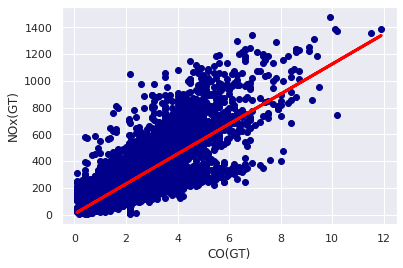

In [ ]:
y_pred = reg.predict(X)

print('R2: %.3f' % r2_score(y, y_pred))
print('MSE: %.3f' % mean_squared_error(y, y_pred))
print('MAE: %.3f' % mean_absolute_error(y, y_pred))

fig1, ax1 = plt.subplots()
ax1.scatter(X, y,  color='darkblue')
ax1.plot(X, y_pred, color='red', linewidth=3)    
ax1.set_xlabel('CO(GT)')
ax1.set_ylabel('NOx(GT)')
plt.show()

Il coefficiente R 2 è pari a 0.581, quindi il modello spiega
soltanto il 58.1% della variabilità della variabile Nox(GT), mi aspettavo di puù.
L’MSE è pari a 15672.498 mentre l’MAE è 88.916.

Tutto sommato da figura non mi sembra male come modello di regressione, anche se ha tanto errore, prende il trend diciamo

### **Lasso**

In [ ]:
from sklearn.linear_model import Lasso
reg = Lasso()
reg.fit(X, y)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [111.45616593]
Intercept: 
 [6.95952453]


R2: 0.581
MSE: 15673.076
MAE: 88.940


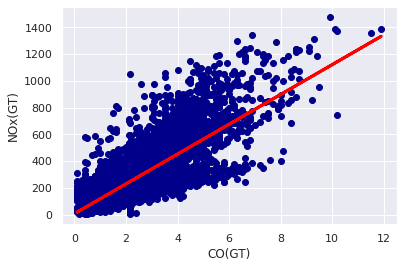

In [ ]:
y_pred = reg.predict(X)

print('R2: %.3f' % r2_score(y, y_pred))
print('MSE: %.3f' % mean_squared_error(y, y_pred))
print('MAE: %.3f' % mean_absolute_error(y, y_pred))

fig1, ax1 = plt.subplots()
ax1.scatter(X, y,  color='darkblue')
ax1.plot(X, y_pred, color='red', linewidth=3)     
ax1.set_xlabel('CO(GT)')
ax1.set_ylabel('NOx(GT)')
plt.show()

Mi da stesso risultato della regressione semplice, proviamo usando la LassoLarsCV

### **LassoLarsCV**

Questo al posto del Lasso fa la cross vaidation e utilizza algoritmo Lars 

In [ ]:
from sklearn.linear_model import LassoLarsCV
reg = LassoLarsCV()
reg.fit(X, y)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [112.03358291]
Intercept: 
 5.716490388544997


In [ ]:
y_pred = reg.predict(X)

print('R2: %.3f' % r2_score(y, y_pred))
print('MSE: %.3f' % mean_squared_error(y, y_pred))
print('MAE: %.3f' % mean_absolute_error(y, y_pred))

fig1, ax1 = plt.subplots()
ax1.scatter(X, y,  color='darkblue')
ax1.plot(X, y_pred, color='red', linewidth=3)     
ax1.set_xlabel('CO(GT)')
ax1.set_ylabel('(NOx(GT)')
plt.show()

Mi genera un modello e delle performance uguale a quelle della regressione semplice.

### **Ridge**

In [ ]:
reg = Ridge()
reg.fit(X, y)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [[112.02666979]]
Intercept: 
 [5.73137261]


R2: 0.581
MSE: 15672.498
MAE: 88.917


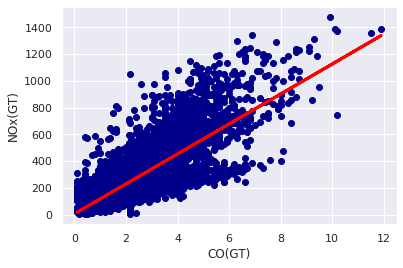

In [ ]:
y_pred = reg.predict(X)

print('R2: %.3f' % r2_score(y, y_pred))
print('MSE: %.3f' % mean_squared_error(y, y_pred))
print('MAE: %.3f' % mean_absolute_error(y, y_pred))

fig1, ax1 = plt.subplots()
ax1.scatter(X, y,  color='darkblue')
ax1.plot(X, y_pred, color='red', linewidth=3)    
ax1.set_xlabel('CO(GT)')
ax1.set_ylabel('NOx(GT)')
plt.show()

Ancora mi genera stesso modello con stesse performance.

### **Multiple Linear Regression**

Il modello di regressione lineare multipla è stato ottenuto
considerando sempre l’attributo NOx(GT) come variabile dipen-
dente Y e tutti gli attributi numerici come variabili indi-
pendenti, aggiungendo anche la variabile binaria Weekend

In [ ]:
dfdt.head()

CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  ...      AH  Hour  Month  Weekend
0     2.6       1360.0      11.9         1046.0  ...  0.7578    18      3        0
1     2.0       1292.0       9.4          955.0  ...  0.7255    19      3        0
2     2.2       1402.0       9.0          939.0  ...  0.7502    20      3        0
3     2.2       1376.0       9.2          948.0  ...  0.7867    21      3        0
4     1.6       1272.0       6.5          836.0  ...  0.7888    22      3        0

[5 rows x 15 columns]

Then make a list of the independent values and call this variable X.

Put the dependent values in a variable called y.

In [ ]:
X = dfdt[['CO(GT)','PT08.S1(CO)','C6H6(GT)','PT08.S2(NMHC)','T','RH']] #tengo quelli della PCA + T e RH
y = dfdt['NOx(GT)']

In [ ]:
from sklearn import linear_model

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

Coefficients: 
 [ 9.63065476e+01 -6.97533844e-02 -4.24813801e+00  2.79852835e-01
 -6.39489675e+00  3.61971312e-01]
Intercept: 
 -4.381111148847538


Quelelo + legato come sapevo è CO(GT) , poi gli altri in cascata

**NOx(GT)** = -4.381111148847538 + 9.63065476e+01 *CO(GT)* -6.97533844e-02 *PT08.SI(CO)* -4.24813801e+00 *C6H6(GT)* + 2.79852835e-01 *PT08.S2(NMHC)* -6.39489675e+00 *T* +  3.61971312e-01 *RH*

## **Conclusions**

DA SCRIVERE

IL META COST DEL DECISION TREE NON VA NON SO PERCHè E LA MULTIPLE LINEAR REGRESSION NON MI TORNAVA BENE MA è ACCETTABILE

# **Project Task 2 - Advanced Classifiers and Evaluation**

**VEDI MIO FILE TASK 2, QUELLO CHE SEGUE QUA è DA ELIMINARE**

## **2.1 + 2.2 - Advanced Classifiers + Evaluatation**


Using the dataset for classification prepared for Task 1 build several advanced classifiers able to predict room occupancy from the available variables. In particular, you are required to use SVM (linear and non-linear), NN (Single and Multilayer Perceptron), DNN (design at least two different architectures), Ensemble Classifier (RandomForest, AdaBoost and a Bagging technique in which you can select a base classifier of your choice with a justification).

## **SVM**

Support Vector Machines are a supervised learning model that represents the decision boundary using a subset of the training examples, known as the support vectors.

SVMs are one of the powerful machine learning algorithms for classification, regression and outlier detection purposes. An SVM classifier builds a model that assigns new data points to one of the given categories. Thus, it can be viewed as a non-probabilistic binary linear classifier.

Per quanto riguarda la SVM, è stata implementata applicando al dataset iniziale lo StandardScaler sugli attributi numerici.

Per la ricerca dei migliori parametri per l’implementazione del Support Vector Classifier è stata utilizzata la GridSearchCV. Per quanto riguarda la SVM, è stata implementata applicando al dataset iniziale lo StandardScaler sugli attributi numerici.

Lo scoring sulle varie combinazioni dei parametri è stato fatto tenendo conto dell’accuracy misurata su un set di validazione di ampiezza 5, inoltre, voglio differenziare i vari kernel.

Useremo le Kernel function di :
- Linear
- Sigmoid
- Polynomial (poly)
- Radial basis funciton (rbf)

per farlo lavoreremo su un dataset che contiene solo i gas, la T, Rh e la varibiale dipendente Weekend

In [ ]:
df2 = dfdt[["CO(GT)", "PT08.S1(CO)", "C6H6(GT)",	"PT08.S2(NMHC)", "NOx(GT)",	"PT08.S3(NOx)",	"NO2(GT)",	"PT08.S4(NO2)",	"PT08.S5(O3)","T"	,"RH"	,"Weekend"]]

In [ ]:
df2.head()

CO(GT)  PT08.S1(CO)  C6H6(GT)  ...     T    RH  Weekend
0     2.6       1360.0      11.9  ...  13.6  48.9        0
1     2.0       1292.0       9.4  ...  13.3  47.7        0
2     2.2       1402.0       9.0  ...  11.9  54.0        0
3     2.2       1376.0       9.2  ...  11.0  60.0        0
4     1.6       1272.0       6.5  ...  11.2  59.6        0

[5 rows x 12 columns]

In [ ]:
scaler = StandardScaler()

Before standardize i need to drop out the depenedet variable

In [ ]:
scaler.fit(df2.drop('Weekend',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
scaled_features = scaler.transform(df2.drop('Weekend',axis=1))

In [ ]:
df2_feat = pd.DataFrame(scaled_features,columns=df2.columns[:-1])
df2_feat.head()

CO(GT)  PT08.S1(CO)  C6H6(GT)  ...  PT08.S5(O3)         T        RH
0  0.339856     1.222702  0.248813  ...     0.627494 -0.544962 -0.019689
1 -0.116071     0.903123 -0.093547  ...    -0.130331 -0.579615 -0.090386
2  0.035905     1.420088 -0.148325  ...     0.130812 -0.741330  0.280772
3  0.035905     1.297897 -0.120936  ...     0.461080 -0.845290  0.634256
4 -0.420023     0.809130 -0.490684  ...     0.222979 -0.822188  0.610691

[5 rows x 11 columns]

Now i recompute the split on scaled features and without dependent variable:


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df2['Weekend'],test_size=0.20)

Metti **PCA** qua che mi serve per dopo:

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_train)

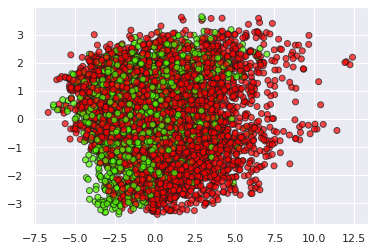

In [ ]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

Per i vari algoritmi di SVM li confronteremo usando i seguenti valori di C (che rappresenta il costo per l'errata classificazione) :
- 0.1
- 1
- 10
- 100

Gli stessi valori verranno usati per gamma [1,0.1, 0.01, 0.001,"scale","auto"], dove *scale* utilizza come valore 1/(n_features∗varianza) e *auto* utilizza come valore 1/n_features; questo è il parametro adottato dalle kernel functions per regolare la sua forma.

### SVM default parameters

Default hyperparameter means C=1.0, kernel=rbf and gamma=auto among other parameters.

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc=SVC() # instantiate classifier with default hyperparameters
svc.fit(X_train,y_train) # fit classifier to training set
y_pred=svc.predict(X_test) # make predictions on test set

print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.7612


The accuracy for default hyperparametrs SVM is 0.7612

visto che il default è il rbf iniziamo da quest'ultimo ad esplorare qualche valore di C:

**Run SVM with rbf kernel and C=10.0**
If we have a lot of outliers in our dataset (non lo sappiamo ancora perchè viene dopo) it is good idea use an highr C, also C0100, but now test with C=10. 

In [ ]:
svc=SVC(C=10.0) 
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

print('Model accuracy score with rbf kernel and C=10.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=10.0 : 0.7917


Accuracy è aumentata di qualche punto quindi bene.

**Run SVM with rbf kernel and C=100.0**
So, we should increase the value of C as higher C means fewer outliers. So, I will run SVM with kernel=rbf and C=100.0.

In [ ]:
svc=SVC(C=100.0) 
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.8136


Ancora meglio con C=100, il meglio fino a ora in termini di accuracy.

**Run SVM with rbf kernel and C=1000.0**

In [ ]:
svc=SVC(C=1000.0) 
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.8248


### **Linear SVM**

Ora proviamo con i vari valori di C

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
clf = LinearSVC(C=0.1, random_state=10)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7387820512820513
F1-score [0.84066471 0.27555556]
              precision    recall  f1-score   support

           0       0.75      0.96      0.84      1350
           1       0.61      0.18      0.28       522

    accuracy                           0.74      1872
   macro avg       0.68      0.57      0.56      1872
weighted avg       0.71      0.74      0.68      1872



In [ ]:
clf = LinearSVC(C=1.0, random_state=10)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7366452991452992
F1-score [0.83873078 0.28238719]
              precision    recall  f1-score   support

           0       0.75      0.95      0.84      1350
           1       0.59      0.19      0.28       522

    accuracy                           0.74      1872
   macro avg       0.67      0.57      0.56      1872
weighted avg       0.71      0.74      0.68      1872



In [ ]:
clf = LinearSVC(C=10.0, random_state=10)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7355769230769231
F1-score [0.83870968 0.26666667]
              precision    recall  f1-score   support

           0       0.75      0.95      0.84      1350
           1       0.59      0.17      0.27       522

    accuracy                           0.74      1872
   macro avg       0.67      0.56      0.55      1872
weighted avg       0.70      0.74      0.68      1872



In [ ]:
clf = LinearSVC(C=100, random_state=10)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.6452991452991453
F1-score [0.72333333 0.50595238]
              precision    recall  f1-score   support

           0       0.83      0.64      0.72      1350
           1       0.41      0.65      0.51       522

    accuracy                           0.65      1872
   macro avg       0.62      0.65      0.61      1872
weighted avg       0.71      0.65      0.66      1872



Quelli con C=1 e C=10 sono i migliori, anche quello con C=0.1 molto vicino in termini di accurancy, mentre quello con C=100 il peggiore.

Decision function su Kerner Lineare:

In [ ]:
decision_function = clf.decision_function(X_train)
support_vector_indices = np.where((2 * y_train - 1) * decision_function <= 1)[0]
support_vectors = X_train[support_vector_indices]

In [ ]:
support_vectors_pca = pca.transform(support_vectors)

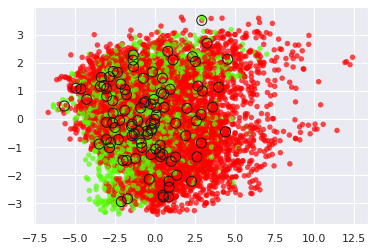

In [ ]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.7, s=30)
plt.scatter(support_vectors_pca[:100, 0], support_vectors_pca[:100, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
plt.show()